Code: https://www.kaggle.com/code/joshuaswords/awesome-eda-2021-happiness-population

1. Thấp nhất?
2. Cao nhất = Thường xuyên xảy ra nhất?
3. Trung bình là bao nhiêu trên cả nước?
4. Có sự thay đổi tích cực hay tiêu cực qua thời gian không?
5. Phương sai, độ lệch chuẩn, p_vale - correlation giữa các biến trong cùng một metrics.
6. Xem xét giá trị ngoại lai (sự không ổn định)


## Library and functions

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
asian_land_cover = pd.read_csv('C:\\Users\\ngmai\\Downloads\\asian_land_cover.csv')
asian_land_cover = asian_land_cover.drop('Unnamed: 0', axis=1)
asian_land_cover

Country ISO3  \
0    United Arab Emirates  ARE   
1    United Arab Emirates  ARE   
2    United Arab Emirates  ARE   
3    United Arab Emirates  ARE   
4    United Arab Emirates  ARE   
..                    ...  ...   
645               Vietnam  VNM   
646               Vietnam  VNM   
647               Vietnam  VNM   
648               Vietnam  VNM   
649               Vietnam  VNM   

                                             Indicator     Unit          2018  \
0                    Climate Altering Land Cover Index    Index    100.329761   
1    Artificial surfaces (including urban and assoc...  1000 HA    204.420000   
2                                            Grassland  1000 HA     39.920000   
3                                     Herbaceous crops  1000 HA    124.170000   
4                                  Inland water bodies  1000 HA     18.210000   
..                                                 ...      ...           ...   
645  Shrubs and/or herbaceous vegetation, aquatic o...  1000 HA     66.890000   
646                   Sparsely natural vegetated areas  1000 HA      6.120000   
647                            Terrestrial barren land  1000 HA     18.600000   
648                                 Tree-covered areas  1000 HA  10792.010000   
649                                        Woody crops  1000 HA   5056.990000   

             2019          2020          2021          2022  
0      105.053281    106.232465    107.010473    109.587494  
1      211.840000    217.120000    219.210000    227.880000  
2       40.900000     41.570000     41.840000     42.970000  
3      132.220000    130.800000    131.260000    131.030000  
4       18.210000     18.130000     18.210000     18.210000  
..            ...           ...           ...           ...  
645     66.950000     67.050000     66.960000     66.840000  
646      6.120000      6.100000      6.120000      6.110000  
647     18.590000     18.620000     18.590000     18.570000  
648  10876.360000  10911.070000  10948.320000  11038.720000  
649   5364.840000   5328.420000   5312.450000   5279.510000  

[650 rows x 9 columns]

In [7]:
asian_land_cover['Indicator'].unique()

array(['Climate Altering Land Cover Index',
       'Artificial surfaces (including urban and associated areas)',
       'Grassland', 'Herbaceous crops', 'Inland water bodies',
       'Mangroves', 'Permanent snow and glaciers', 'Shrub-covered areas',
       'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded',
       'Sparsely natural vegetated areas', 'Terrestrial barren land',
       'Tree-covered areas', 'Woody crops'], dtype=object)

In [8]:
asian_land_cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    650 non-null    object 
 1   ISO3       650 non-null    object 
 2   Indicator  650 non-null    object 
 3   Unit       650 non-null    object 
 4   2018       650 non-null    float64
 5   2019       650 non-null    float64
 6   2020       650 non-null    float64
 7   2021       650 non-null    float64
 8   2022       650 non-null    float64
dtypes: float64(5), object(4)
memory usage: 45.8+ KB


In [9]:
asian_land_cover.describe()

2018           2019           2020           2021  \
count     650.000000     650.000000     650.000000     650.000000   
mean     4757.119953    4757.136539    4757.139167    4757.184082   
std     21460.064135   21414.030647   21389.680070   21361.466365   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.802500       5.825000       5.842500       5.887500   
50%       100.412964     100.575596     100.620298     101.109993   
75%      1022.062500    1038.857500    1024.052500    1022.567500   
max    289097.630000  288376.690000  287984.370000  287295.120000   

                2022  
count     650.000000  
mean     4757.237610  
std     21332.046964  
min         0.000000  
25%         5.885000  
50%       101.918413  
75%      1020.445000  
max    286706.180000

Trực quan sự thay đổi nhiệt độ bề mặt trung bình (đơn vị Celsius) các quốc gia châu Á trong khoảng 2018-2022

In [10]:
years = ['2018', '2019', '2020', '2021', '2022']

# Helper function: tìm Top k quốc gia
def find_top_k(data, sub_feature, year, topk=5, ascending=False):
    subset = data[data['Indicator'] == sub_feature]
    sorted_data = subset.sort_values(by=year, ascending=ascending)
    return sorted_data[['Country', year]].head(topk)

In [11]:
# Helper function: vẽ biểu đồ đường
def plot_line(data, sub_feature, years):
    subset = data[data['Indicator'] == sub_feature]
    plt.figure(figsize=(12, 6))
    for _, row in subset.iterrows():
        plt.plot(years, row[years], label=row['Country'])
    plt.title(f"Line Plot for {sub_feature}", fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [12]:
# Helper function: vẽ biểu đồ thanh xếp chồng
def plot_stacked_bar(data, sub_feature, years):
    subset = data[data['Indicator'] == sub_feature]
    subset = subset.set_index('Country')
    subset[years].plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f"Stacked Bar Plot for {sub_feature}", fontsize=14)
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

=== Analysis for Indicator: Climate Altering Land Cover Index ===

Statistical Summary:
             2018        2019        2020        2021        2022
count   50.000000   50.000000   50.000000   50.000000   50.000000
mean   100.083787  100.302008  100.266174  100.913465  101.611126
std      2.857931    3.777169    4.059568    4.707394    6.014067
min     92.477423   91.703925   91.923909   92.169550   92.770225
25%     98.682806   98.514692   98.162298   98.400567   98.423630
50%     99.827908   99.752551   99.643240   99.859845  100.166721
75%    100.571770  101.382337  101.755861  102.383100  102.854575
max    111.349830  111.835900  110.595782  114.401981  118.897546

Line Plot:


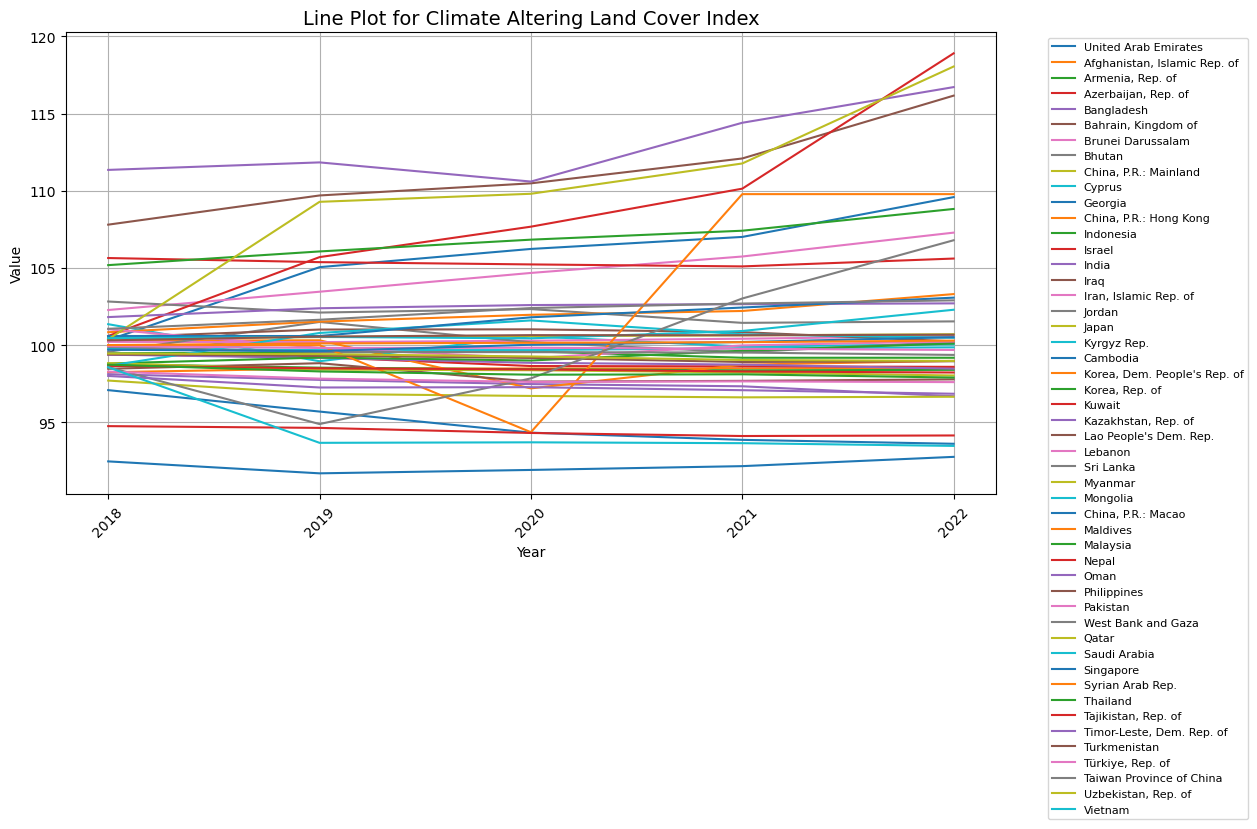


Stacked Bar Plot:


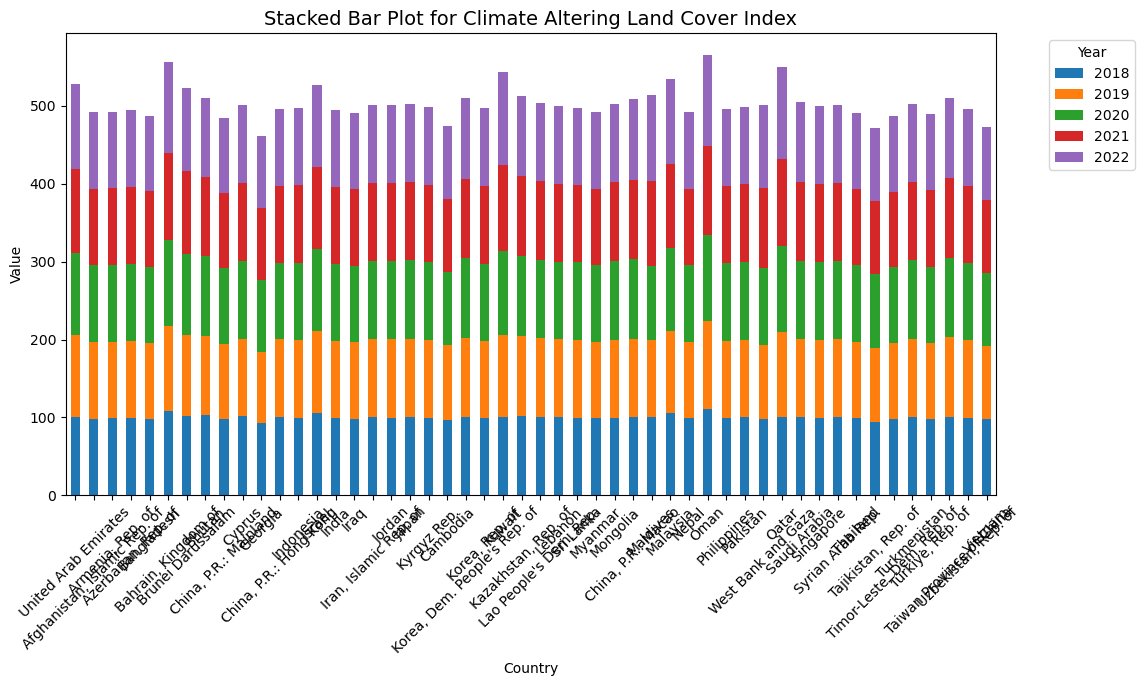


Top 5 Countries:
                 Country        2022
299               Kuwait  118.897546
494                Qatar  118.043960
442                 Oman  116.711224
65   Bahrain, Kingdom of  116.158537
403             Maldives  109.781707

Bottom 5 Countries:
                   Country       2022
130                Georgia  92.770225
637                Vietnam  93.479593
260               Cambodia  93.618022
559    Tajikistan, Rep. of  94.155968
104  China, P.R.: Mainland  96.662385


=== Analysis for Indicator: Artificial surfaces (including urban and associated areas) ===

Statistical Summary:
               2018          2019          2020          2021          2022
count     50.000000     50.000000     50.000000     50.000000     50.000000
mean     424.264000    437.689800    445.282400    463.003200    488.375400
std     1480.105735   1529.439197   1565.485596   1628.632849   1706.187706
min        0.080000      0.080000      0.080000      0.080000      0.080000
25%       29.052

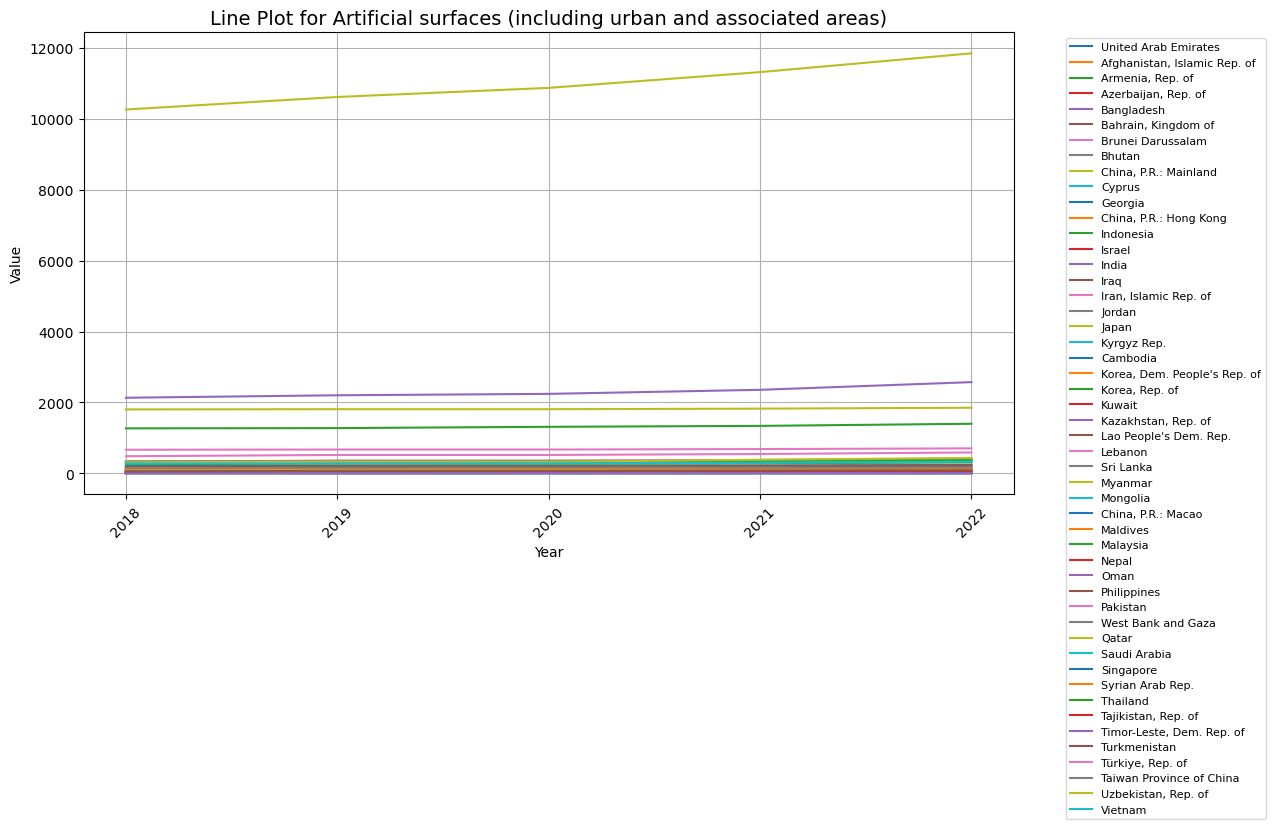


Stacked Bar Plot:


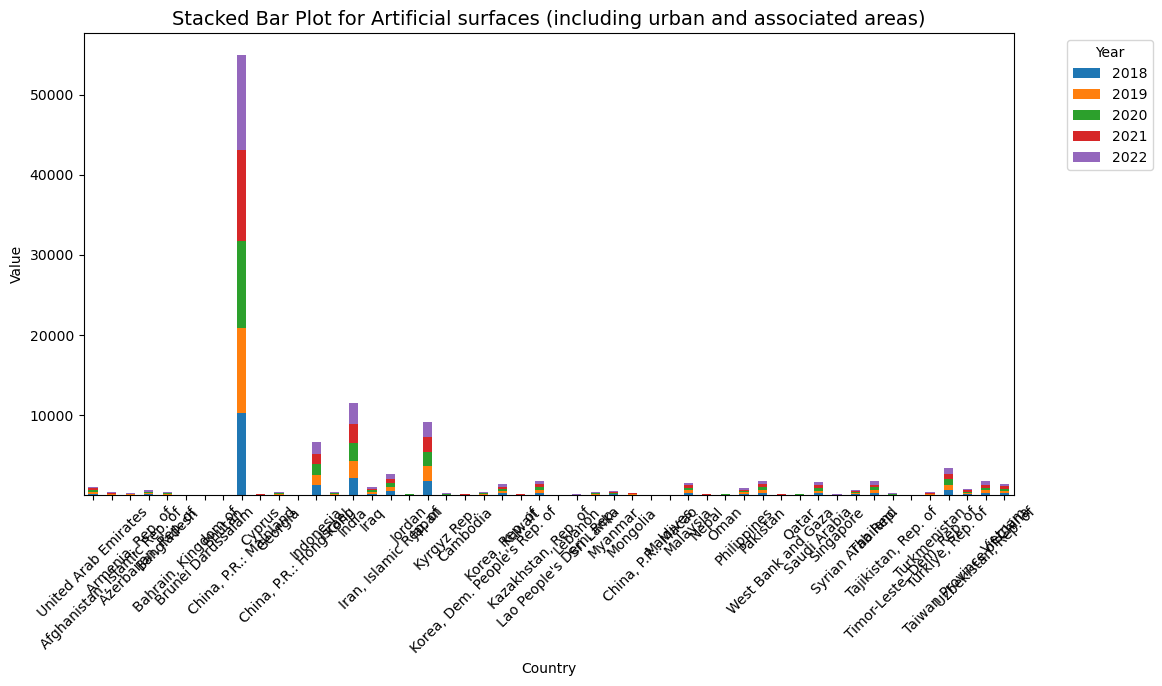


Top 5 Countries:
                   Country      2022
105  China, P.R.: Mainland  11845.39
183                  India   2572.08
235                  Japan   1850.23
157              Indonesia   1398.30
599       Türkiye, Rep. of    703.94

Bottom 5 Countries:
                       Country  2022
404                   Maldives  0.08
92                      Bhutan  0.29
391         China, P.R.: Macao  0.62
573  Timor-Leste, Dem. Rep. of  6.96
79           Brunei Darussalam  8.61


=== Analysis for Indicator: Grassland ===

Statistical Summary:
                2018           2019           2020          2021  \
count      50.000000      50.000000      50.000000      50.00000   
mean    11218.309200   11207.104400   11212.694800   11194.58340   
std     42467.229519   42360.419707   42319.649194   42224.01861   
min         0.140000       0.140000       0.140000       0.14000   
25%        67.465000      67.467500      67.410000      67.50250   
50%       918.485000     922.510000     923

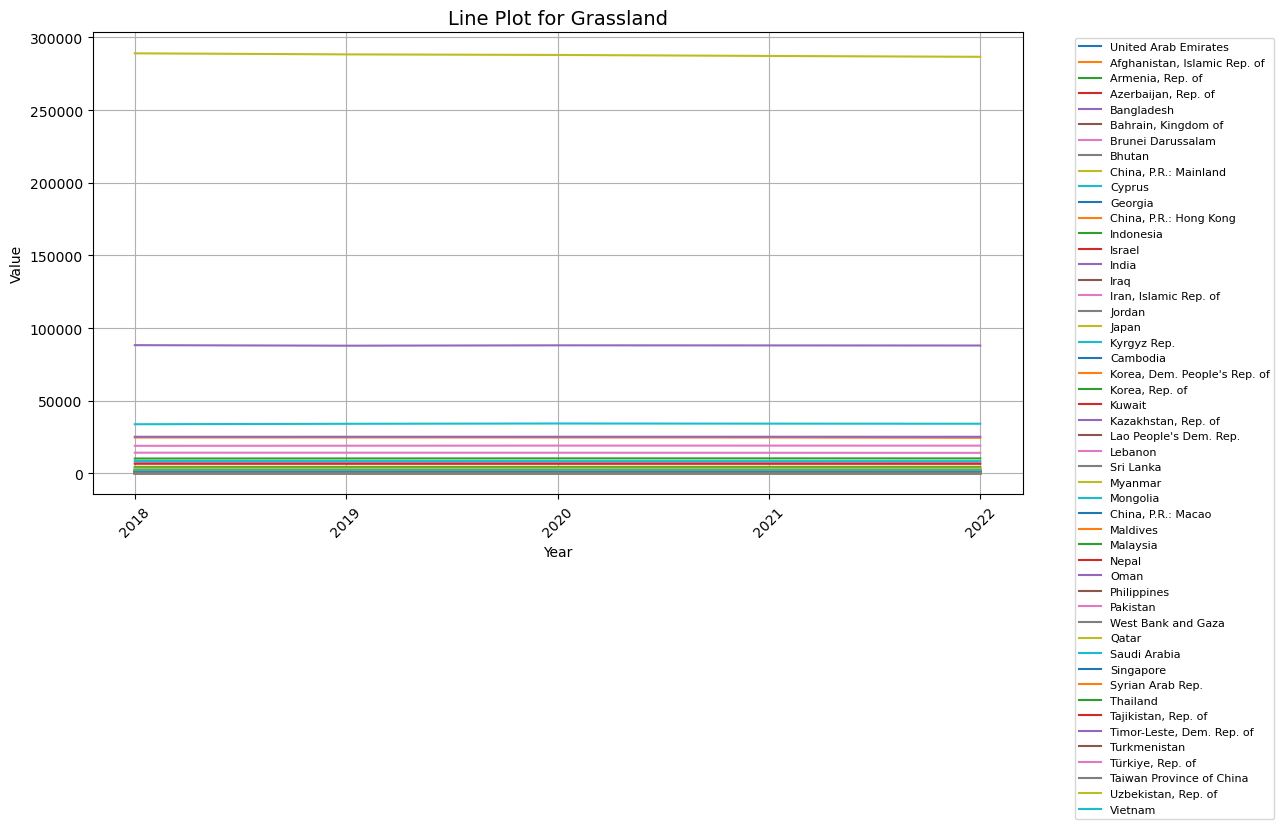


Stacked Bar Plot:


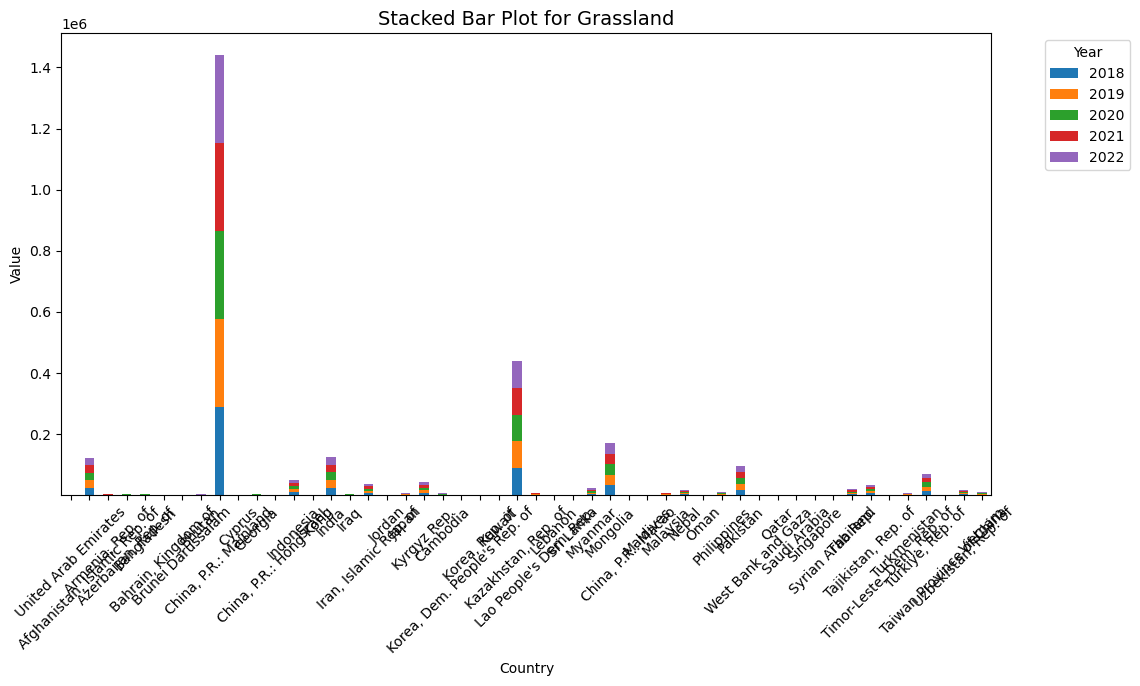


Top 5 Countries:
                          Country       2022
106         China, P.R.: Mainland  286706.18
314           Kazakhstan, Rep. of   87975.01
379                      Mongolia   34134.82
184                         India   25158.16
15   Afghanistan, Islamic Rep. of   24468.31

Bottom 5 Countries:
                 Country  2022
392   China, P.R.: Macao  0.13
405             Maldives  0.33
67   Bahrain, Kingdom of  2.53
522            Singapore  4.92
301               Kuwait  7.44


=== Analysis for Indicator: Herbaceous crops ===

Statistical Summary:
                2018           2019           2020           2021  \
count      50.000000      50.000000      50.000000      50.000000   
mean    13006.932600   12944.296600   12916.537000   12888.614600   
std     35967.637323   35724.744423   35617.819878   35527.169654   
min         0.230000       0.230000       0.220000       0.220000   
25%       240.860000     235.265000     237.995000     237.032500   
50%      2895.5250

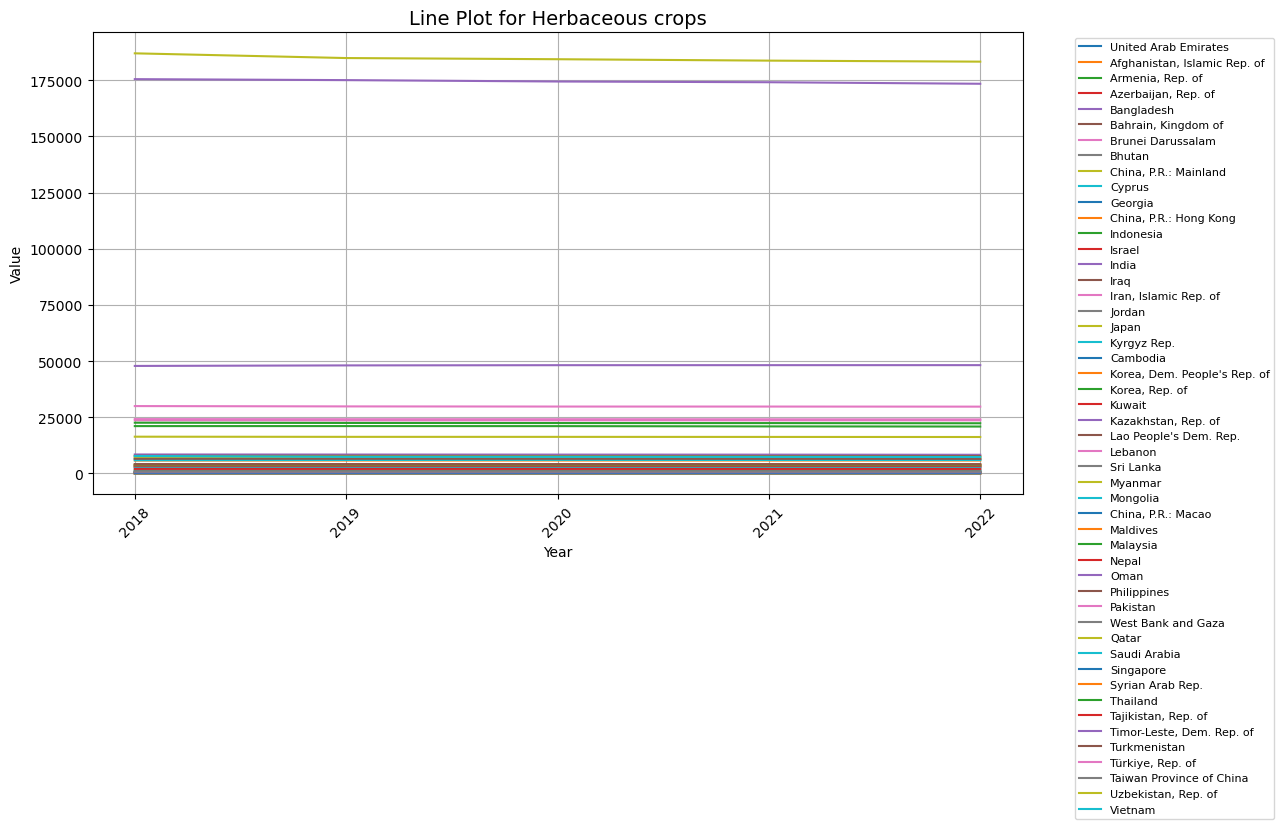


Stacked Bar Plot:


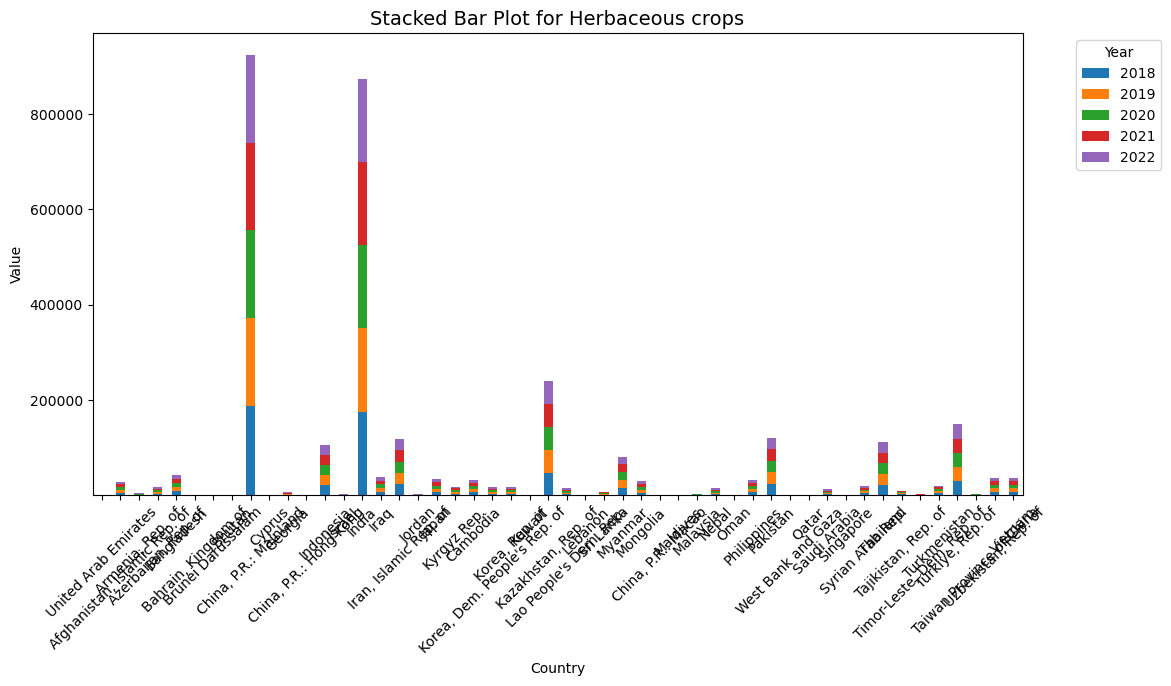


Top 5 Countries:
                   Country       2022
107  China, P.R.: Mainland  183268.71
185                  India  173422.38
315    Kazakhstan, Rep. of   48162.89
601       Türkiye, Rep. of   29691.23
471               Pakistan   24003.58

Bottom 5 Countries:
                    Country   2022
393      China, P.R.: Macao   0.22
68      Bahrain, Kingdom of   0.29
406                Maldives   3.29
146  China, P.R.: Hong Kong   9.40
523               Singapore  10.29


=== Analysis for Indicator: Inland water bodies ===

Statistical Summary:
               2018          2019          2020          2021          2022
count     50.000000     50.000000     50.000000     50.000000     50.000000
mean    1535.914400   1545.945200   1542.301200   1533.609200   1534.395600
std     3482.194649   3499.729816   3492.628226   3468.581834   3468.158964
min        0.090000      0.090000      0.100000      0.090000      0.090000
25%       21.975000     21.977500     21.982500     22.022500     2

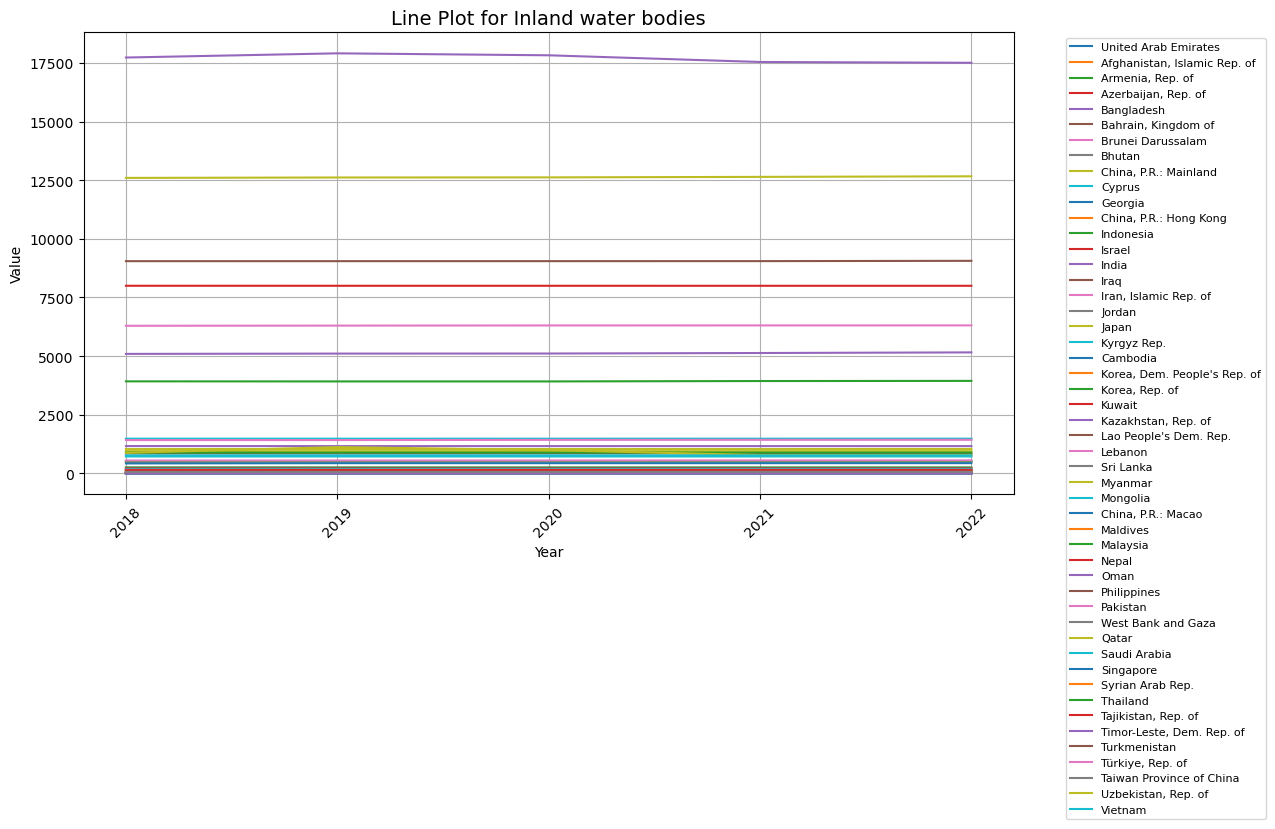


Stacked Bar Plot:


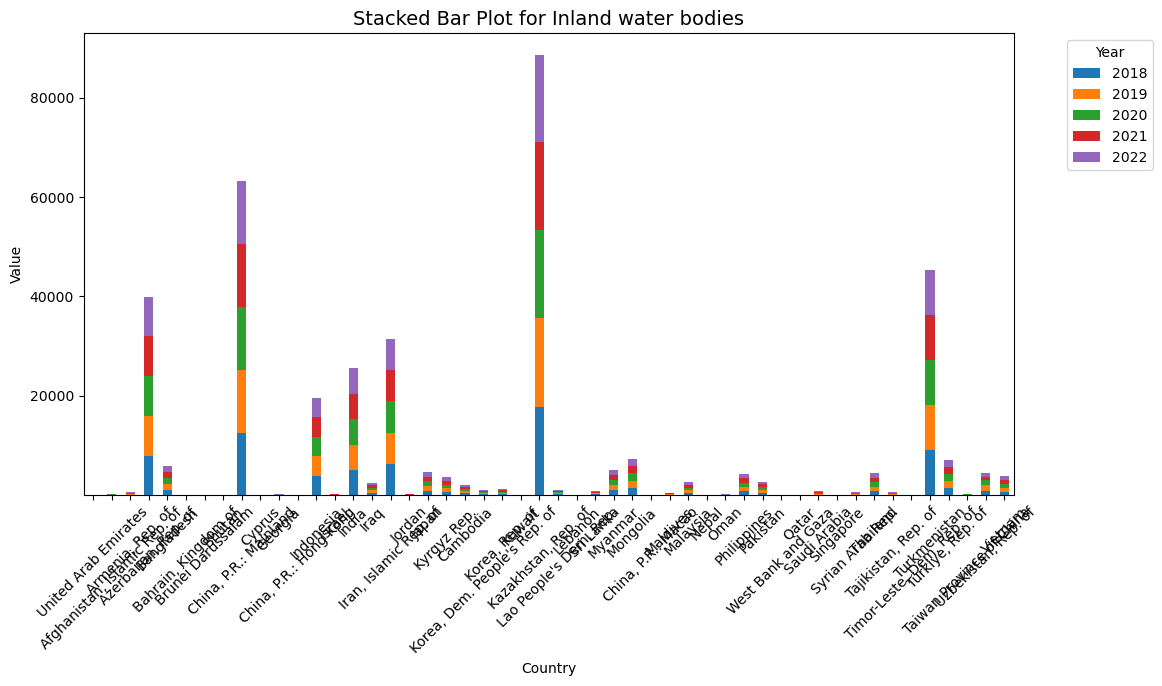


Top 5 Countries:
                   Country      2022
316    Kazakhstan, Rep. of  17507.67
108  China, P.R.: Mainland  12666.66
589           Turkmenistan   9062.05
43     Azerbaijan, Rep. of   7997.96
212  Iran, Islamic Rep. of   6309.03

Bottom 5 Countries:
                 Country  2022
394   China, P.R.: Macao  0.09
95                Bhutan  1.17
342              Lebanon  2.24
69   Bahrain, Kingdom of  3.77
524            Singapore  4.87


=== Analysis for Indicator: Mangroves ===

Statistical Summary:
              2018         2019         2020         2021         2022
count    50.000000    50.000000    50.000000    50.000000    50.000000
mean    149.140000   149.102000   148.699000   148.400400   148.575000
std     591.462709   590.749224   588.957742   586.361247   585.118894
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000    

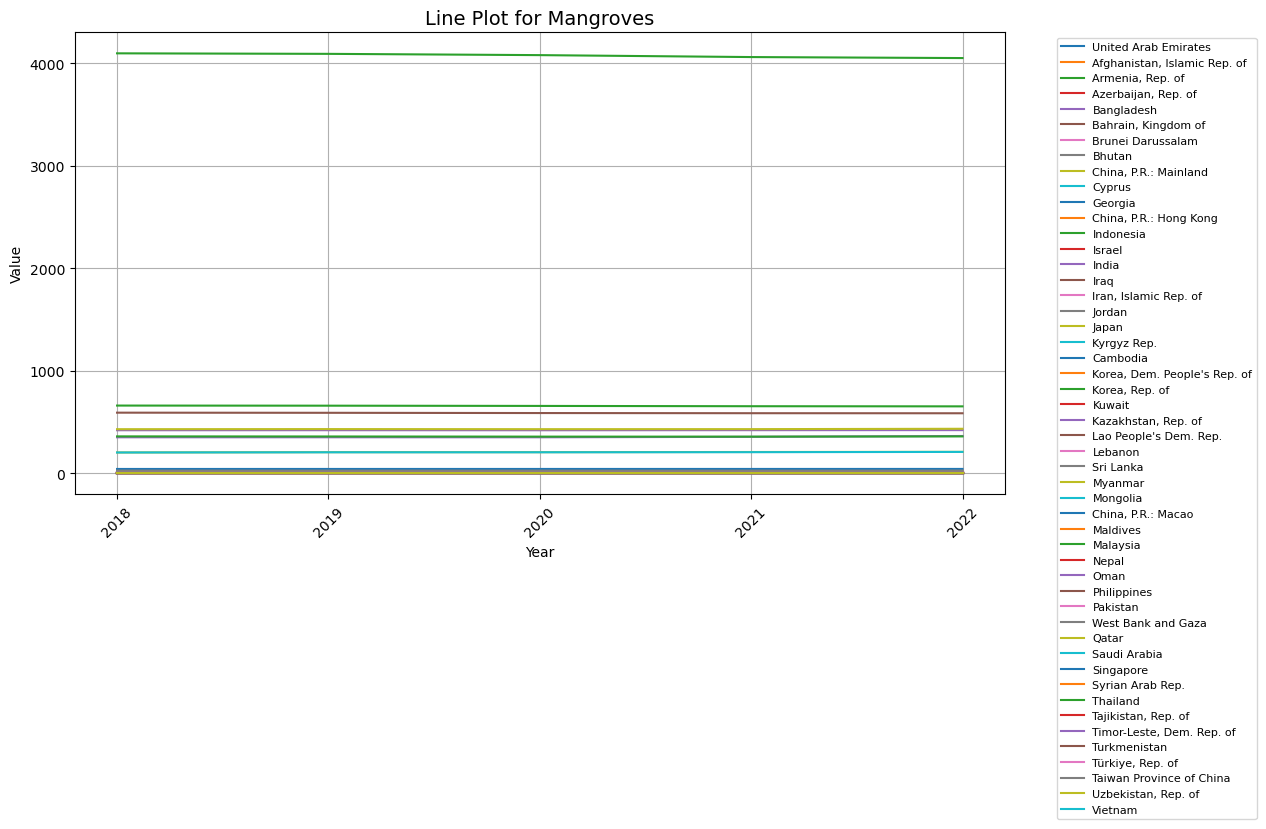


Stacked Bar Plot:


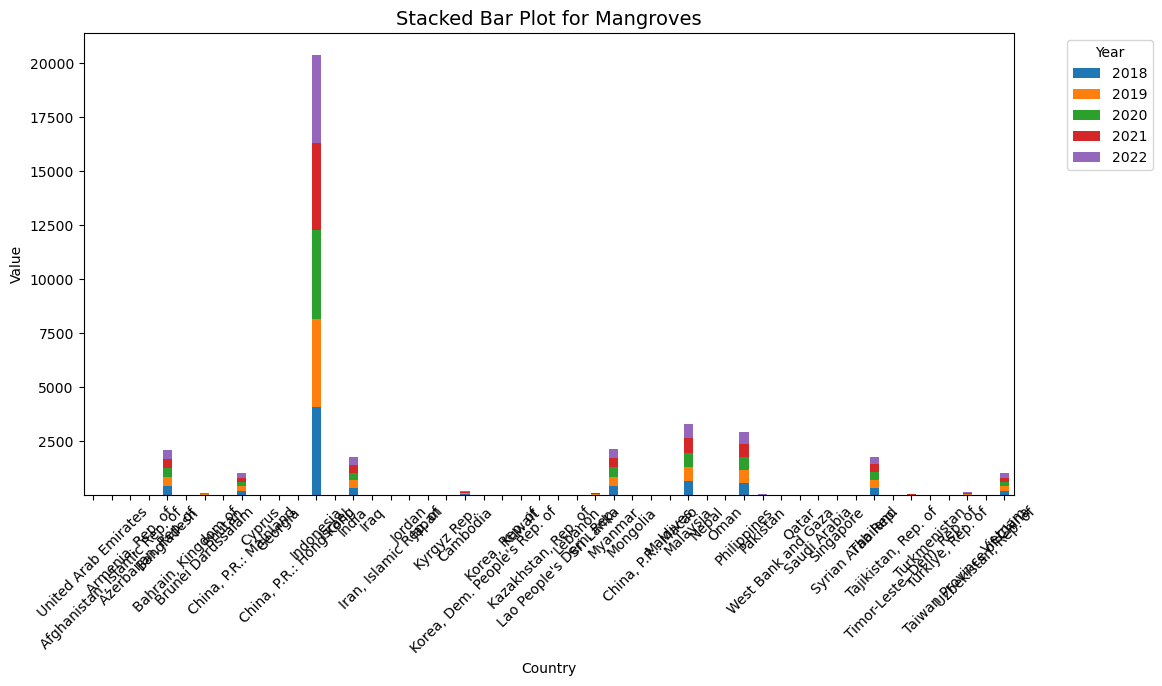


Top 5 Countries:
         Country     2022
161    Indonesia  4048.58
421     Malaysia   652.92
460  Philippines   585.58
369      Myanmar   434.37
57    Bangladesh   421.26

Bottom 5 Countries:
                    Country  2022
317     Kazakhstan, Rep. of   0.0
343                 Lebanon   0.0
330  Lao People's Dem. Rep.   0.0
629     Uzbekistan, Rep. of   0.0
304                  Kuwait   0.0


=== Analysis for Indicator: Permanent snow and glaciers ===

Statistical Summary:
              2018         2019         2020        2021        2022
count    50.000000    50.000000    50.000000    50.00000    50.00000
mean    202.756000   202.756000   202.749600   202.75580   202.75580
std     903.932763   903.932763   903.842719   903.93139   903.93139
min       0.000000     0.000000     0.000000     0.00000     0.00000
25%       0.000000     0.000000     0.000000     0.00000     0.00000
50%       0.000000     0.000000     0.000000     0.00000     0.00000
75%       1.177500     1.177500   

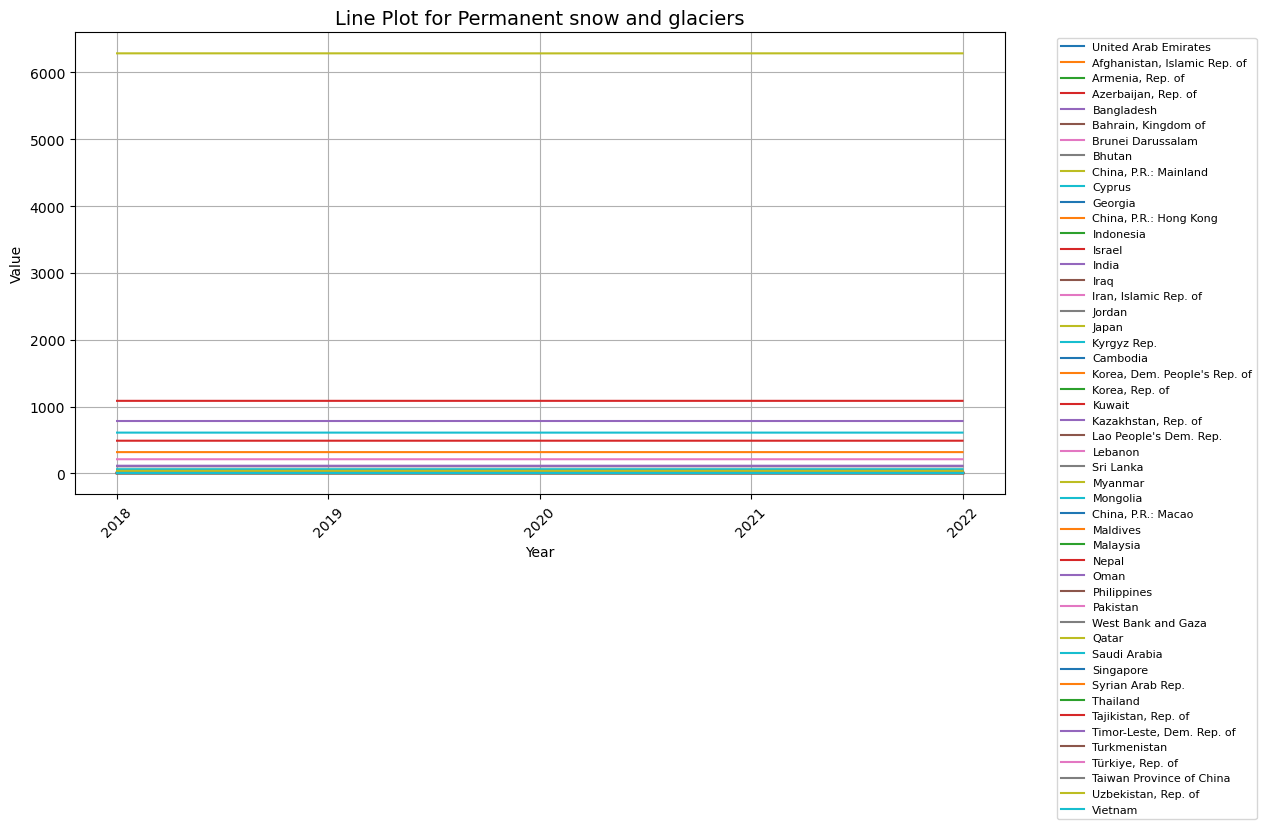


Stacked Bar Plot:


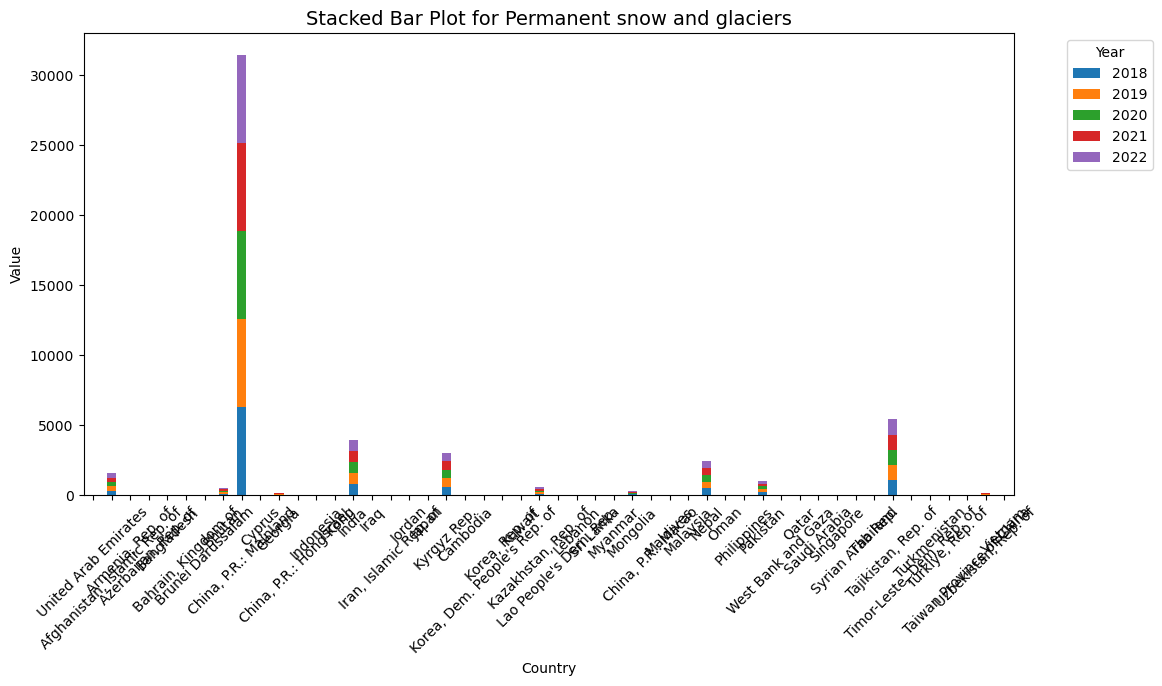


Top 5 Countries:
                   Country     2022
110  China, P.R.: Mainland  6286.22
565    Tajikistan, Rep. of  1085.06
188                  India   783.16
253            Kyrgyz Rep.   609.51
435                  Nepal   488.22

Bottom 5 Countries:
                    Country  2022
6      United Arab Emirates   0.0
331  Lao People's Dem. Rep.   0.0
344                 Lebanon   0.0
357               Sri Lanka   0.0
396      China, P.R.: Macao   0.0


=== Analysis for Indicator: Shrub-covered areas ===

Statistical Summary:
               2018          2019          2020         2021        2022
count     50.000000     50.000000     50.000000     50.00000     50.0000
mean    3139.021400   3143.046800   3147.036600   3148.74200   3148.2668
std     5654.720835   5666.504458   5678.337039   5683.29325   5687.0692
min        0.020000      0.020000      0.020000      0.02000      0.0200
25%       58.425000     58.462500     58.442500     58.35750     58.2150
50%      572.485000    573.

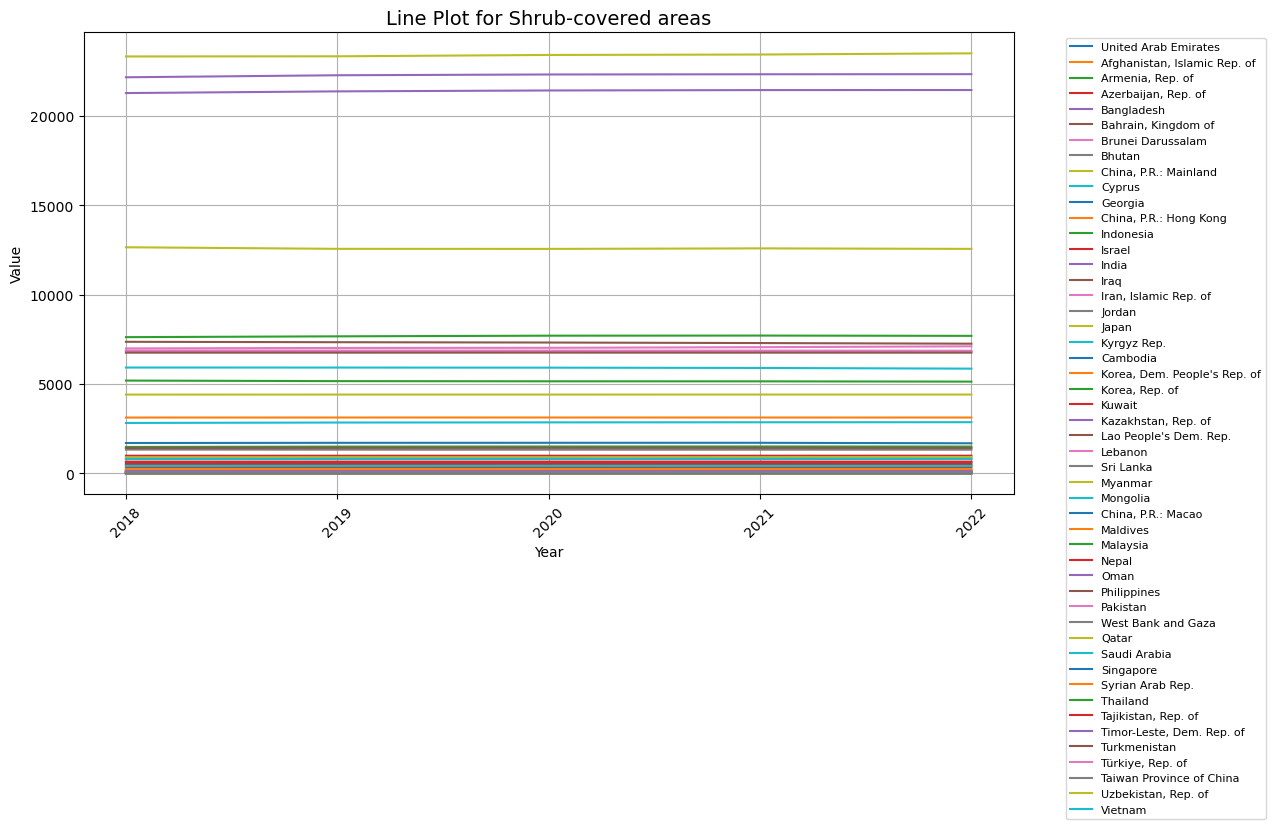


Stacked Bar Plot:


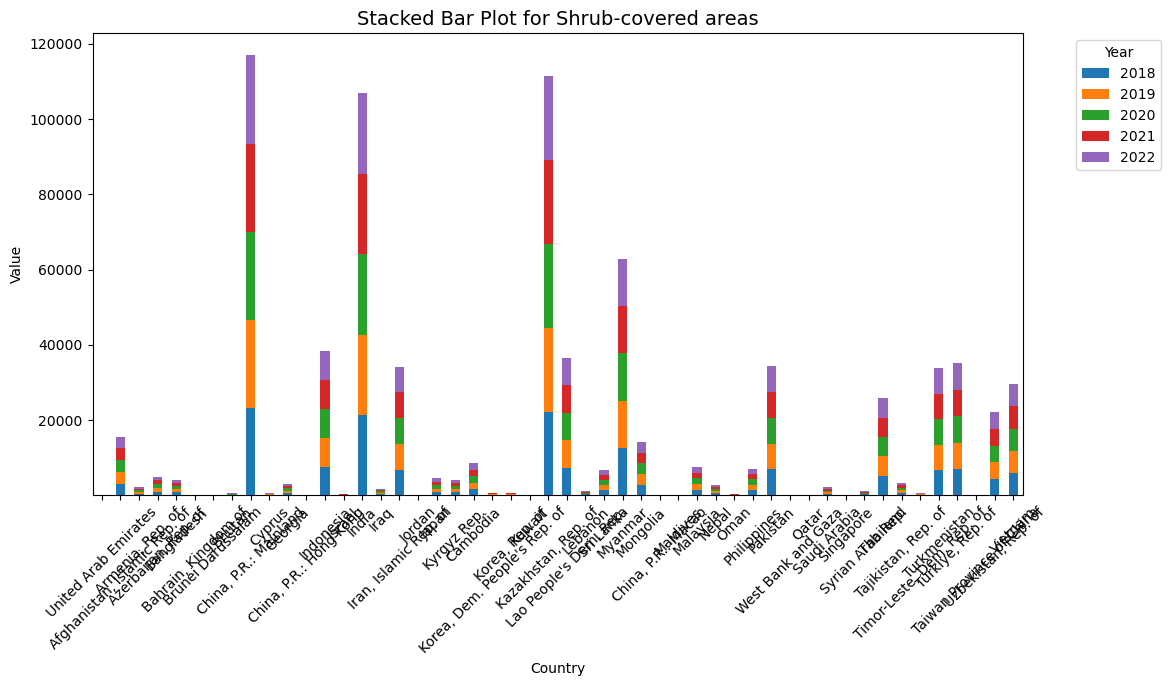


Top 5 Countries:
                   Country      2022
111  China, P.R.: Mainland  23489.80
319    Kazakhstan, Rep. of  22324.41
189                  India  21437.72
371                Myanmar  12552.69
163              Indonesia   7688.63

Bottom 5 Countries:
                 Country  2022
397   China, P.R.: Macao  0.02
72   Bahrain, Kingdom of  0.21
410             Maldives  0.65
527            Singapore  1.09
306               Kuwait  3.04


=== Analysis for Indicator: Shrubs and/or herbaceous vegetation, aquatic or regularly flooded ===

Statistical Summary:
              2018         2019         2020         2021         2022
count    50.000000    50.000000    50.000000    50.000000    50.000000
mean    149.084400   148.964800   148.918000   148.902400   148.913400
std     500.085561   499.258715   498.817341   498.721827   498.267129
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.067500     0.067500     0.067500     0.067500     0.067500
50%  

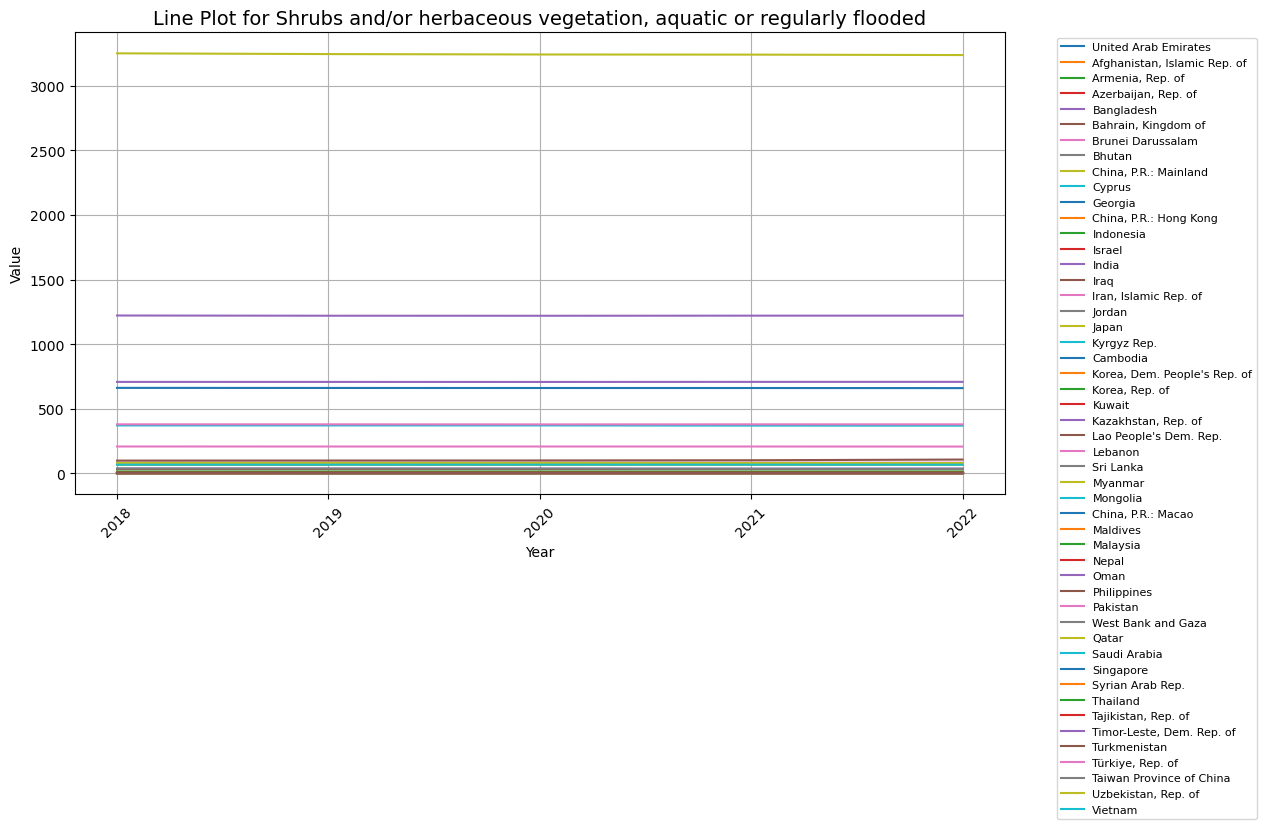


Stacked Bar Plot:


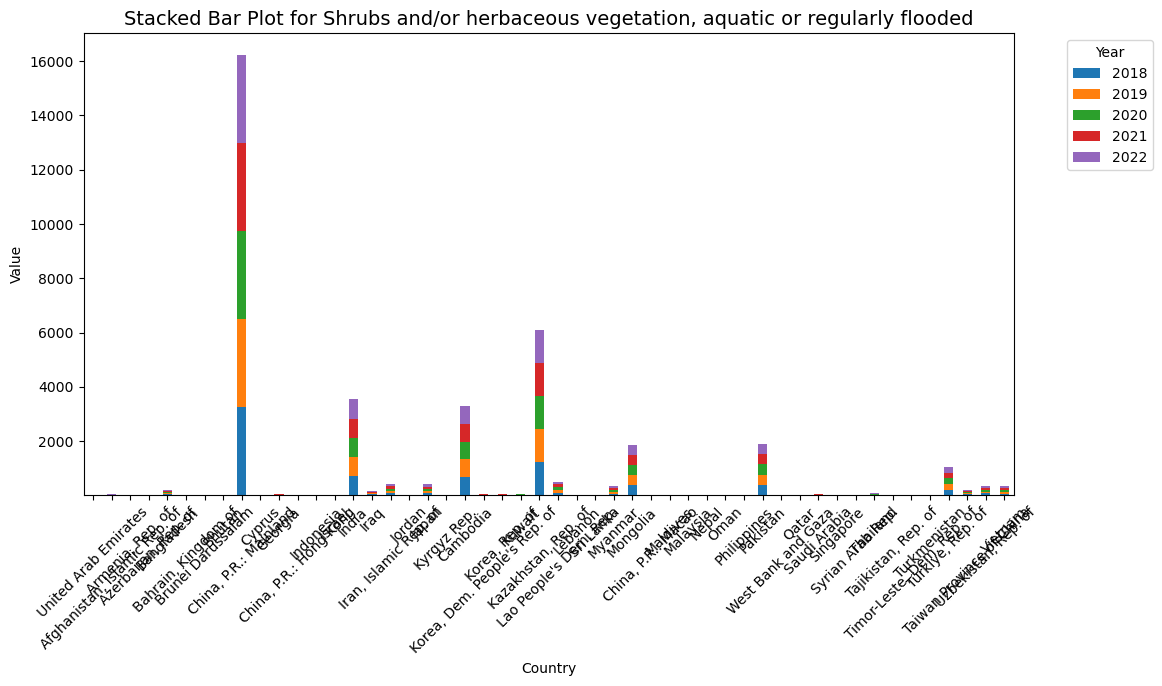


Top 5 Countries:
                   Country     2022
112  China, P.R.: Mainland  3237.66
320    Kazakhstan, Rep. of  1220.54
190                  India   708.06
268               Cambodia   659.68
476               Pakistan   379.06

Bottom 5 Countries:
                       Country  2022
489         West Bank and Gaza   0.0
580  Timor-Leste, Dem. Rep. of   0.0
255                Kyrgyz Rep.   0.0
528                  Singapore   0.0
164                  Indonesia   0.0


=== Analysis for Indicator: Sparsely natural vegetated areas ===

Statistical Summary:
               2018          2019          2020          2021          2022
count     50.000000     50.000000     50.000000     50.000000     50.000000
mean    3296.167600   3327.208000   3332.634600   3360.962800   3397.565200
std    10495.734968  10564.647271  10549.447541  10595.578515  10668.972985
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        4.570000      4.630000      4.660000      4

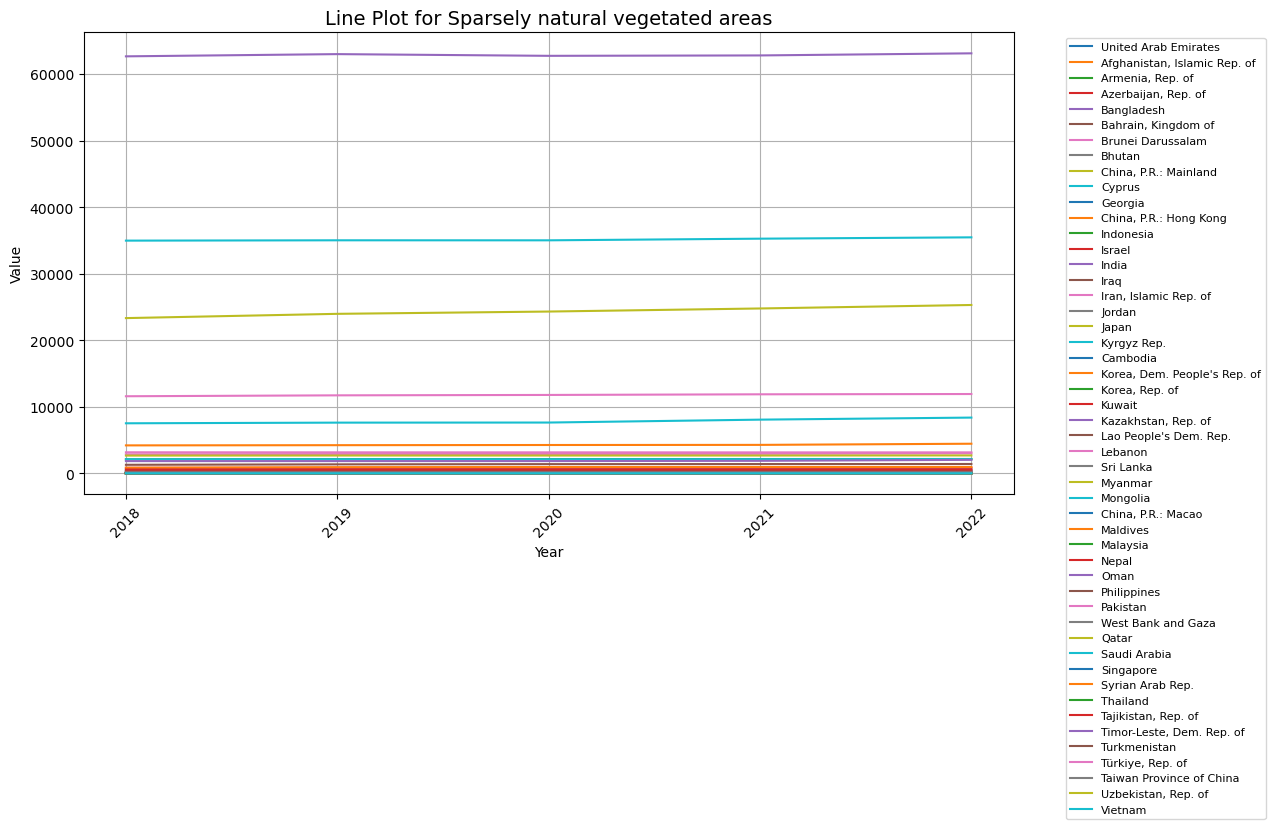


Stacked Bar Plot:


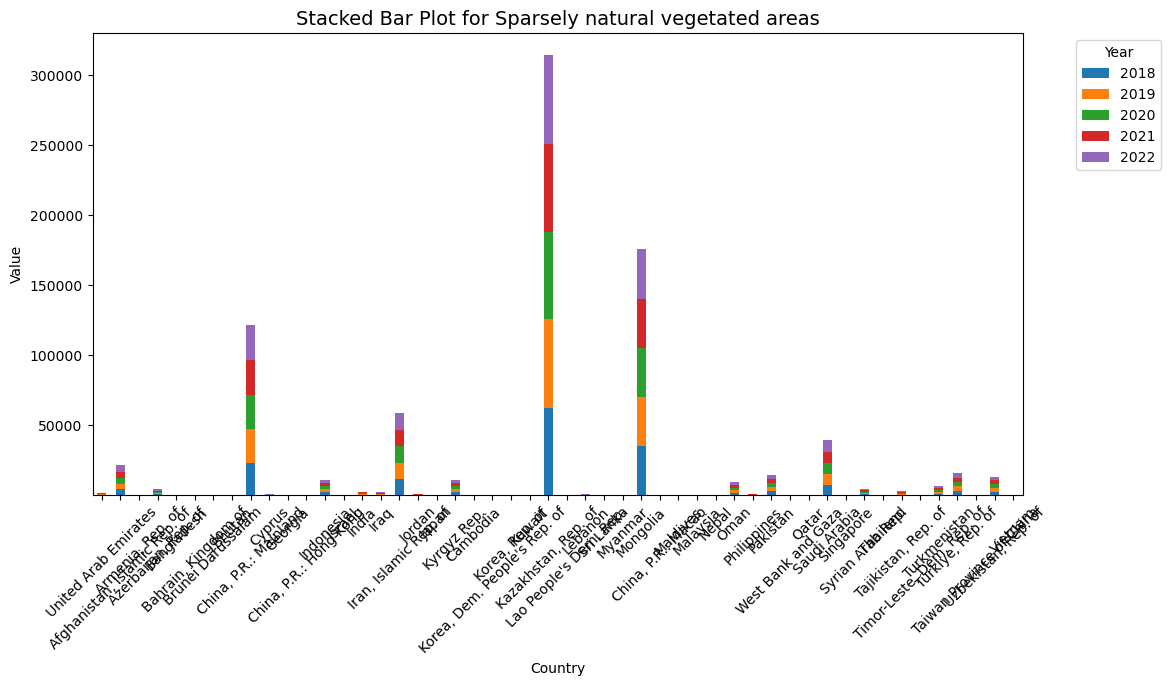


Top 5 Countries:
                   Country      2022
321    Kazakhstan, Rep. of  63101.90
386               Mongolia  35455.89
113  China, P.R.: Mainland  25292.64
217  Iran, Islamic Rep. of  11915.55
516           Saudi Arabia   8375.13

Bottom 5 Countries:
                    Country  2022
399      China, P.R.: Macao  0.00
334  Lao People's Dem. Rep.  0.00
529               Singapore  0.02
152  China, P.R.: Hong Kong  0.05
87        Brunei Darussalam  0.22


=== Analysis for Indicator: Terrestrial barren land ===

Statistical Summary:
                2018           2019           2020          2021  \
count      50.000000      50.000000      50.000000      50.00000   
mean    15157.112200   15111.398200   15094.174800   15081.59440   
std     38016.510258   37978.787024   37944.328392   37884.89591   
min         0.000000       0.000000       0.000000       0.00000   
25%         1.707500       1.712500       1.727500       1.71250   
50%        91.885000      91.815000      91.640

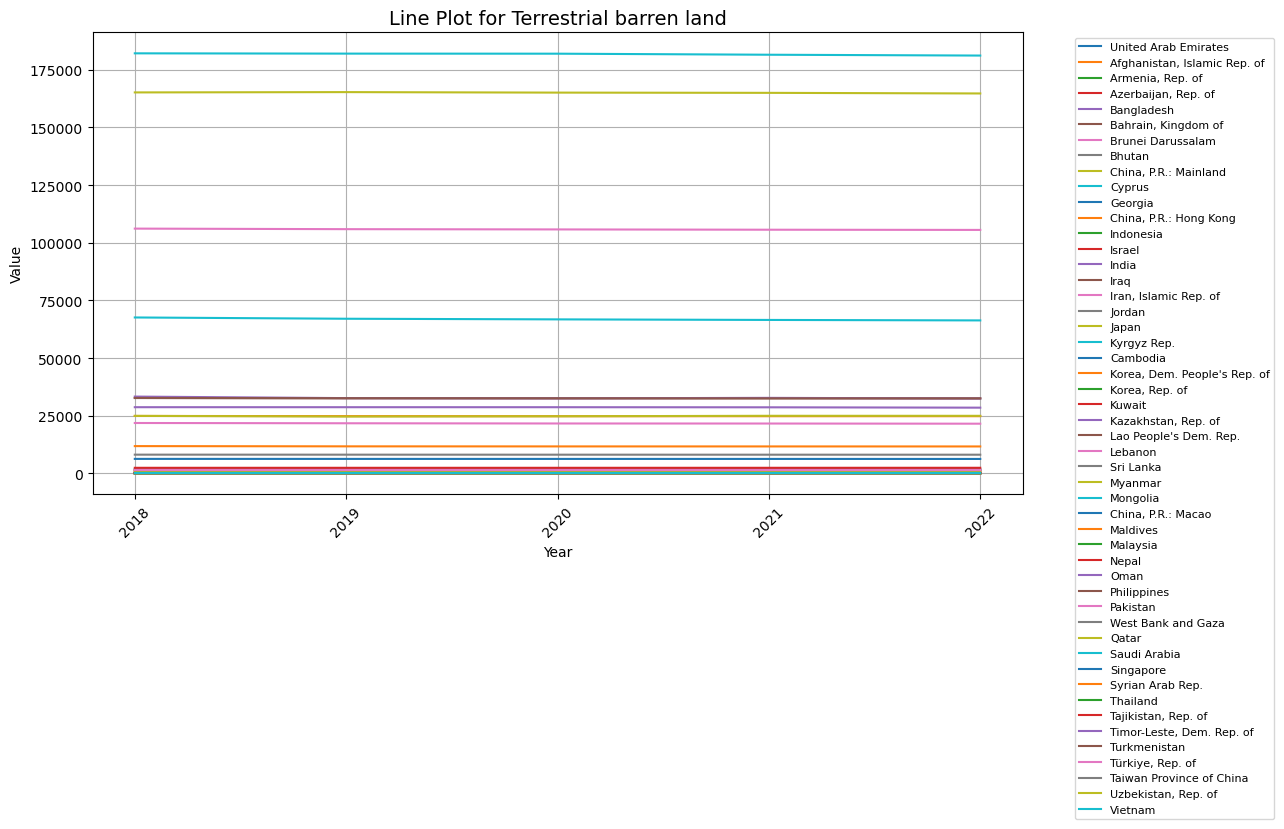


Stacked Bar Plot:


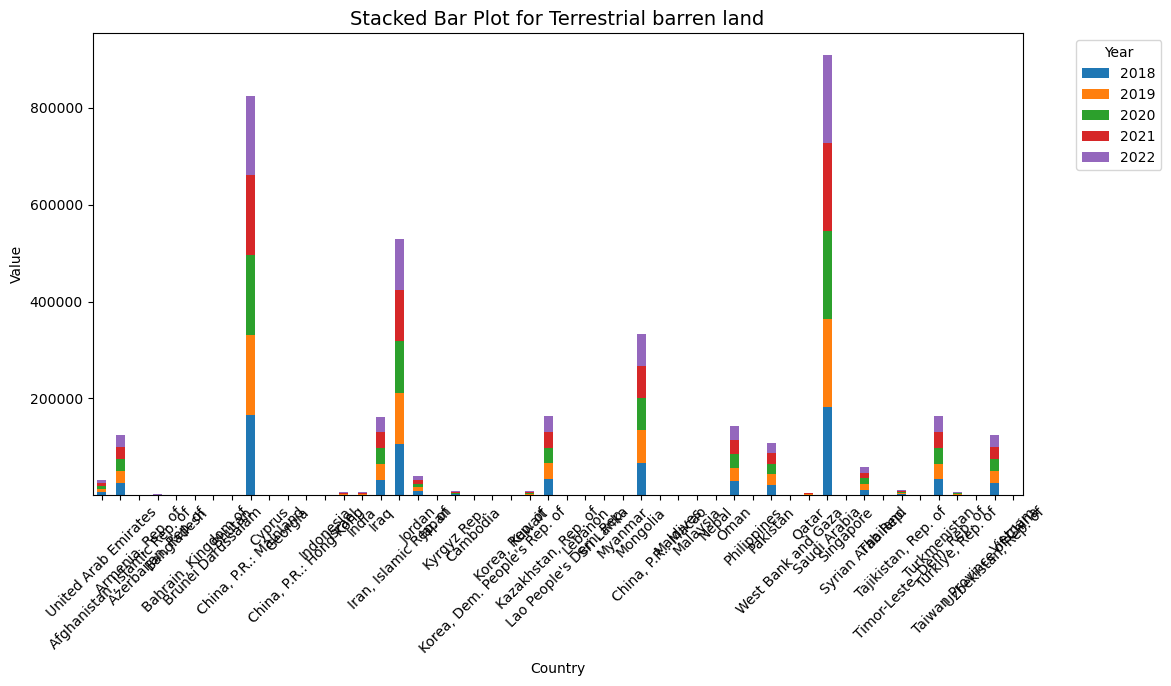


Top 5 Countries:
                   Country       2022
517           Saudi Arabia  181135.79
114  China, P.R.: Mainland  164704.39
218  Iran, Islamic Rep. of  105536.55
387               Mongolia   66302.72
205                   Iraq   32502.60

Bottom 5 Countries:
                      Country  2022
465               Philippines   0.0
621  Taiwan Province of China   0.0
426                  Malaysia   0.0
400        China, P.R.: Macao   0.0
335    Lao People's Dem. Rep.   0.0


=== Analysis for Indicator: Tree-covered areas ===

Statistical Summary:
                2018           2019           2020          2021  \
count      50.000000      50.000000      50.000000      50.00000   
mean    11204.080800   11221.517400   11224.951800   11242.16720   
std     31233.317109   31267.765584   31271.566972   31315.79706   
min         0.200000       0.200000       0.200000       0.20000   
25%        82.195000      83.372500      83.687500      84.65000   
50%      1204.785000    1211.15500

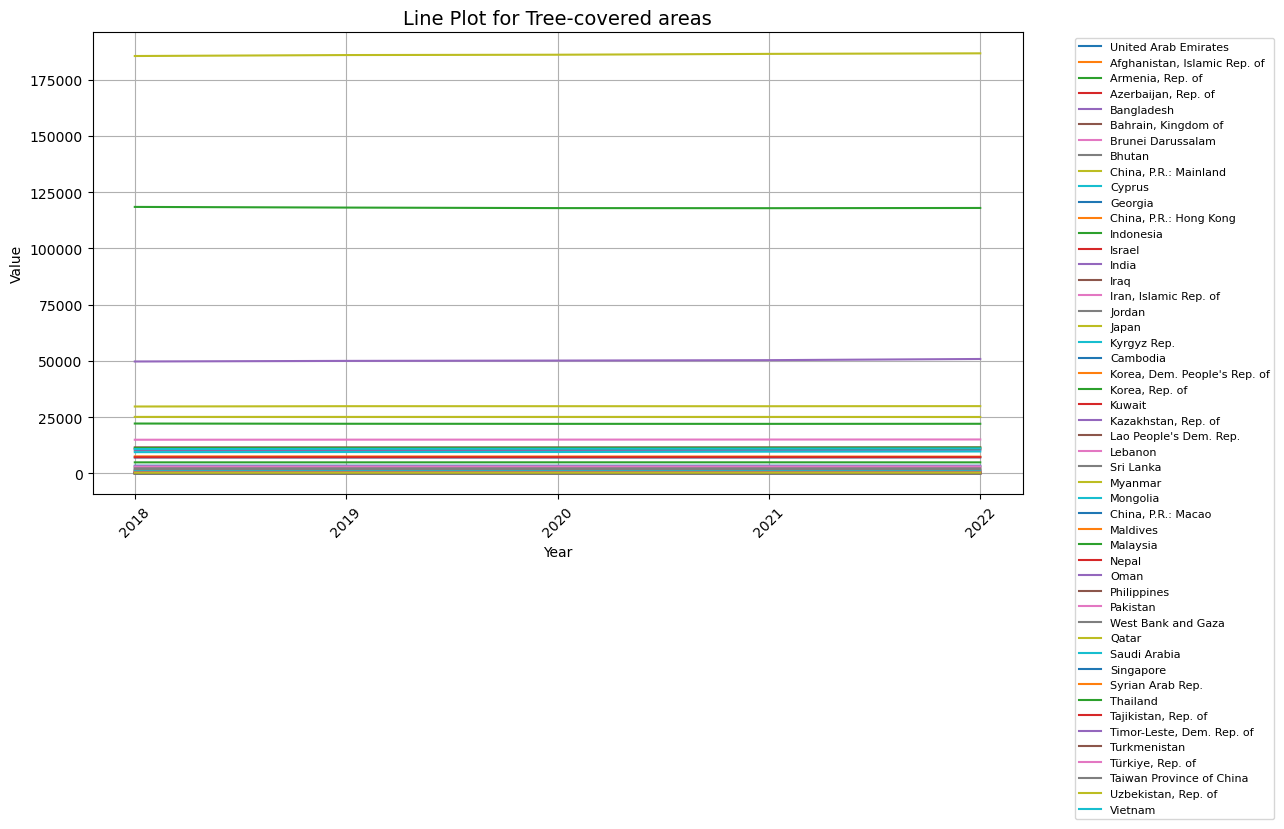


Stacked Bar Plot:


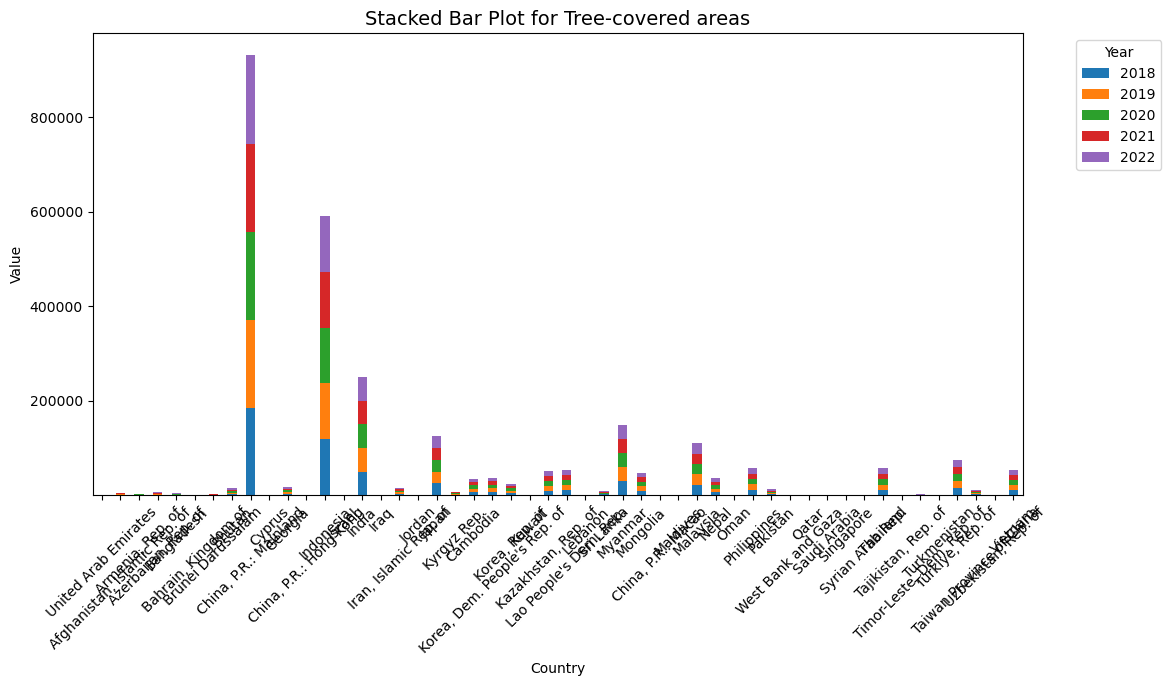


Top 5 Countries:
                   Country       2022
115  China, P.R.: Mainland  186742.20
167              Indonesia  117985.31
193                  India   50841.39
375                Myanmar   29881.18
245                  Japan   25056.74

Bottom 5 Countries:
                 Country   2022
401   China, P.R.: Macao   0.20
414             Maldives   0.42
76   Bahrain, Kingdom of   3.82
310               Kuwait   8.69
531            Singapore  10.05


=== Analysis for Indicator: Woody crops ===

Statistical Summary:
               2018          2019          2020          2021          2022
count     50.000000     50.000000     50.000000     50.000000     50.000000
mean    2259.693000   2303.443800   2326.563200   2329.144200   2322.405200
std     5615.517046   5759.730083   5817.760565   5832.860572   5816.559563
min        0.230000      0.230000      0.220000      0.220000      0.220000
25%      100.072500    100.777500    101.195000    101.837500    101.047500
50%      291.7500

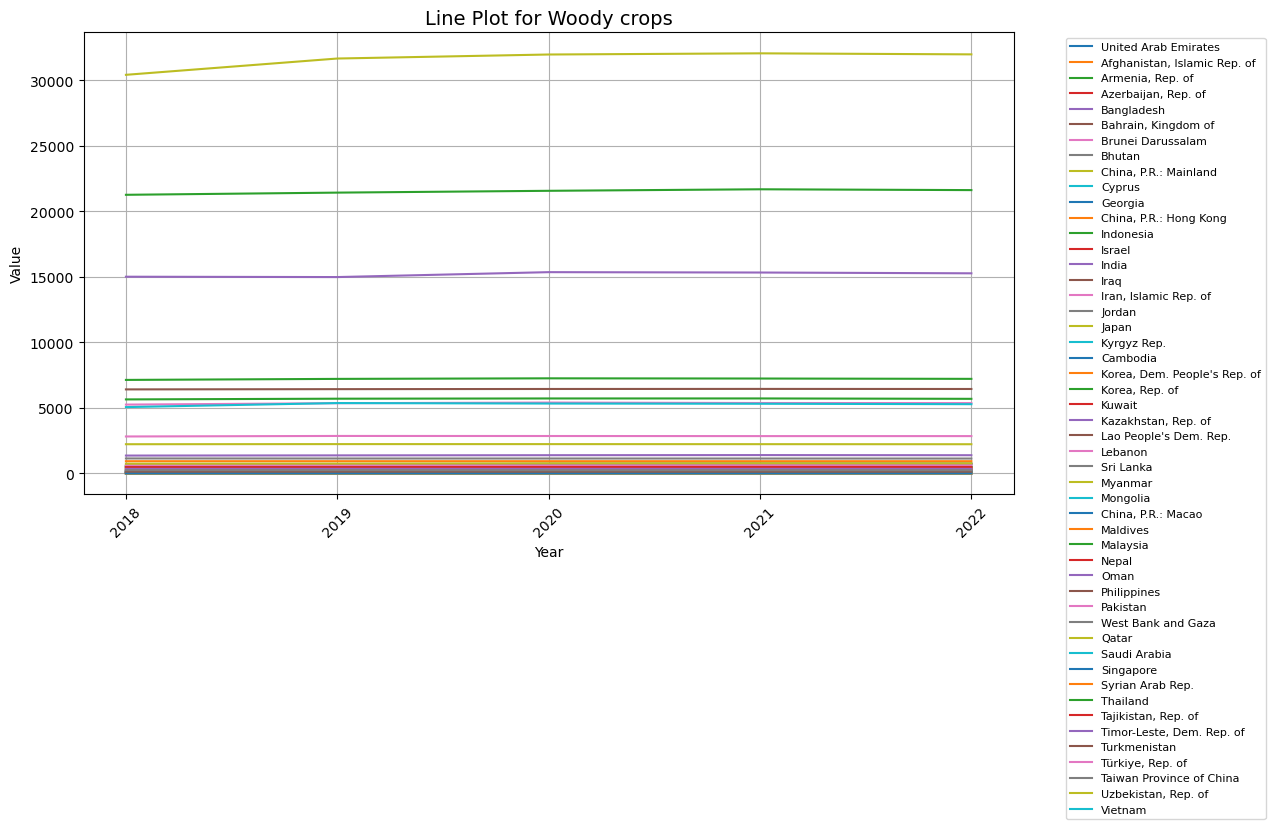


Stacked Bar Plot:


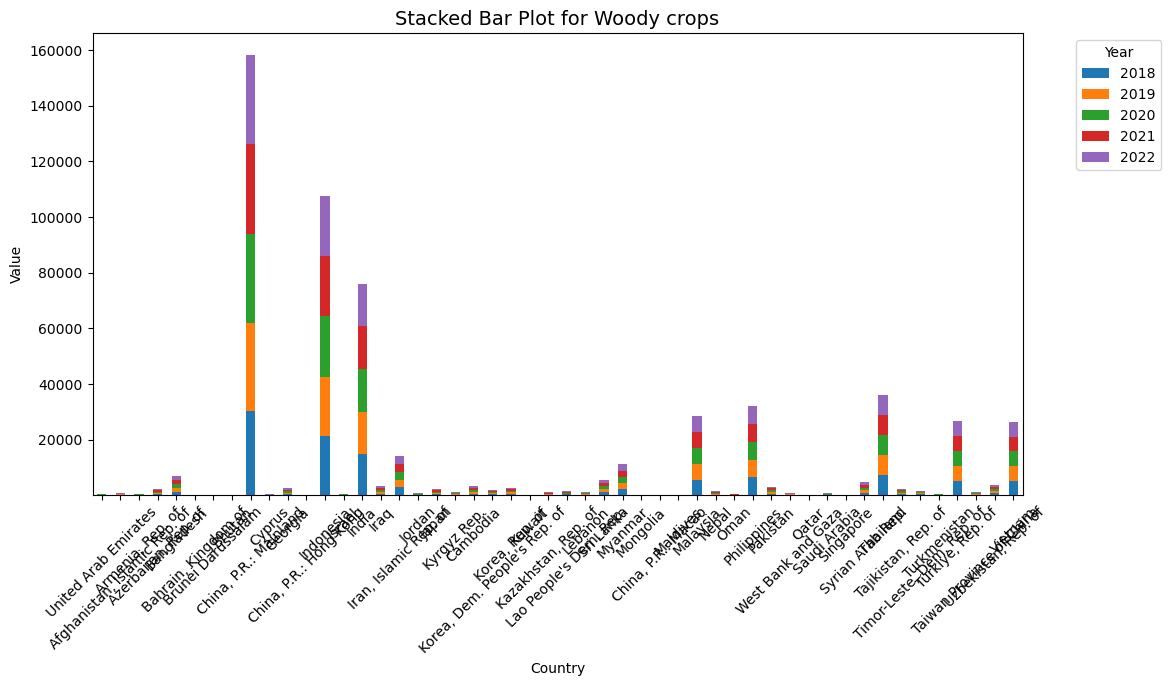


Top 5 Countries:
                   Country      2022
116  China, P.R.: Mainland  31986.42
168              Indonesia  21623.42
194                  India  15270.80
558               Thailand   7213.15
467            Philippines   6439.98

Bottom 5 Countries:
                 Country  2022
402   China, P.R.: Macao  0.22
77   Bahrain, Kingdom of  0.28
415             Maldives  0.84
532            Singapore  1.84
506                Qatar  3.14




In [15]:
# Phân tích từng Indicator
indicators = asian_land_cover['Indicator'].unique()
for indicator in indicators:
    print(f"=== Analysis for Indicator: {indicator} ===\n")

    # Describe dữ liệu
    desc = asian_land_cover[asian_land_cover['Indicator'] == indicator][years].describe()
    print("Statistical Summary:")
    print(desc)

    # Biểu đồ đường
    print("\nLine Plot:")
    plot_line(asian_land_cover, indicator, years)

    # Biểu đồ thanh xếp chồng
    print("\nStacked Bar Plot:")
    plot_stacked_bar(asian_land_cover, indicator, years)

    # Top 5 và Bottom 5 quốc gia
    print("\nTop 5 Countries:")
    top5 = find_top_k(asian_land_cover, indicator, '2022', topk=5, ascending=False)
    print(top5)

    print("\nBottom 5 Countries:")
    bottom5 = find_top_k(asian_land_cover, indicator, '2022', topk=5, ascending=True)
    print(bottom5)

    print("\n" + "="*50 + "\n")

In [ ]:
def temperature_change_plot(df, show_value=True, years=None, title="Temperature Change Over Years"):
    if years is None:
        years = [col for col in df.columns if col.isdigit()]
        
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('husl', len(years))
    one_year = True if len(years) == 1 else False
    
    for i, year in enumerate(years):
        value = df[year]
        value.index = df['Country']
        value = value.sort_values()[::-1]
        
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)
            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)
            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
                    
    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

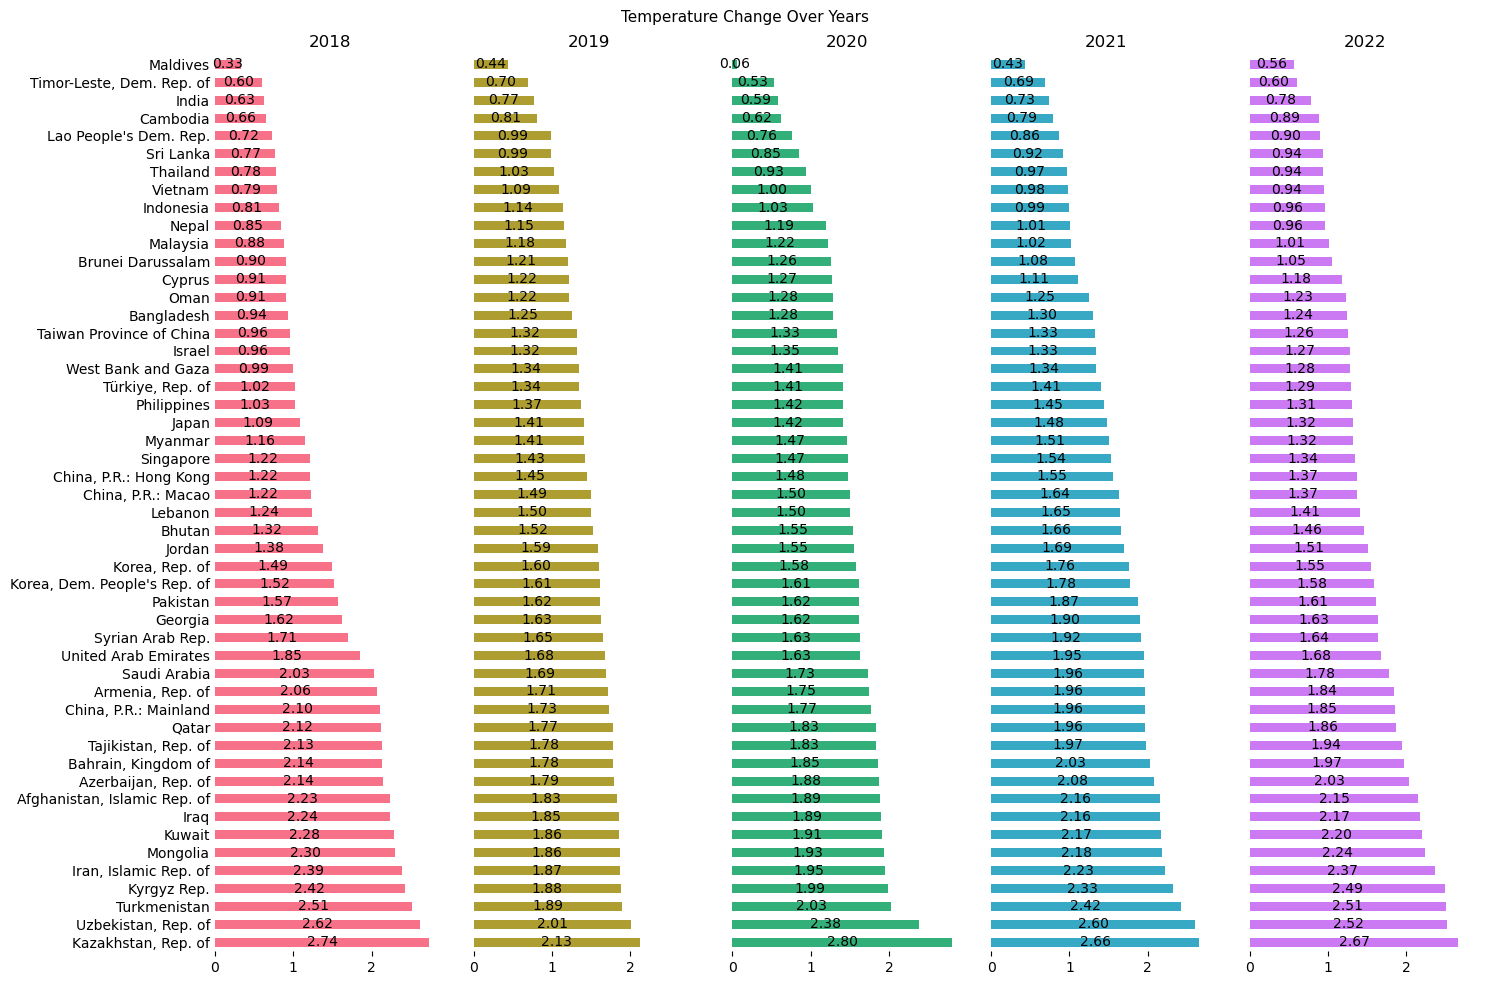

In [ ]:
temperature_change_plot(ast)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vự theo các năm

In [ ]:
def top_k_countries_by_year(df, years=None, topk=5):
    if years is None:
        years = [col for col in df.columns if col.isdigit()]
    for year in years:
        if year not in df.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        top_k = df.sort_values(by=year, ascending=False).head(topk)

        print(f"Top {topk} countries for {year}:")
        for _, row in top_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [ ]:
top_k_countries_by_year(ast, topk=3)

Top 3 countries for 2018:
Country: Armenia, Rep. of, Value: 2.739
Country: Türkiye, Rep. of, Value: 2.617
Country: Georgia, Value: 2.514
----------------------------------------
Top 3 countries for 2019:
Country: Bahrain, Kingdom of, Value: 2.127
Country: Lao People's Dem. Rep., Value: 2.014
Country: Korea, Dem. People's Rep. of, Value: 1.889
----------------------------------------
Top 3 countries for 2020:
Country: Kazakhstan, Rep. of, Value: 2.800
Country: Mongolia, Value: 2.384
Country: Georgia, Value: 2.031
----------------------------------------
Top 3 countries for 2021:
Country: Iraq, Value: 2.661
Country: Kuwait, Value: 2.605
Country: Bahrain, Kingdom of, Value: 2.421
----------------------------------------
Top 3 countries for 2022:
Country: Kazakhstan, Rep. of, Value: 2.665
Country: Uzbekistan, Rep. of, Value: 2.520
Country: Turkmenistan, Value: 2.508
----------------------------------------


In [ ]:
# def preprocess_cluster_province(cluster_province):
#     processed_clusters = {}
#     for cluster, provinces in cluster_province.items():
#         processed_provinces = preprocess_list(provinces)
#         processed_clusters[cluster] = processed_provinces
#     return processed_clusters
# preprocess_cluster_province(cluster_province)

In [ ]:
## find cluster with province
def find_cluster(province):
    for key, value in cluster_province_preprocessed.items():
        if province in value:
            return key

In [ ]:
def line_plot(df, sub_feature, years):
    plt.figure(figsize=(20, 10))
    if sub_feature is None:
        value = df[years]
        province = df.Province
    else:
        value = df[df.Sub_Feature == sub_feature][years]
        province = df[df.Sub_Feature == sub_feature].Province
    plt.plot(province, value)
    ## rorate xlabel
    plt.legend(years)
    plt.xticks(rotation=90)


def describe_(df, sub_feature, years):
    col = years + ['Province']
    if sub_feature is None:
        return df[col].describe()
    else:
        return df[df.Sub_Feature == sub_feature][col].describe()


def province_with_max_value(df, sub_feature, years):
    if sub_feature is None:
        ids = df[years].idxmax()
    else:
        ids = df[df.Sub_Feature == sub_feature][years].idxmax()
    province = df.Province[ids]
    cluster = [find_cluster(p) for p in province]
    ## print year with province
    for i in range(len(years)):
        print(years[i], province.iloc[i], cluster[i])
    # return province


def top_k_province_best_sub_feature(df, sub_feature, years, topk=5):
    for year in years:
        i = 0
        if sub_feature is None:
            top_k = df[year].sort_values(ascending=False).head(topk)
        else:
            top_k = df[df.Sub_Feature == sub_feature][year].sort_values(ascending=False).head(topk)
        provinces = df.loc[top_k.index, 'Province']
        cluster = [find_cluster(p) for p in provinces]
        print(f"{year}:")
        for province, value in zip(provinces, top_k):
            print(f"{province}, {cluster[i]}: {value}")
            i +=1
        print('-'*30)


In [ ]:
def stacked_bar_plot(df, sub_feature, years, title):
    plt.figure(figsize=(20, 10))
    if sub_feature is None:
        value = df[years]
        value.index = df.Province
    else:
        value = df[df.Sub_Feature == sub_feature][years]
        value.index = df[df.Sub_Feature == sub_feature].Province
    value.plot(kind='bar', stacked=True, figsize=(20,8))
    ## rorate xlabel
    plt.xlabel("")
    plt.title(title)
    plt.xticks(rotation=90)

In [ ]:
def pannel_bar_plot(df, sub_feature, years, title):
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('husl', len(years))
    for i, year in enumerate(years):
        if sub_feature is None:
            value = df[year]
            value.index = df.Province

        else:
            value = df[df.Sub_Feature == sub_feature][year]
            value.index = df[df.Sub_Feature == sub_feature].Province

        value = value[::-1]
        value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
        axs[i].set_ylabel("")
        axs[i].set_title(f"{year}")
        axs[i].grid(False)
        # if i != 0:  # Add vertical line to separate years
        #     axs[i].axvline(x=0, color='k', linestyle='-')
        # Remove spines
        for spine in ["left", "right", "top", "bottom"]:
            axs[i].spines[spine].set_visible(False)

        axs[i].tick_params(axis='y', length=0)

    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
def top_k_province_worst_sub_feature(df, sub_feature, years, topk=5):
    for year in years:
        i = 0
        if sub_feature is None:
            top_k = df[year].sort_values(ascending=True).head(topk)
        else:
            top_k = df[df.Sub_Feature == sub_feature][year].sort_values(ascending=True).head(topk)
        provinces = df.loc[top_k.index, 'Province']
        cluster = [find_cluster(p) for p in provinces]
        print(f"{year}:")
        for province, value in zip(provinces, top_k):
            print(f"{province}, {cluster[i]}: {value}")
            i +=1
        print('-'*30)

In [ ]:
def percentage(df, sub_feature, years, title):
    for year in years:
      if sub_feature is None:
        per = df[year] / df[year].sum(axis=1)
      else:
        per = df[df.Sub_Feature == sub_feature][year] / df[df.Sub_Feature == sub_feature][year].sum(axis=1)

    return per

In [ ]:
def report(df, sub_feature, years, title):
    stacked_bar_plot(df[df.Province.isin(province_name_preprocessed)], sub_feature, years, title)
    stacked_bar_plot(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years, title)
    print(describe_(df[df.Province.isin(province_name_preprocessed)], sub_feature, years))
    print(describe_(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years))
    # province_with_max_value(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    top_k_province_best_sub_feature(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)

In [ ]:
# colours
low_c = '#dd4124'
high_c = '#009473'
plt.rcParams["font.family"] = "monospace"

In [ ]:
'''
def pannel_bar_plot(df, show_value, sub_feature, years, title):
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('husl', len(years))
    one_year = True if len(years) == 1 else False
    for i, year in enumerate(years):
        if sub_feature is None:
            value = df[year]
            value.index = df.Province

        else:
            value = df[df.Sub_Feature == sub_feature][year]
            value.index = df[df.Sub_Feature == sub_feature].Province

        value = value[::-1]
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            # if i != 0:  # Add vertical line to separate years
            #     axs[i].axvline(x=0, color='k', linestyle='-')
            # Remove spines
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)

            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            # if i != 0:  # Add vertical line to separate years
            #     axs[i].axvline(x=0, color='k', linestyle='-')
            # Remove spines
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)

            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')

    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()




def average_describe(df, is_Province, sub_feature, years):
    if is_Province:
        df = df[df.Province.isin(province_name_preprocessed)]
    else:
        df = df[df.Province.isin(vung_mien_name_preprocessed)]
    if sub_feature is not None:
        min_value = df[df.Sub_Feature == sub_feature][years].mean(axis=1).idxmin()
        max_value = df[df.Sub_Feature == sub_feature][years].mean(axis=1).idxmax()
        print(df[df.Sub_Feature == sub_feature][years].mean(axis=1).describe())
        print(df.loc[min_value].Province, df.loc[max_value].Province)
    else:
        min_value = df[years].mean(axis=1).idxmin()
        max_value = df[years].mean(axis=1).idxmax()
        print(df[years].mean(axis=1).describe())
        print(df.loc[min_value].Province, " | ", df.loc[max_value].Province)




def report_p(df, sub_feature, years, title):
    #pannel_bar_plot(df[df.Province.isin(province_name_preprocessed)], False, sub_feature, years, title)
    #pannel_bar_plot(df[df.Province.isin(vung_mien_name_preprocessed)], True, sub_feature, years, title)
    print(describe_(df[df.Province.isin(province_name_preprocessed)], sub_feature, years))
    #print(describe_(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years))
    # province_with_max_value(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    print("\nTOP 10 THẤP NHẤT: \n")
    top_k_province_worst_sub_feature(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    print("\nTOP 10 CAO NHẤT: \n")
    top_k_province_best_sub_feature(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    #average_describe(df, True, sub_feature, years)
    #average_describe(df, False, sub_feature, years)

def report_vm(df, sub_feature, years, title):
    #pannel_bar_plot(df[df.Province.isin(province_name_preprocessed)], False, sub_feature, years, title)
    #pannel_bar_plot(df[df.Province.isin(vung_mien_name_preprocessed)], True, sub_feature, years, title)
    #print(describe_(df[df.Province.isin(province_name_preprocessed)], sub_feature, years))
    print(describe_(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years))
    # province_with_max_value(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    print("\nTOP 10 THẤP NHẤT: \n")
    top_k_province_worst_sub_feature(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years)
    print("\nTOP 10 CAO NHẤT: \n")
    top_k_province_best_sub_feature(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years)
    #average_describe(df, True, sub_feature, years)
    #average_describe(df, False, sub_feature, years)
'''

'\ndef pannel_bar_plot(df, show_value, sub_feature, years, title):\n    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)\n    colors = sns.color_palette(\'husl\', len(years))\n    one_year = True if len(years) == 1 else False\n    for i, year in enumerate(years):\n        if sub_feature is None:\n            value = df[year]\n            value.index = df.Province\n\n        else:\n            value = df[df.Sub_Feature == sub_feature][year]\n            value.index = df[df.Sub_Feature == sub_feature].Province\n\n        value = value[::-1]\n        if one_year:\n            bars = value.plot(kind=\'barh\', stacked=True, ax=axs, color=colors[i])\n            axs.set_ylabel("")\n            axs.set_title(f"{year}")\n            axs.grid(False)\n            # if i != 0:  # Add vertical line to separate years\n            #     axs[i].axvline(x=0, color=\'k\', linestyle=\'-\')\n            # Remove spines\n            for spine in ["left", "right", "top", "

## CLCC

In [ ]:
features = clcc.Main_Feature.unique()
print(len(features))
print(features)

7
['Chỉ số phát triển con người phân theo địa phương'
 'Tỷ lệ dân số được sử dụng nguồn nước hợp vệ sinh phân theo địa phương'
 'Tỷ lệ hộ có nhà ở phân theo loại nhà và phân theo địa phương chia theo Địa phương, Năm và Loại nhà'
 'Tỷ lệ hộ dùng điện sinh hoạt phân theo địa phương chia theo Địa phương và Năm'
 'Tỷ lệ dân số đô thị được cung cấp nước sạch qua hệ thống cấp nước tập trung phân theo địa phương() chia theo Địa phương và Năm(khó)'
 'Tỷ lệ dân số dùng hố xí hợp vệ sinhphân theo địa phương chia theo Địa phương và Năm'
 'Tỷ lệ dân số từ 15 tuổi trở lên biết chữ phân theo địa phương chia theo Địa phương và Năm']


In [ ]:
sub_feature = clcc.Sub_Feature.unique()
print(len(sub_feature))
print(sub_feature)

6
[nan 'Chung' 'Nhà kiên cố' 'Nhà bán kiên cố' 'Nhà thiếu kiên cố'
 'Nhà đơn sơ']


In [ ]:
for i in features:
  ck = clcc[clcc.Main_Feature == f'{i}']
  print(i, ' - ' ,ck.Sub_Feature.unique())


Chỉ số phát triển con người phân theo địa phương  -  [nan]
Tỷ lệ dân số được sử dụng nguồn nước hợp vệ sinh phân theo địa phương  -  [nan]
Tỷ lệ hộ có nhà ở phân theo loại nhà và phân theo địa phương chia theo Địa phương, Năm và Loại nhà  -  ['Chung' 'Nhà kiên cố' 'Nhà bán kiên cố' 'Nhà thiếu kiên cố' 'Nhà đơn sơ']
Tỷ lệ hộ dùng điện sinh hoạt phân theo địa phương chia theo Địa phương và Năm  -  [nan]
Tỷ lệ dân số đô thị được cung cấp nước sạch qua hệ thống cấp nước tập trung phân theo địa phương() chia theo Địa phương và Năm(khó)  -  [nan]
Tỷ lệ dân số dùng hố xí hợp vệ sinhphân theo địa phương chia theo Địa phương và Năm  -  [nan]
Tỷ lệ dân số từ 15 tuổi trở lên biết chữ phân theo địa phương chia theo Địa phương và Năm  -  [nan]


### Chỉ số phát triển con người hdi

In [ ]:
hdi_check = clcc[clcc.Main_Feature == 'Chỉ số phát triển con người phân theo địa phương']
print(hdi_check.Sub_Feature.unique())


[nan]


In [ ]:
hdi = preprocess_df(clcc.copy(), features[0], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-63-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-63-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-63-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
hdi

Main_Feature    Province Sub_Feature  \
1   Chỉ số phát triển con người phân the...      ha noi         NaN   
2   Chỉ số phát triển con người phân the...   vinh phuc         NaN   
3   Chỉ số phát triển con người phân the...    bac ninh         NaN   
4   Chỉ số phát triển con người phân the...  quang ninh         NaN   
5   Chỉ số phát triển con người phân the...   hai duong         NaN   
..                                                ...         ...         ...   
59  Chỉ số phát triển con người phân the...     can tho         NaN   
60  Chỉ số phát triển con người phân the...   hau giang         NaN   
61  Chỉ số phát triển con người phân the...   soc trang         NaN   
62  Chỉ số phát triển con người phân the...    bac lieu         NaN   
63  Chỉ số phát triển con người phân the...      ca mau         NaN   

    2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  2017   2018  \
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.794   
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.736   
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.762   
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.757   
5    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.723   
..   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...    ...   
59   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.704   
60   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.654   
61   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.638   
62   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.642   
63   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.659   

     2019   2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  
1   0.799  0.799  0.809         NaN   NaN       0.818  
2   0.749  0.751  0.765         NaN   NaN       0.778  
3   0.764  0.768  0.771         NaN   NaN       0.779  
4   0.769  0.769  0.778         NaN   NaN       0.784  
5   0.728  0.735  0.747         NaN   NaN       0.760  
..    ...    ...    ...         ...   ...         ...  
59  0.724  0.719  0.723         NaN   NaN       0.742  
60  0.664  0.674  0.686         NaN   NaN       0.693  
61  0.640  0.647  0.655         NaN   NaN       0.668  
62  0.648  0.652  0.659         NaN   NaN       0.670  
63  0.661  0.668  0.672         NaN   NaN       0.687  

[63 rows x 26 columns]

In [ ]:
# pannel_bar_plot(hdi, True, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])


In [ ]:
average_describe(hdi, True, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])


count    63.000000
mean      0.695419
std       0.049147
min       0.585800
25%       0.664800
50%       0.689000
75%       0.719100
max       0.803800
dtype: float64
ha giang  |  ha noi


In [ ]:
report_p(hdi, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='test')

            2018       2019       2020       2021  Sơ bộ 2022
count  63.000000  63.000000  63.000000  63.000000   63.000000
mean    0.679714   0.688603   0.693032   0.701667    0.714079
std     0.050513   0.050932   0.048181   0.047864    0.048902
min     0.565000   0.576000   0.582000   0.591000    0.600000
25%     0.650000   0.658000   0.663500   0.674000    0.685500
50%     0.676000   0.685000   0.690000   0.697000    0.708000
75%     0.703500   0.715500   0.716500   0.722500    0.739500
max     0.794000   0.799000   0.799000   0.809000    0.821000

TOP 10 THẤP NHẤT: 

2018:
ha giang, Trung du và miền núi phía Bắc: 0.565
lai chau, Trung du và miền núi phía Bắc: 0.571
dien bien, Trung du và miền núi phía Bắc: 0.588
kon tum, Tây Nguyên: 0.61
son la, Trung du và miền núi phía Bắc: 0.616
------------------------------
2019:
lai chau, Trung du và miền núi phía Bắc: 0.576
ha giang, Trung du và miền núi phía Bắc: 0.579
dien bien, Trung du và miền núi phía Bắc: 0.589
son la, Trung du và miề

In [ ]:
report_vm(hdi, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='test')

       2018  2019  2020  2021  Sơ bộ 2022
count   0.0   0.0   0.0   0.0         0.0
mean    NaN   NaN   NaN   NaN         NaN
std     NaN   NaN   NaN   NaN         NaN
min     NaN   NaN   NaN   NaN         NaN
25%     NaN   NaN   NaN   NaN         NaN
50%     NaN   NaN   NaN   NaN         NaN
75%     NaN   NaN   NaN   NaN         NaN
max     NaN   NaN   NaN   NaN         NaN

TOP 10 THẤP NHẤT: 

2018:
------------------------------
2019:
------------------------------
2020:
------------------------------
2021:
------------------------------
Sơ bộ 2022:
------------------------------

TOP 10 CAO NHẤT: 

2018:
------------------------------
2019:
------------------------------
2020:
------------------------------
2021:
------------------------------
Sơ bộ 2022:
------------------------------


In [ ]:
hdi.Province.nunique()

63

In [ ]:
hdi5 = hdi.copy()

In [ ]:
clcc0 = hdi[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
hdi7 = hdi5.assign(NewColumn=clcc0)
hdi7.rename(columns={"NewColumn":"Trung Bình"})


Main_Feature    Province Sub_Feature  \
1   Chỉ số phát triển con người phân the...      ha noi         NaN   
2   Chỉ số phát triển con người phân the...   vinh phuc         NaN   
3   Chỉ số phát triển con người phân the...    bac ninh         NaN   
4   Chỉ số phát triển con người phân the...  quang ninh         NaN   
5   Chỉ số phát triển con người phân the...   hai duong         NaN   
..                                                ...         ...         ...   
59  Chỉ số phát triển con người phân the...     can tho         NaN   
60  Chỉ số phát triển con người phân the...   hau giang         NaN   
61  Chỉ số phát triển con người phân the...   soc trang         NaN   
62  Chỉ số phát triển con người phân the...    bac lieu         NaN   
63  Chỉ số phát triển con người phân the...      ca mau         NaN   

    2002  2003  2004  2005  2006  2007  2008  ...  2016  2017   2018   2019  \
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.794  0.799   
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.736  0.749   
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.762  0.764   
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.757  0.769   
5    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.723  0.728   
..   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...    ...    ...   
59   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.704  0.724   
60   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.654  0.664   
61   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.638  0.640   
62   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.642  0.648   
63   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.659  0.661   

     2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  Trung Bình  
1   0.799  0.809         NaN   NaN       0.818      0.8038  
2   0.751  0.765         NaN   NaN       0.778      0.7558  
3   0.768  0.771         NaN   NaN       0.779      0.7688  
4   0.769  0.778         NaN   NaN       0.784      0.7714  
5   0.735  0.747         NaN   NaN       0.760      0.7386  
..    ...    ...         ...   ...         ...         ...  
59  0.719  0.723         NaN   NaN       0.742      0.7224  
60  0.674  0.686         NaN   NaN       0.693      0.6742  
61  0.647  0.655         NaN   NaN       0.668      0.6496  
62  0.652  0.659         NaN   NaN       0.670      0.6542  
63  0.668  0.672         NaN   NaN       0.687      0.6694  

[63 rows x 27 columns]

In [ ]:
hdi7.to_csv('hdi.csv', encoding='utf-8', index=False)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7875 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  func(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7875 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


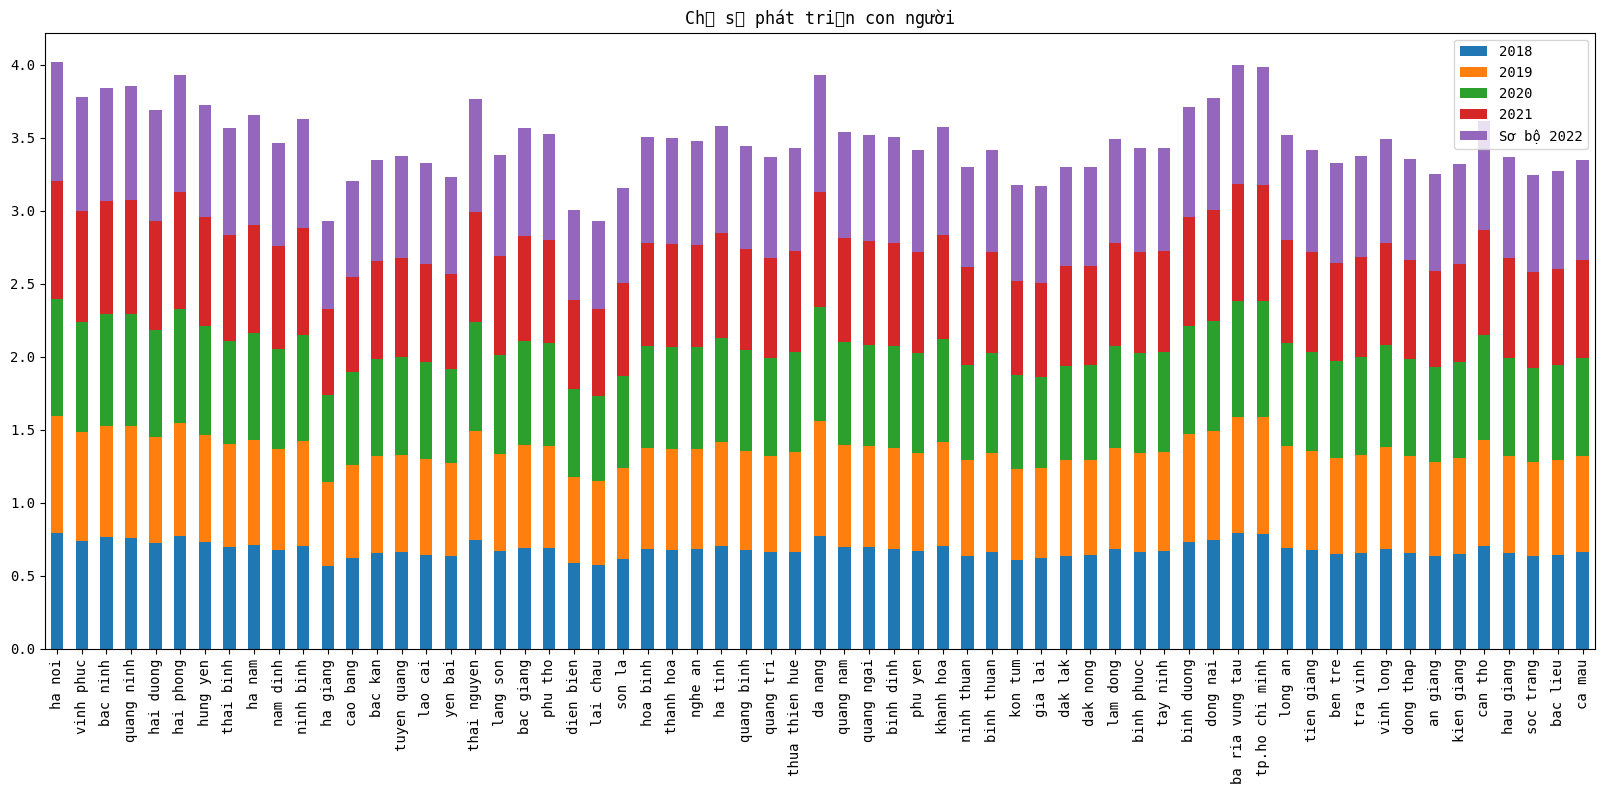

In [ ]:
stacked_bar_plot(hdi, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Chỉ số phát triển con người')

In [ ]:
describe_(hdi, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018       2019       2020       2021  Sơ bộ 2022
count  63.000000  63.000000  63.000000  63.000000   63.000000
mean    0.679714   0.688603   0.693032   0.701667    0.714079
std     0.050513   0.050932   0.048181   0.047864    0.048902
min     0.565000   0.576000   0.582000   0.591000    0.600000
25%     0.650000   0.658000   0.663500   0.674000    0.685500
50%     0.676000   0.685000   0.690000   0.697000    0.708000
75%     0.703500   0.715500   0.716500   0.722500    0.739500
max     0.794000   0.799000   0.799000   0.809000    0.821000

In [ ]:
province_with_max_value(hdi, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018 ha noi Đồng bằng sông Hồng
2019 ha noi Đồng bằng sông Hồng
2020 ha noi Đồng bằng sông Hồng
2021 ha noi Đồng bằng sông Hồng
Sơ bộ 2022 ba ria vung tau Đông Nam Bộ


In [ ]:
top_k_province_worst_sub_feature(hdi, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], topk=10)

2018:
ha giang, Trung du và miền núi phía Bắc: 0.565
lai chau, Trung du và miền núi phía Bắc: 0.571
dien bien, Trung du và miền núi phía Bắc: 0.588
kon tum, Tây Nguyên: 0.61
son la, Trung du và miền núi phía Bắc: 0.616
gia lai, Tây Nguyên: 0.618
cao bang, Trung du và miền núi phía Bắc: 0.624
yen bai, Trung du và miền núi phía Bắc: 0.632
dak lak, Tây Nguyên: 0.636
an giang, Đồng bằng sông Cửu Long: 0.636
------------------------------
2019:
lai chau, Trung du và miền núi phía Bắc: 0.576
ha giang, Trung du và miền núi phía Bắc: 0.579
dien bien, Trung du và miền núi phía Bắc: 0.589
son la, Trung du và miền núi phía Bắc: 0.622
gia lai, Tây Nguyên: 0.622
kon tum, Tây Nguyên: 0.624
cao bang, Trung du và miền núi phía Bắc: 0.633
yen bai, Trung du và miền núi phía Bắc: 0.637
soc trang, Đồng bằng sông Cửu Long: 0.64
an giang, Đồng bằng sông Cửu Long: 0.643
------------------------------
2020:
lai chau, Trung du và miền núi phía Bắc: 0.582
ha giang, Trung du và miền núi phía Bắc: 0.591
dien bien

In [ ]:
top_k_province_best_sub_feature(hdi, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], topk=10)

2018:
ha noi, Đồng bằng sông Hồng: 0.794
ba ria vung tau, Đông Nam Bộ: 0.789
tp.ho chi minh, Đông Nam Bộ: 0.786
da nang, Bắc Trung Bộ và duyên hải miền Trung: 0.773
hai phong, Đồng bằng sông Hồng: 0.769
bac ninh, Đồng bằng sông Hồng: 0.762
quang ninh, Đồng bằng sông Hồng: 0.757
thai nguyen, Trung du và miền núi phía Bắc: 0.745
dong nai, Đông Nam Bộ: 0.742
vinh phuc, Đồng bằng sông Hồng: 0.736
------------------------------
2019:
ha noi, Đồng bằng sông Hồng: 0.799
ba ria vung tau, Đông Nam Bộ: 0.799
tp.ho chi minh, Đông Nam Bộ: 0.798
da nang, Bắc Trung Bộ và duyên hải miền Trung: 0.788
hai phong, Đồng bằng sông Hồng: 0.777
quang ninh, Đồng bằng sông Hồng: 0.769
bac ninh, Đồng bằng sông Hồng: 0.764
dong nai, Đông Nam Bộ: 0.749
vinh phuc, Đồng bằng sông Hồng: 0.749
thai nguyen, Trung du và miền núi phía Bắc: 0.748
------------------------------
2020:
ha noi, Đồng bằng sông Hồng: 0.799
tp.ho chi minh, Đông Nam Bộ: 0.795
ba ria vung tau, Đông Nam Bộ: 0.793
hai phong, Đồng bằng sông Hồng: 0.

In [ ]:
hdi

Main_Feature    Province Sub_Feature  \
1   Chỉ số phát triển con người phân the...      ha noi         NaN   
2   Chỉ số phát triển con người phân the...   vinh phuc         NaN   
3   Chỉ số phát triển con người phân the...    bac ninh         NaN   
4   Chỉ số phát triển con người phân the...  quang ninh         NaN   
5   Chỉ số phát triển con người phân the...   hai duong         NaN   
..                                                ...         ...         ...   
59  Chỉ số phát triển con người phân the...     can tho         NaN   
60  Chỉ số phát triển con người phân the...   hau giang         NaN   
61  Chỉ số phát triển con người phân the...   soc trang         NaN   
62  Chỉ số phát triển con người phân the...    bac lieu         NaN   
63  Chỉ số phát triển con người phân the...      ca mau         NaN   

    2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  2017   2018  \
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.794   
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.736   
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.762   
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.757   
5    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.723   
..   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...    ...   
59   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.704   
60   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.654   
61   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.638   
62   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.642   
63   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.659   

     2019   2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  
1   0.799  0.799  0.809         NaN   NaN       0.818  
2   0.749  0.751  0.765         NaN   NaN       0.778  
3   0.764  0.768  0.771         NaN   NaN       0.779  
4   0.769  0.769  0.778         NaN   NaN       0.784  
5   0.728  0.735  0.747         NaN   NaN       0.760  
..    ...    ...    ...         ...   ...         ...  
59  0.724  0.719  0.723         NaN   NaN       0.742  
60  0.664  0.674  0.686         NaN   NaN       0.693  
61  0.640  0.647  0.655         NaN   NaN       0.668  
62  0.648  0.652  0.659         NaN   NaN       0.670  
63  0.661  0.668  0.672         NaN   NaN       0.687  

[63 rows x 26 columns]

In [ ]:
hdi5 = hdi[['Province','2018', '2019', '2020', '2021','Sơ bộ 2022']]
hdi5

Province   2018   2019   2020   2021  Sơ bộ 2022
1       ha noi  0.794  0.799  0.799  0.809       0.818
2    vinh phuc  0.736  0.749  0.751  0.765       0.778
3     bac ninh  0.762  0.764  0.768  0.771       0.779
4   quang ninh  0.757  0.769  0.769  0.778       0.784
5    hai duong  0.723  0.728  0.735  0.747       0.760
..         ...    ...    ...    ...    ...         ...
59     can tho  0.704  0.724  0.719  0.723       0.742
60   hau giang  0.654  0.664  0.674  0.686       0.693
61   soc trang  0.638  0.640  0.647  0.655       0.668
62    bac lieu  0.642  0.648  0.652  0.659       0.670
63      ca mau  0.659  0.661  0.668  0.672       0.687

[63 rows x 6 columns]

In [ ]:
hdi5

Province   2018   2019   2020   2021  Sơ bộ 2022
1       ha noi  0.794  0.799  0.799  0.809       0.818
2    vinh phuc  0.736  0.749  0.751  0.765       0.778
3     bac ninh  0.762  0.764  0.768  0.771       0.779
4   quang ninh  0.757  0.769  0.769  0.778       0.784
5    hai duong  0.723  0.728  0.735  0.747       0.760
..         ...    ...    ...    ...    ...         ...
59     can tho  0.704  0.724  0.719  0.723       0.742
60   hau giang  0.654  0.664  0.674  0.686       0.693
61   soc trang  0.638  0.640  0.647  0.655       0.668
62    bac lieu  0.642  0.648  0.652  0.659       0.670
63      ca mau  0.659  0.661  0.668  0.672       0.687

[63 rows x 6 columns]

In [ ]:
hdi7

Main_Feature    Province Sub_Feature  \
1   Chỉ số phát triển con người phân the...      ha noi         NaN   
2   Chỉ số phát triển con người phân the...   vinh phuc         NaN   
3   Chỉ số phát triển con người phân the...    bac ninh         NaN   
4   Chỉ số phát triển con người phân the...  quang ninh         NaN   
5   Chỉ số phát triển con người phân the...   hai duong         NaN   
..                                                ...         ...         ...   
59  Chỉ số phát triển con người phân the...     can tho         NaN   
60  Chỉ số phát triển con người phân the...   hau giang         NaN   
61  Chỉ số phát triển con người phân the...   soc trang         NaN   
62  Chỉ số phát triển con người phân the...    bac lieu         NaN   
63  Chỉ số phát triển con người phân the...      ca mau         NaN   

    2002  2003  2004  2005  2006  2007  2008  ...  2016  2017   2018   2019  \
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.794  0.799   
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.736  0.749   
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.762  0.764   
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.757  0.769   
5    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.723  0.728   
..   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...    ...    ...   
59   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.704  0.724   
60   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.654  0.664   
61   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.638  0.640   
62   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.642  0.648   
63   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  0.659  0.661   

     2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  NewColumn  
1   0.799  0.809         NaN   NaN       0.818     0.8038  
2   0.751  0.765         NaN   NaN       0.778     0.7558  
3   0.768  0.771         NaN   NaN       0.779     0.7688  
4   0.769  0.778         NaN   NaN       0.784     0.7714  
5   0.735  0.747         NaN   NaN       0.760     0.7386  
..    ...    ...         ...   ...         ...        ...  
59  0.719  0.723         NaN   NaN       0.742     0.7224  
60  0.674  0.686         NaN   NaN       0.693     0.6742  
61  0.647  0.655         NaN   NaN       0.668     0.6496  
62  0.652  0.659         NaN   NaN       0.670     0.6542  
63  0.668  0.672         NaN   NaN       0.687     0.6694  

[63 rows x 27 columns]

In [ ]:
'''
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'hdi8'
# Replace this with your actual DataFrame and column names

# Set the 'Province' column as the index for better visualization

# Transpose the DataFrame to swap the axes
hdi8_transposed = hdi8.T

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
for province in hdi8_transposed.columns:
    plt.barh(hdi8_transposed.index, hdi8_transposed[province], label=province)

# Customize the plot
plt.title('HDI Values Across Provinces for Each Year')
plt.xlabel('HDI Value')
plt.ylabel('Province')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(axis='x')  # Add grid lines along the x-axis
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n# Assuming you have a DataFrame named 'hdi8'\n# Replace this with your actual DataFrame and column names\n\n# Set the 'Province' column as the index for better visualization\n\n# Transpose the DataFrame to swap the axes\nhdi8_transposed = hdi8.T\n\n# Create a horizontal bar plot\nplt.figure(figsize=(10, 6))\nfor province in hdi8_transposed.columns:\n    plt.barh(hdi8_transposed.index, hdi8_transposed[province], label=province)\n\n# Customize the plot\nplt.title('HDI Values Across Provinces for Each Year')\nplt.xlabel('HDI Value')\nplt.ylabel('Province')\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position\nplt.grid(axis='x')  # Add grid lines along the x-axis\nplt.show()\n"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read data into a DataFrame
df =hdi7

# Plot the kdeplot
sns.kdeplot(df['2018'], label='2018', alpha=0.5)
sns.kdeplot(df['2019'], label='2019')
sns.kdeplot(df['2020'], label='2020')
sns.kdeplot(df['2021'], label='2021')
sns.kdeplot(df['Sơ bộ 2022'], label='Sơ bộ 2022', linestyle='solid')

# Add a title
plt.title('Phân bố chỉ số HDI của các tỉnh thành Việt Nam qua các năm')

# Add labels to the x-axis
plt.xlabel('Chỉ số HDI')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'hdi8'
# Replace this with your actual DataFrame and column names

# Set the 'Province' column as the index for better visualization
hdi8.set_index('Province', inplace=True)

# Transpose the DataFrame to swap the axes
hdi8_transposed = hdi8.T

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
for province in hdi8_transposed.columns:
    plt.barh(hdi8_transposed.index, hdi8_transposed[province], label=province)

# Customize the plot
plt.title('HDI Values Across Provinces for Each Year')
plt.xlabel('HDI Value')
plt.ylabel('Province')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(axis='x')  # Add grid lines along the x-axis
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'hdi8'
# Replace this with your actual DataFrame and column names

# Transpose the DataFrame to swap the axes
hdi8_transposed = hdi7.T

# Create a line plot
plt.figure(figsize=(12, 8))
for province in hdi8_transposed.columns:
    plt.plot(hdi8_transposed.index, hdi8_transposed[province], label=province, marker='o')

# Customize the plot
plt.title('HDI Values Across Provinces Over the Years')
plt.xlabel('Year')
plt.ylabel('HDI Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(False)  # Add grid lines
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided data

# Extract the provinces and years
provinces = df.columns[1:]
years = df.iloc[1:, 0].astype(int)  # Exclude the first row which contains non-numeric values

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
for province in provinces:
    ax.plot(years, df[province][1:], label=province)

# Customize the plot
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('HDI Score', fontsize=14)
ax.set_title('HDI Scores by Province Over the Years', fontsize=16)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Province')
ax.grid(True)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_transposed is the transposed DataFrame

background = "#fbfbfb"
fig, ax = plt.subplots(1, 1, figsize=(25, 15), dpi=150)
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

# Assuming '2018', '2019', ..., '2022' are the columns for each year
years = ['2018', '2019', '2020', '2021', 'Sơ bộ 2022']

# Create a DataFrame with columns 'Province' and 'Year'
df_to_plot = pd.DataFrame({'Province': df_transposed.columns})

for year in years:
    df_to_plot[year] = df_transposed.loc[year].values

# Melt the DataFrame to long format for seaborn
df_to_plot_melted = df_to_plot.melt(id_vars='Province', var_name='Year', value_name='HDI-score')

for year in years:
    if year == 'Sơ bộ 2022':
        sns.lineplot(data=df_to_plot_melted[df_to_plot_melted['Year'] == year], x='Province', y='HDI-score', label=year, color='black', alpha=0.7)
    else:
        sns.lineplot(data=df_to_plot_melted[df_to_plot_melted['Year'] == year], x='Province', y='HDI-score', label=year, color='black', alpha=0.2)

# Calculate the average for 'Trung Bình'
average_value = df_to_plot.drop('Province', axis=1).mean(axis=1)
sns.lineplot(data=df_to_plot, x='Province', y=average_value, label='Trung Bình', color='green', linewidth=2)

ax.set_xticklabels(df_to_plot['Province'], rotation=90, ha='right')
ax.set_xlabel("Province", fontfamily='monospace', loc='left', color='gray')
ax.set_ylabel("HDI-score", fontfamily='monospace', color='gray')

plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Chỉ số phát triển con người theo thời gian', fontsize=15, fontfamily='monospace', color='#323232')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

background = "#fbfbfb"
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

# Assuming 'Province' is the column with provinces and '2018', '2019', ..., '2022' are the columns for each year
# You need to replace '2018', '2019', ..., '2022' with the actual column names in your DataFrame
years = ['2018', '2019', '2020', '2021', 'Sơ bộ 2022']

# Reduced list as too many to show all at once
top_list_ = hdi5.groupby('Province')['Sơ bộ 2022'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='Sơ bộ 2022', ascending=True)

plot = 1
for province in top_list_['Province']:
    mean = hdi5[hdi5['Province'] == province].groupby('Province')[years].mean()

    # historic scores
    sns.scatterplot(data=hdi5[hdi5['Province'] == province], y=plot, x=years, color='lightgray', s=50, ax=ax)

    # mean score
    sns.scatterplot(data=hdi5[hdi5['Province'] == province], y=plot, x=mean.values.flatten(), color='gold', ec='black', linewidth=1, s=75, ax=ax)

    # 2021 score
    sns.scatterplot(data=hdi5[hdi5['Province'] == province], y=plot, x='Ladder score', color='steelblue', ec='black',
                    linewidth=1, s=75, ax=ax)

    plot += 1

ax.set_yticks(top_list_.index + 1)
ax.set_yticklabels(top_list_['Province'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_xlabel("Happiness Index Score", fontfamily='monospace', loc='left', color='gray')

for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.hlines(y=top_list_.index + 1, xmin=Xstart, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)
ax.text(6.25, Yend + 4.3, 'Happiness Index Scores through the years', fontsize=17, fontweight='bold',
        fontfamily='sansserif', color='#323232')
ax.text(6.25, Yend + 0.75,
        '''
        Countries scores do vary over time, however they remain fairly consistent
        It is interesting that Finland's 2021 score is amongst the highest of all time
        ''', fontsize=12, fontweight='light', fontfamily='monospace', color='gray')

plt.annotate('2021\nscore', xy=(7.842, 19), xytext=(8.2, 11),
             arrowprops=dict(facecolor='steelblue', arrowstyle="->", connectionstyle="arc3,rad=.3"), fontsize=10,
             fontfamily='monospace', ha='center', color='steelblue')

plt.annotate('Mean\nscore', xy=(7.6804, 20), xytext=(8.2, 16),
             arrowprops=dict(facecolor='gold', arrowstyle="->", connectionstyle="arc3,rad=.5"), fontsize=10,
             fontfamily='monospace', ha='center', color='gold')

plt.show()


##

In [ ]:
pannel_bar_plot(hdi, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Chỉ số phát triển con người')


In [ ]:
hdi2 = hdi[['Province', 'Sơ bộ 2022']]
t = hdi2.set_index('Province')['Sơ bộ 2022']
t

In [ ]:
fig = plt.figure(figsize=(15,15),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])


background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# Plots
# Happiest
data = t[:10]

color_map = ['#e7e9e7' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  low_c # color highlight
color_map[17] = color_map[18] = color_map[19] =  high_c
#base
ax0.barh(data.index, 10,
       edgecolor='darkgray',color='lightgray',alpha=0.1)
# actual
ax0.barh(data.index, data,
       edgecolor='darkgray',color=color_map)

for i in range(0,20):
    ax0.annotate(list(data.index)[i],
                   xy=(data[i]-(data[i]*0.01), i),
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='gray',rotation=0)
# diff color text
for i in range(0,3):
    ax0.annotate(list(data.index)[i],
                   xy=(data[i]-(data[i]*0.01), i),
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)

for i in range(17,20):
    ax0.annotate(list(data.index)[i],
                   xy=(data[i]-(data[i]*0.01), i),
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)


ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])



for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)

ax0.text(0,22.5,'The Happiest & Unhappiest Countries in the World',fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')
ax0.text(0,21.3,'We will investigate how these countries differ, and whether or not population\nhas anything to do with it',fontfamily='monospace',fontsize=15,fontweight='light',color='gray')

ax0.annotate('7 of the bottom 10\nare in Africa', xy=(4, 4.5), xytext=(6, 4.5), xycoords='data',
            fontsize=15, ha='center', va='center',fontfamily='monospace',
            bbox=dict(boxstyle='round', fc=low_c),
            arrowprops=dict(arrowstyle='-[, widthB=12.3, lengthB=0.3', lw=1, color='gray'), color='white')

plt.show()

### 'Tỷ lệ dân số được sử dụng nguồn nước hợp vệ sinh phân theo địa phương'

### Kiểm tra

In [ ]:
print(df.tinh)

In [ ]:
sns.scatterplot(data=df, x='hdi', y='biet_chu', hue=df['tinh'] == 'ha noi', palette=cmap, alpha=0.9, ec='black',size=df["nsach_hethong"] * 1000, sizes=(5, 500))


In [ ]:
sns.scatterplot(data=df, x='hdi', y='biet_chu',
                hue=df['tinh'].isin(['Ha Noi', 'Binh Duong', 'TP. Ho Chi Minh']),
                palette=cmap, alpha=0.9, ec='black',
                size=df["nsach_hethong"] * 1000, sizes=(5, 500))

In [ ]:
ax.text(45, 8.5, 'We see a strong relationship between these variables and happiness scores\n'
                  'and countries in Europe have exclusively high scores',
        fontfamily='monospace', fontweight='light', fontsize=12, color='gray')

In [ ]:
cluster_province_preprocessed = {
        'dong bang song hong': ['ha noi','vinh phuc','bac ninh','quang ninh','hai duong','hai phong','hung yen','thai binh','ha nam','nam dinh','ninh binh'],
        'trung du va mien nui phia bac': ['ha giang','cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son','bac giang','phu tho','dien bien','lai chau','son la','hoa binh'],
        'bac trung bo va duyen hai mien trung': ['thanh hoa','nghe an','ha tinh','quang binh','quang tri','thua thien hue','da nang','quang nam','quang ngai','binh dinh','phu yen','khanh hoa','ninh thuan','binh thuan'],
        'tay nguyen': ['kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong'],
        'dong nam bo': ['binh phuoc','tay ninh','binh duong','dong nai','ba ria vung tau','tp.ho chi minh'],
        'dong bang song cuu long': ['long an','tien giang','ben tre','tra vinh','vinh long','dong thap','an giang','kien giang','can tho','hau giang','soc trang','bac lieu','ca mau']
        }

In [ ]:
background = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(18, 12), dpi=200)
fig.patch.set_facecolor(background)  # Màu nền của biểu đồ

# Thay đổi tên cột tương ứng
cmap = [low_c, high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='hdi', y='biet_chu',
                hue=df['tinh'].isin(['kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'ha giang','cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son','bac giang','phu tho','dien bien','lai chau','son la','hoa binh']),
                palette=cmap, alpha=0.9, ec='black',
                size=df["nsach_hethong"], sizes=(10, 200))
ax.set_xlabel("Trình độ giáo dục với độ tuổi trên 15", fontfamily='times', loc='center', color='gray', fontsize=12)
ax.set_ylabel("Chỉ số phát triển con người", fontfamily='times', loc='center', color='gray', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.title('Chỉ số phát triển con người, hệ thống nước sạch và giáo dục ', fontsize=15, fontfamily='times', color='#323232')


In [ ]:
background = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=100)
fig.patch.set_facecolor(background)  # Màu nền của biểu đồ

# Thay đổi tên cột tương ứng
cmap = [low_c, high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='hdi', y='biet_chu',
                hue=df['tinh'].isin(['ha noi','vinh phuc','bac ninh','quang ninh','hai duong','hai phong','hung yen','thai binh','ha nam','nam dinh','ninh binh']),
                palette=cmap, alpha=0.9, ec='black',
                size=df["nsach_hethong"], sizes=(10, 200))
ax.set_xlabel("Trình độ giáo dục với độ tuổi trên 15", fontfamily='times', loc='center', color='gray', fontsize=12)
ax.set_ylabel("Chỉ số phát triển con người", fontfamily='times', loc='center', color='gray', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.title('Chỉ số phát triển con người, hệ thống nước sạch và giáo dục ', fontsize=15, fontfamily='times', color='#323232')


In [ ]:
background = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(20, 19), dpi=300)
fig.patch.set_facecolor(background)  # Màu nền của biểu đồ

# Thay đổi tên cột tương ứng
cmap = [low_c, high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='hdi', y='biet_chu',
                hue=df['tinh'].isin(['ha noi', 'binh duong', 'tp.ho chi minh']),
                palette=cmap, alpha=0.9, ec='black',
                size=df["nsach_hethong"] * 1000, sizes=(5, 500))
ax.set_xlabel("Tuổi thọ sống khỏe mạnh", fontfamily='times', loc='left', color='gray')
ax.set_ylabel("Chỉ số Hạnh phúc", fontfamily='times', loc='top', color='gray')
ax.tick_params(axis='both', which='major', labelsize=10)

for s in ["top", "right", "left"]:
    ax.spines[s].set_visible(False)

ax.text(45, 9.2, 'Chỉ số hạnh phúc, giáo dục và hệ thống nước sạch', fontfamily='sansserif', fontweight='normal',
        fontsize=17, weight='bold', color='#323232')




ax.tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=True)

plt.show()


In [ ]:
features[1]

In [ ]:
clcc

### Code


In [ ]:
nuoc_vs = preprocess_df(clcc.copy(), features[1], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-63-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-63-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-63-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
nuoc_vs

Main_Feature             Province  \
65   Tỷ lệ dân số được sử dụng nguồn ...  dong bang song hong   
66   Tỷ lệ dân số được sử dụng nguồn ...               ha noi   
67   Tỷ lệ dân số được sử dụng nguồn ...            vinh phuc   
68   Tỷ lệ dân số được sử dụng nguồn ...             bac ninh   
69   Tỷ lệ dân số được sử dụng nguồn ...           quang ninh   
..                                                 ...                  ...   
129  Tỷ lệ dân số được sử dụng nguồn ...              can tho   
130  Tỷ lệ dân số được sử dụng nguồn ...            hau giang   
131  Tỷ lệ dân số được sử dụng nguồn ...            soc trang   
132  Tỷ lệ dân số được sử dụng nguồn ...             bac lieu   
133  Tỷ lệ dân số được sử dụng nguồn ...               ca mau   

    Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  \
65          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
66          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
67          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
68          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
69          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
..          ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
129         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
130         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
131         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
132         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
133         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   

     2017   2018   2019   2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  
65    NaN   99.7   99.9   99.8   99.9         NaN   NaN        99.8  
66    NaN  100.0  100.0   99.9   99.9         NaN   NaN       100.0  
67    NaN  100.0  100.0  100.0   99.7         NaN   NaN        99.9  
68    NaN  100.0  100.0  100.0  100.0         NaN   NaN       100.0  
69    NaN  100.0   99.4   98.7   99.7         NaN   NaN        99.4  
..    ...    ...    ...    ...    ...         ...   ...         ...  
129   NaN   98.9   98.8   99.5   99.8         NaN   NaN       100.0  
130   NaN   91.9   95.9   97.4   94.9         NaN   NaN        99.3  
131   NaN   94.1   97.6   99.5   98.7         NaN   NaN        97.6  
132   NaN  100.0  100.0  100.0  100.0         NaN   NaN        99.8  
133   NaN   99.2  100.0   99.6   98.9         NaN   NaN        97.4  

[69 rows x 26 columns]

In [ ]:
nuoc_vs.Province.nunique()

69

In [ ]:
report_p(nuoc_vs, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='')

             2018        2019        2020        2021  Sơ bộ 2022
count   63.000000   63.000000   63.000000   63.000000   63.000000
mean    93.046032   93.403175   95.139683   95.971429   96.898413
std      9.545643    9.750169    8.371718    7.020188    5.076876
min     55.400000   57.500000   58.800000   67.900000   77.300000
25%     91.050000   91.500000   94.550000   96.000000   96.500000
50%     97.300000   97.600000   98.700000   98.700000   98.700000
75%     99.700000   99.950000   99.800000   99.850000   99.900000
max    100.000000  100.000000  100.000000  100.000000  100.000000

TOP 10 THẤP NHẤT: 

2018:
dien bien, Trung du và miền núi phía Bắc: 55.4
ha giang, Trung du và miền núi phía Bắc: 67.9
cao bang, Trung du và miền núi phía Bắc: 70.2
dong thap, Đồng bằng sông Cửu Long: 73.3
bac kan, Trung du và miền núi phía Bắc: 75.7
------------------------------
2019:
dien bien, Trung du và miền núi phía Bắc: 57.5
cao bang, Trung du và miền núi phía Bắc: 62.2
ha giang, Trung du và mi

In [ ]:
clcc1 = nuoc_vs[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()

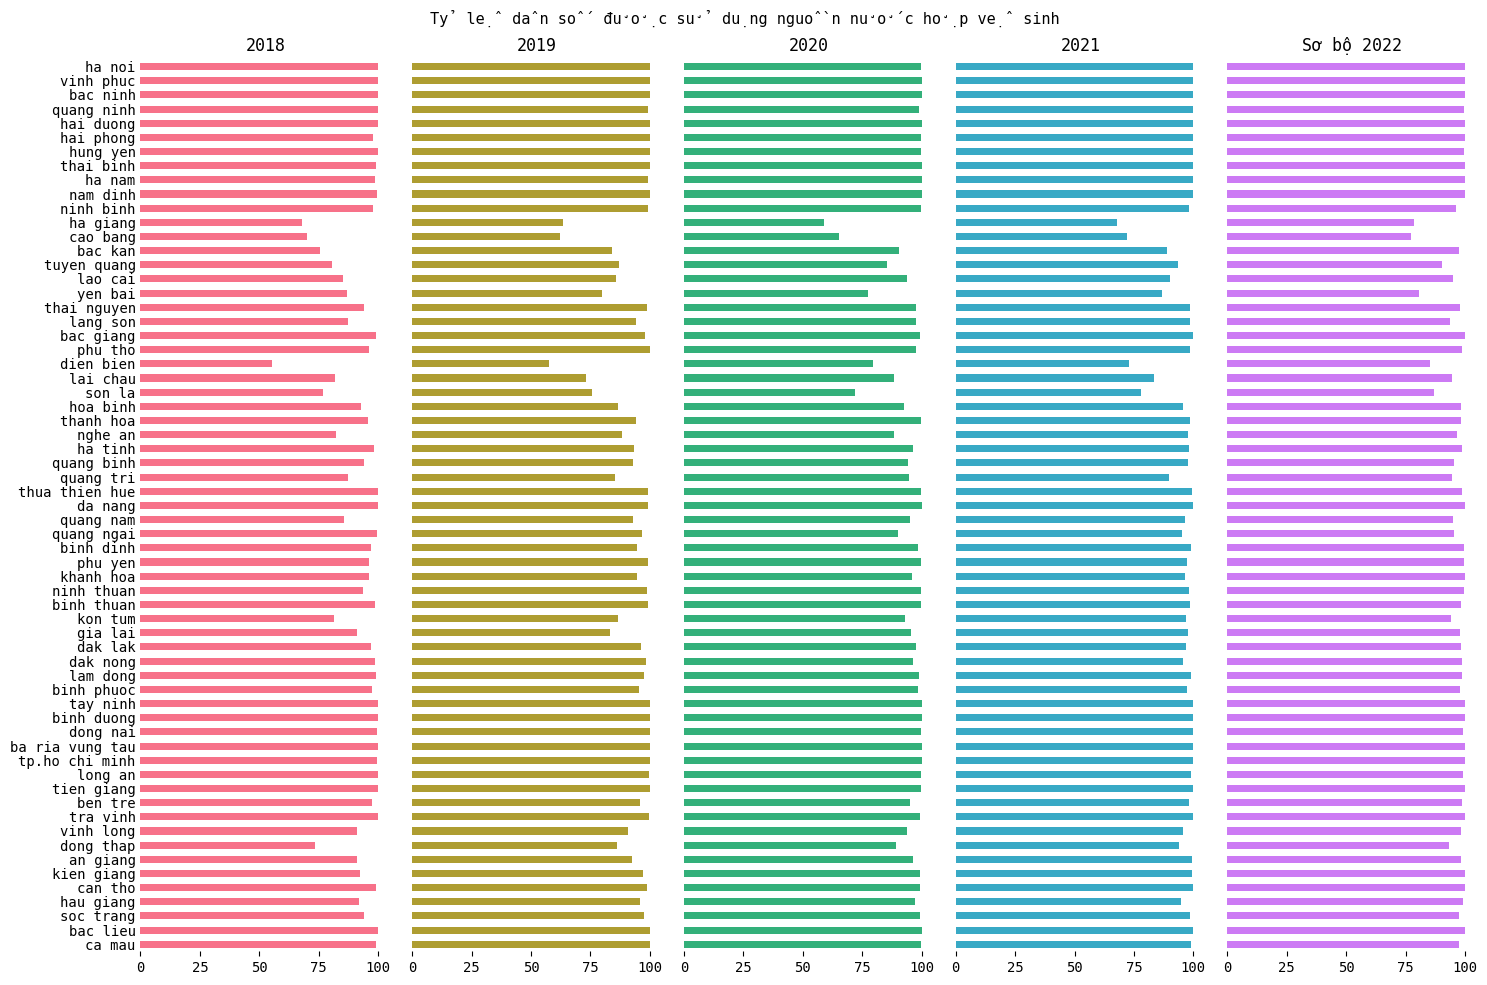

In [ ]:
pannel_bar_plot(nuoc_vs[nuoc_vs.Province.isin(province_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số được sử dụng nguồn nước hợp vệ sinh')


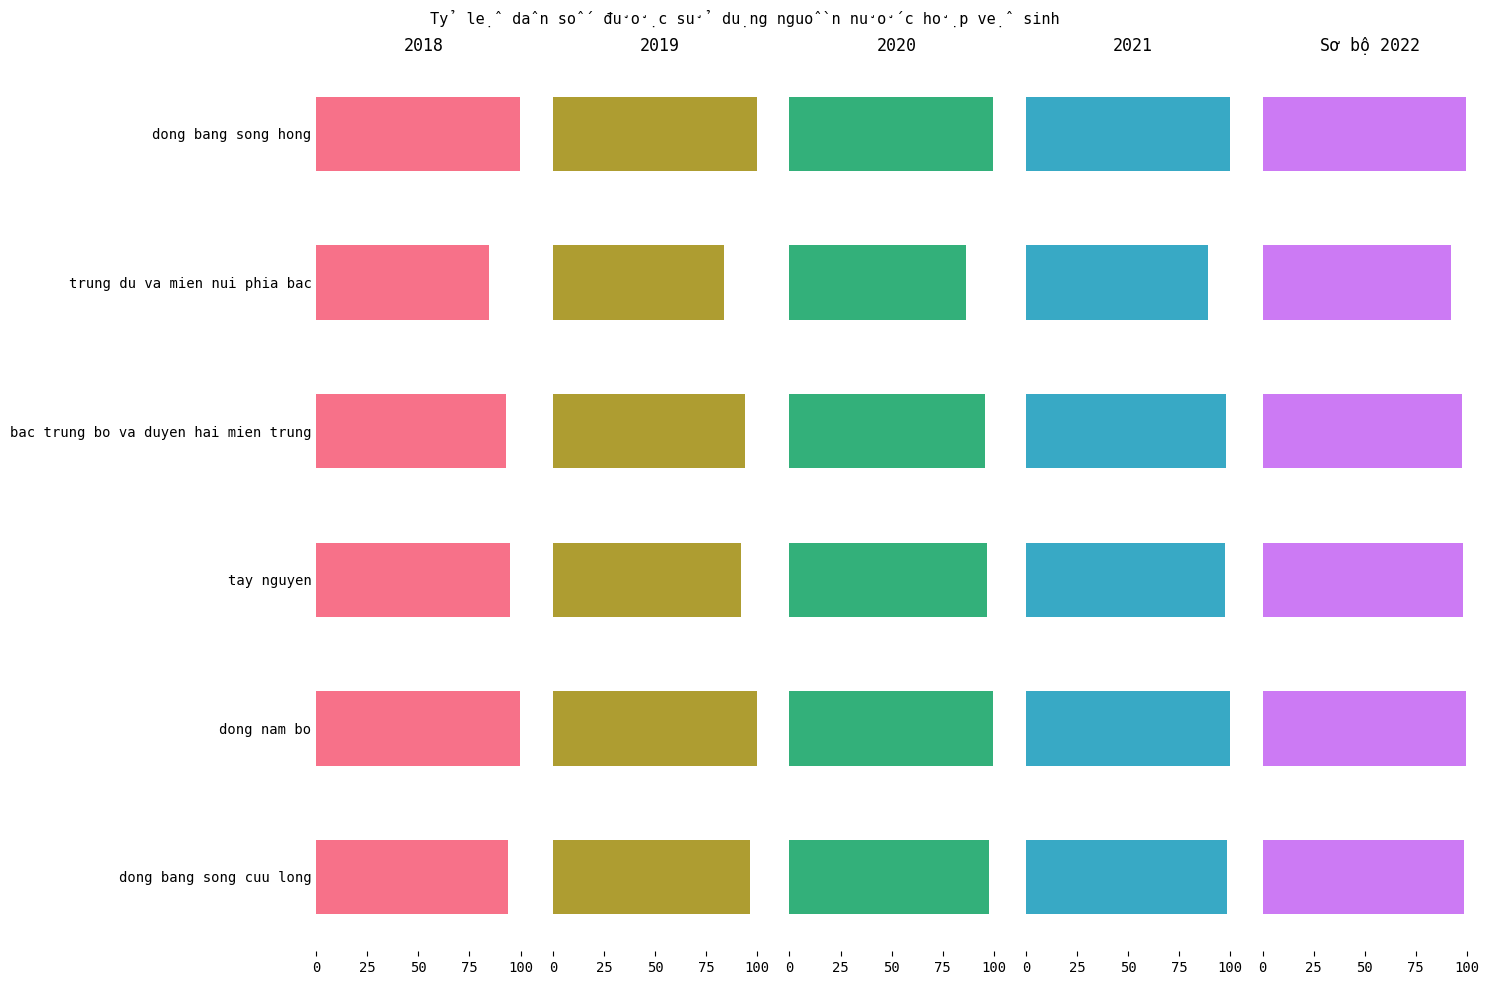

In [ ]:
pannel_bar_plot(nuoc_vs[nuoc_vs.Province.isin(vung_mien_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số được sử dụng nguồn nước hợp vệ sinh')


<Figure size 2000x1000 with 0 Axes>

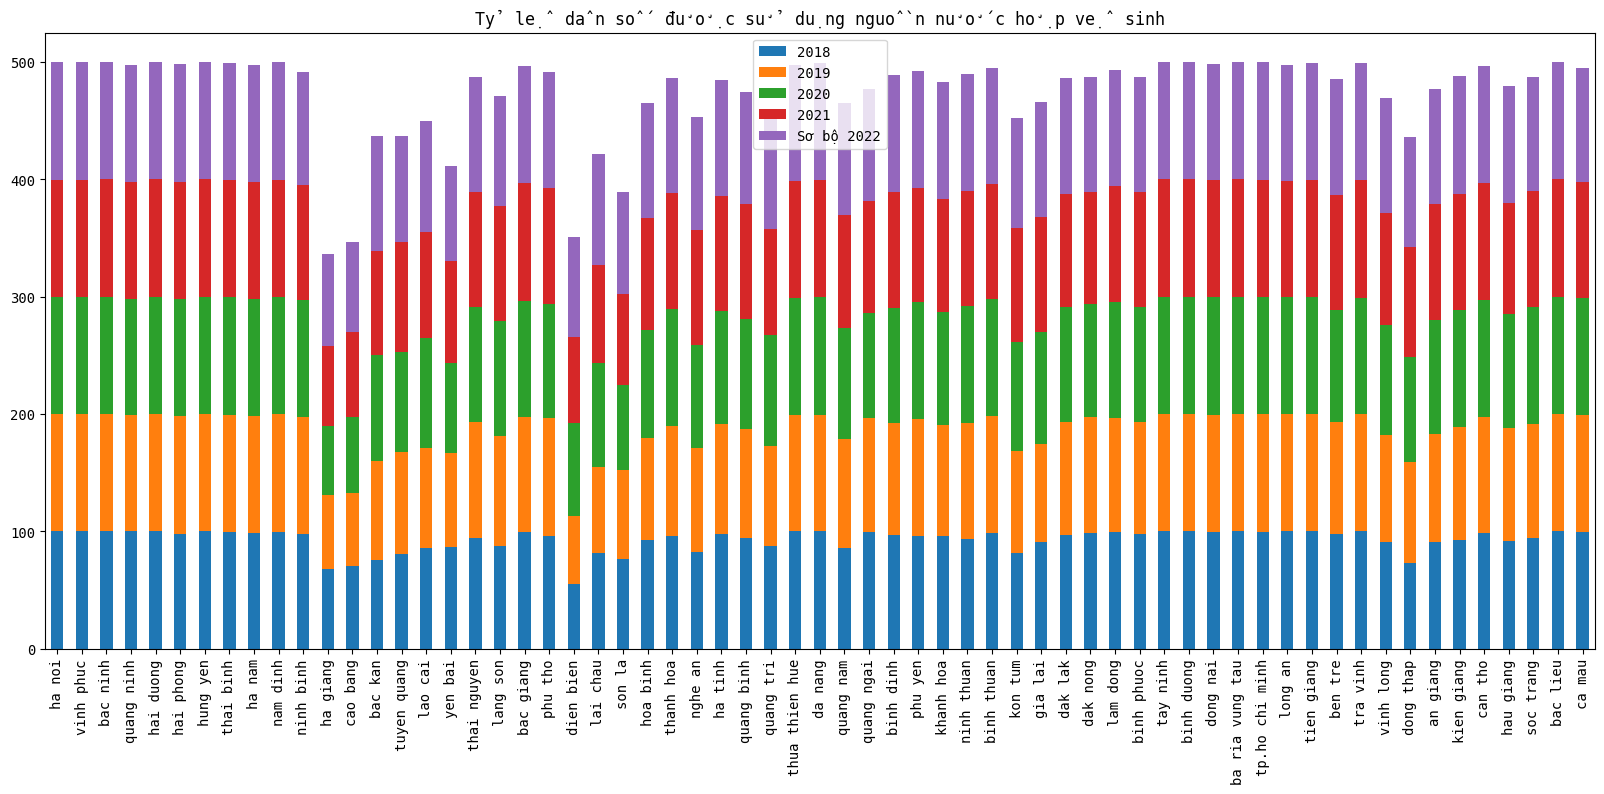

<Figure size 2000x1000 with 0 Axes>

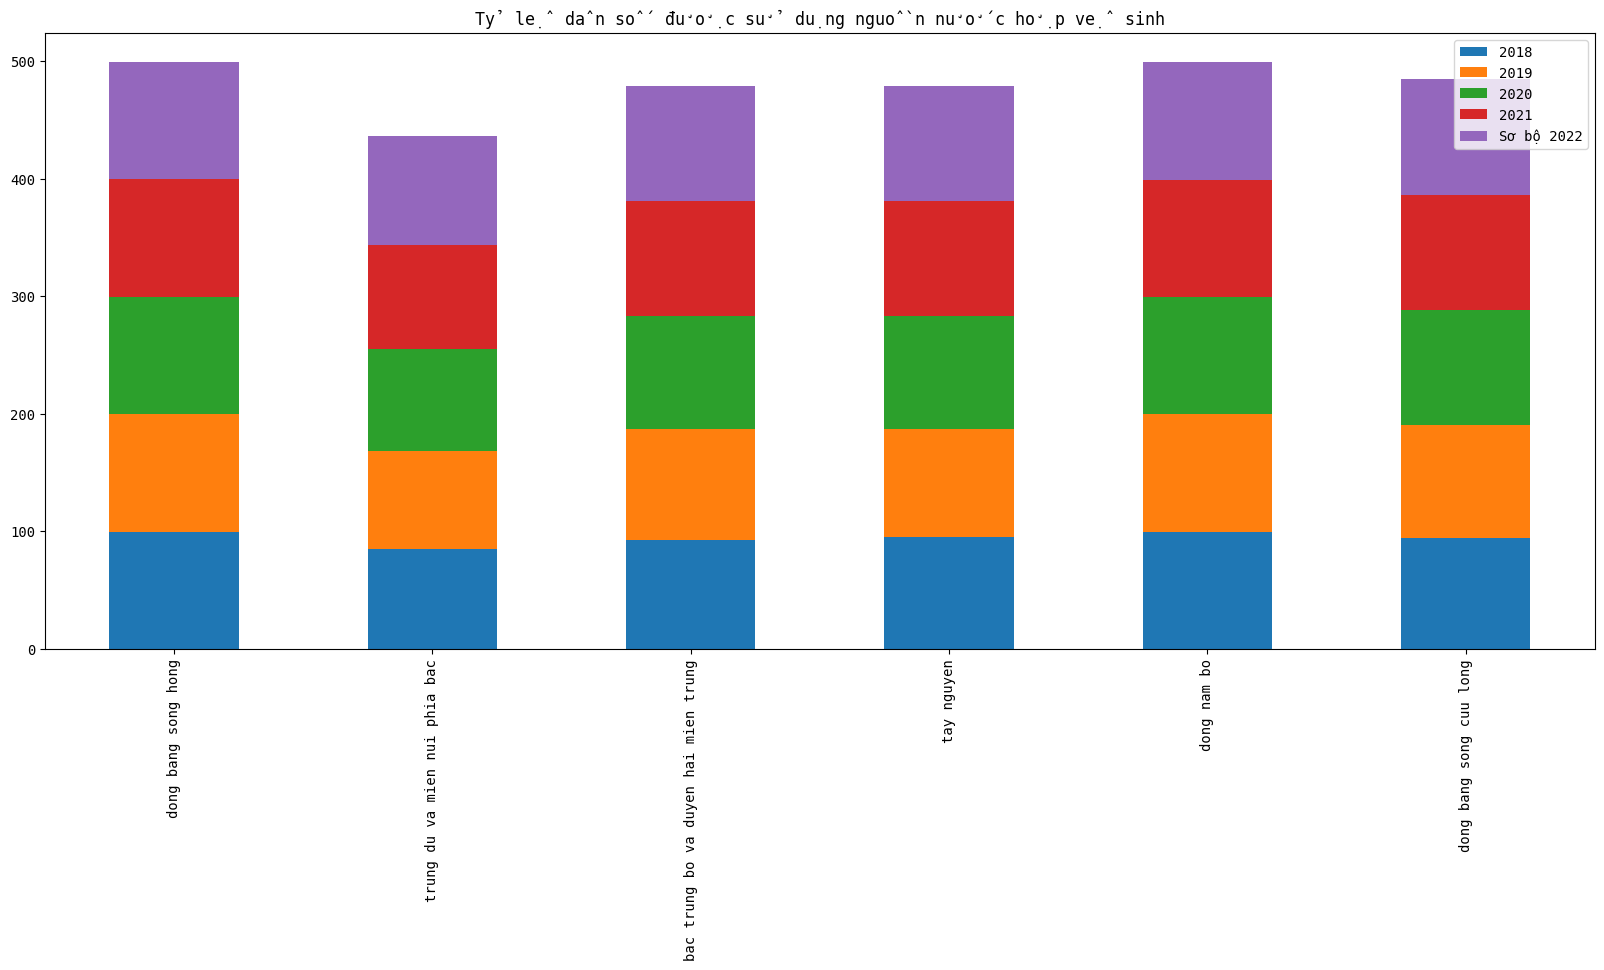

In [ ]:
stacked_bar_plot(nuoc_vs[nuoc_vs.Province.isin(province_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số được sử dụng nguồn nước hợp vệ sinh')
stacked_bar_plot(nuoc_vs[nuoc_vs.Province.isin(vung_mien_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số được sử dụng nguồn nước hợp vệ sinh')

In [ ]:
describe_(nuoc_vs, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018        2019        2020        2021  Sơ bộ 2022
count   69.000000   69.000000   69.000000   69.000000   69.000000
mean    93.152174   93.481159   95.218841   96.066667   96.963768
std      9.243290    9.457510    8.111707    6.801615    4.913935
min     55.400000   57.500000   58.800000   67.900000   77.300000
25%     91.200000   91.900000   94.700000   96.300000   96.800000
50%     97.200000   97.600000   98.600000   98.500000   98.600000
75%     99.700000   99.900000   99.800000   99.900000   99.900000
max    100.000000  100.000000  100.000000  100.000000  100.000000

In [ ]:
province_with_max_value(nuoc_vs, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018 ha noi Đồng bằng sông Hồng
2019 ha noi Đồng bằng sông Hồng
2020 vinh phuc Đồng bằng sông Hồng
2021 bac ninh Đồng bằng sông Hồng
Sơ bộ 2022 ha noi Đồng bằng sông Hồng


In [ ]:
top_k_province_best_sub_feature(nuoc_vs, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], topk=10)

2018:
da nang, Bắc Trung Bộ và duyên hải miền Trung: 100.0
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 100.0
vinh phuc, Đồng bằng sông Hồng: 100.0
bac ninh, Đồng bằng sông Hồng: 100.0
quang ninh, Đồng bằng sông Hồng: 100.0
hai duong, Đồng bằng sông Hồng: 100.0
bac lieu, Đồng bằng sông Cửu Long: 100.0
hung yen, Đồng bằng sông Hồng: 100.0
tra vinh, Đồng bằng sông Cửu Long: 100.0
tien giang, Đồng bằng sông Cửu Long: 100.0
------------------------------
2019:
ca mau, Đồng bằng sông Cửu Long: 100.0
phu tho, Trung du và miền núi phía Bắc: 100.0
tay ninh, Đông Nam Bộ: 100.0
binh duong, Đông Nam Bộ: 100.0
dong nai, Đông Nam Bộ: 100.0
ba ria vung tau, Đông Nam Bộ: 100.0
tp.ho chi minh, Đông Nam Bộ: 100.0
nam dinh, Đồng bằng sông Hồng: 100.0
thai binh, Đồng bằng sông Hồng: 100.0
hung yen, Đồng bằng sông Hồng: 100.0
------------------------------
2020:
da nang, Bắc Trung Bộ và duyên hải miền Trung: 100.0
thai binh, Đồng bằng sông Hồng: 100.0
tay ninh, Đông Nam Bộ: 100.0
binh duong, Đông

### Tỷ lệ hộ dùng điện sinh hoạt phân theo địa phương chia theo Địa phương và Năm  

In [ ]:
dien = preprocess_df(clcc.copy(), features[3], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-63-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-63-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-63-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
dien

Main_Feature    Province  \
485  Tỷ lệ hộ dùng điện sinh hoạt phân th...      ha noi   
487  Tỷ lệ hộ dùng điện sinh hoạt phân th...   vinh phuc   
488  Tỷ lệ hộ dùng điện sinh hoạt phân th...    bac ninh   
489  Tỷ lệ hộ dùng điện sinh hoạt phân th...  quang ninh   
490  Tỷ lệ hộ dùng điện sinh hoạt phân th...   hai duong   
..                                                 ...         ...   
544  Tỷ lệ hộ dùng điện sinh hoạt phân th...     can tho   
545  Tỷ lệ hộ dùng điện sinh hoạt phân th...   hau giang   
546  Tỷ lệ hộ dùng điện sinh hoạt phân th...   soc trang   
547  Tỷ lệ hộ dùng điện sinh hoạt phân th...    bac lieu   
548  Tỷ lệ hộ dùng điện sinh hoạt phân th...      ca mau   

    Sub_Feature  2002  2003  2004  2005   2006  2007   2008  ...  2015   2016  \
485         NaN  99.8   NaN  99.7   NaN   99.8   NaN   99.7  ...   NaN   99.9   
487         NaN  97.7   NaN  99.4   NaN   99.9   NaN  100.0  ...   NaN  100.0   
488         NaN  99.9   NaN  99.6   NaN  100.0   NaN   99.9  ...   NaN  100.0   
489         NaN  85.6   NaN  98.8   NaN   95.8   NaN   97.7  ...   NaN  100.0   
490         NaN  99.6   NaN  99.5   NaN   99.7   NaN   99.9  ...   NaN  100.0   
..          ...   ...   ...   ...   ...    ...   ...    ...  ...   ...    ...   
544         NaN  76.1   NaN  86.9   NaN   93.6   NaN   98.0  ...   NaN   99.7   
545         NaN   NaN   NaN  82.5   NaN   93.8   NaN   98.5  ...   NaN   99.1   
546         NaN  64.6   NaN  81.0   NaN   89.7   NaN   95.8  ...   NaN   99.3   
547         NaN  58.7   NaN  82.0   NaN   92.1   NaN   98.8  ...   NaN  100.0   
548         NaN  58.6   NaN  71.6   NaN   84.0   NaN   92.3  ...   NaN   99.7   

     2017   2018  2019   2020  2021  Sơ bộ 2021   2022  Sơ bộ 2022  
485   NaN   99.8   NaN   99.9   NaN         NaN  100.0         NaN  
487   NaN   99.6   NaN  100.0   NaN         NaN  100.0         NaN  
488   NaN  100.0   NaN  100.0   NaN         NaN  100.0         NaN  
489   NaN  100.0   NaN   99.9   NaN         NaN  100.0         NaN  
490   NaN   99.8   NaN  100.0   NaN         NaN  100.0         NaN  
..    ...    ...   ...    ...   ...         ...    ...         ...  
544   NaN   99.7   NaN  100.0   NaN         NaN  100.0         NaN  
545   NaN   99.8   NaN   99.8   NaN         NaN  100.0         NaN  
546   NaN   99.4   NaN   99.6   NaN         NaN  100.0         NaN  
547   NaN  100.0   NaN   99.8   NaN         NaN  100.0         NaN  
548   NaN   99.9   NaN   99.3   NaN         NaN  100.0         NaN  

[63 rows x 26 columns]

In [ ]:
dien.Province.nunique()

63

In [ ]:
?report

In [ ]:
report_p(df=dien, sub_feature=None, years=['2016', '2018', '2020','2022'], title='')

             2016        2018        2020        2022
count   63.000000   63.000000   63.000000   63.000000
mean    98.047619   98.611111   99.120635   99.458730
std      4.026319    2.858215    1.926903    1.670391
min     80.500000   85.500000   88.700000   87.700000
25%     98.850000   99.250000   99.450000   99.400000
50%     99.700000   99.700000   99.800000  100.000000
75%     99.900000   99.950000  100.000000  100.000000
max    100.000000  100.000000  100.000000  100.000000

TOP 10 THẤP NHẤT: 

2016:
dien bien, Trung du và miền núi phía Bắc: 80.5
cao bang, Trung du và miền núi phía Bắc: 82.2
son la, Trung du và miền núi phía Bắc: 88.0
lai chau, Trung du và miền núi phía Bắc: 89.1
ha giang, Trung du và miền núi phía Bắc: 90.8
------------------------------
2018:
ha giang, Trung du và miền núi phía Bắc: 85.5
lai chau, Trung du và miền núi phía Bắc: 89.8
cao bang, Trung du và miền núi phía Bắc: 89.9
lao cai, Trung du và miền núi phía Bắc: 93.2
son la, Trung du và miền núi phía Bắc:

In [ ]:
clcc2 = dien[['2016', '2018', '2020','2022']].mean(axis=1).tolist()

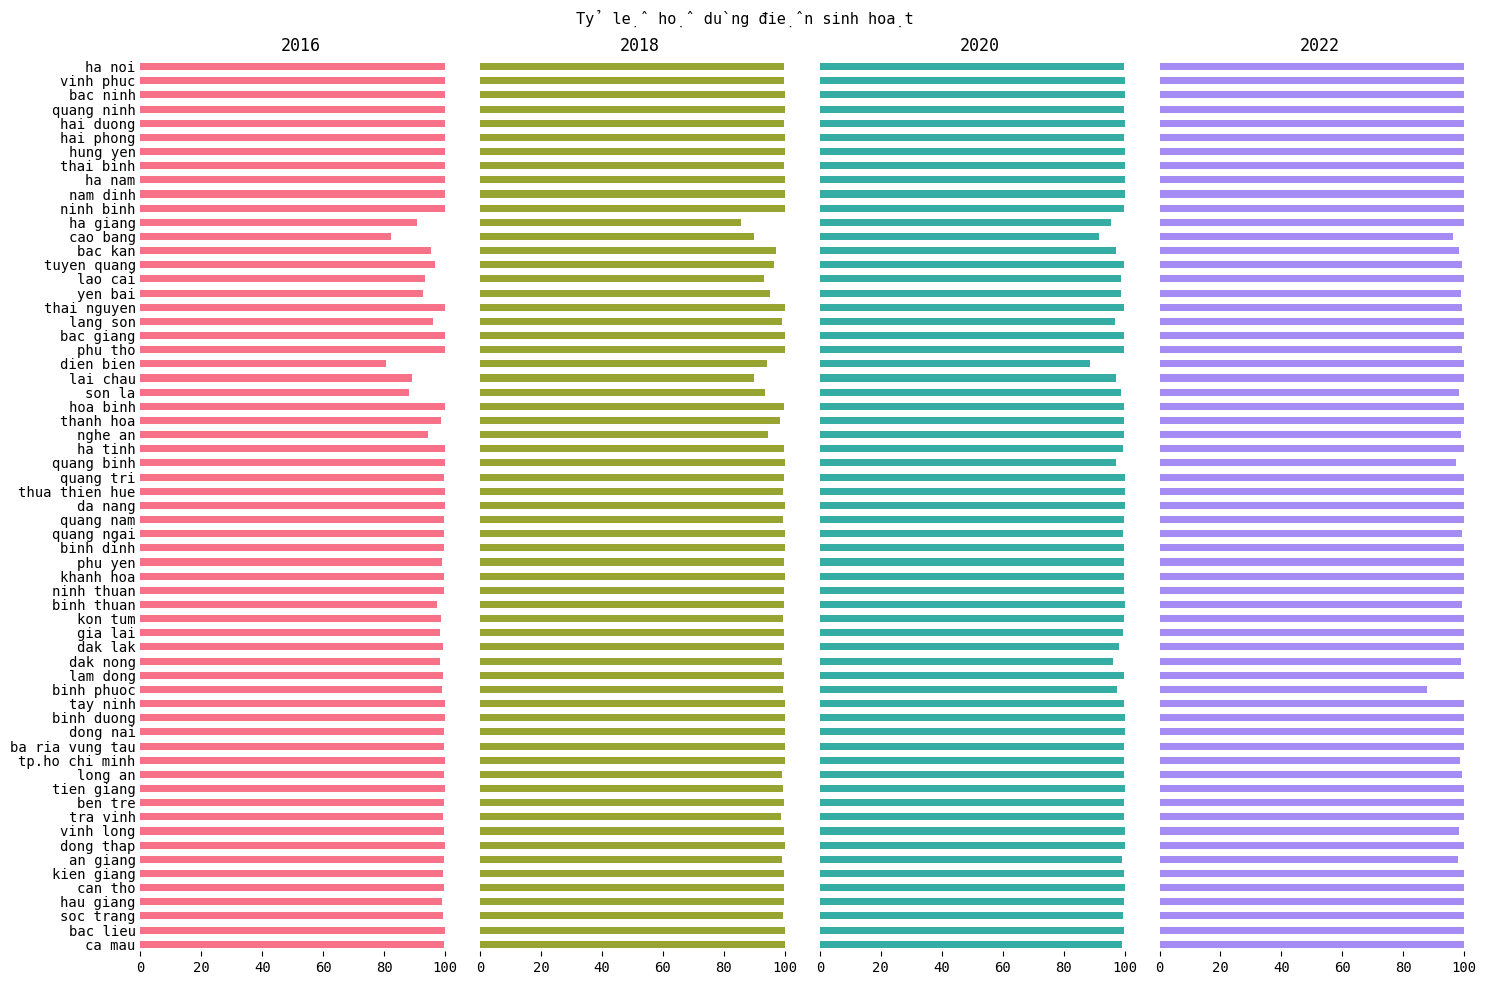

In [ ]:
pannel_bar_plot(dien[dien.Province.isin(province_name_preprocessed)], None, ['2016', '2018', '2020','2022'], title='Tỷ lệ hộ dùng điện sinh hoạt')


<Figure size 2000x1000 with 0 Axes>

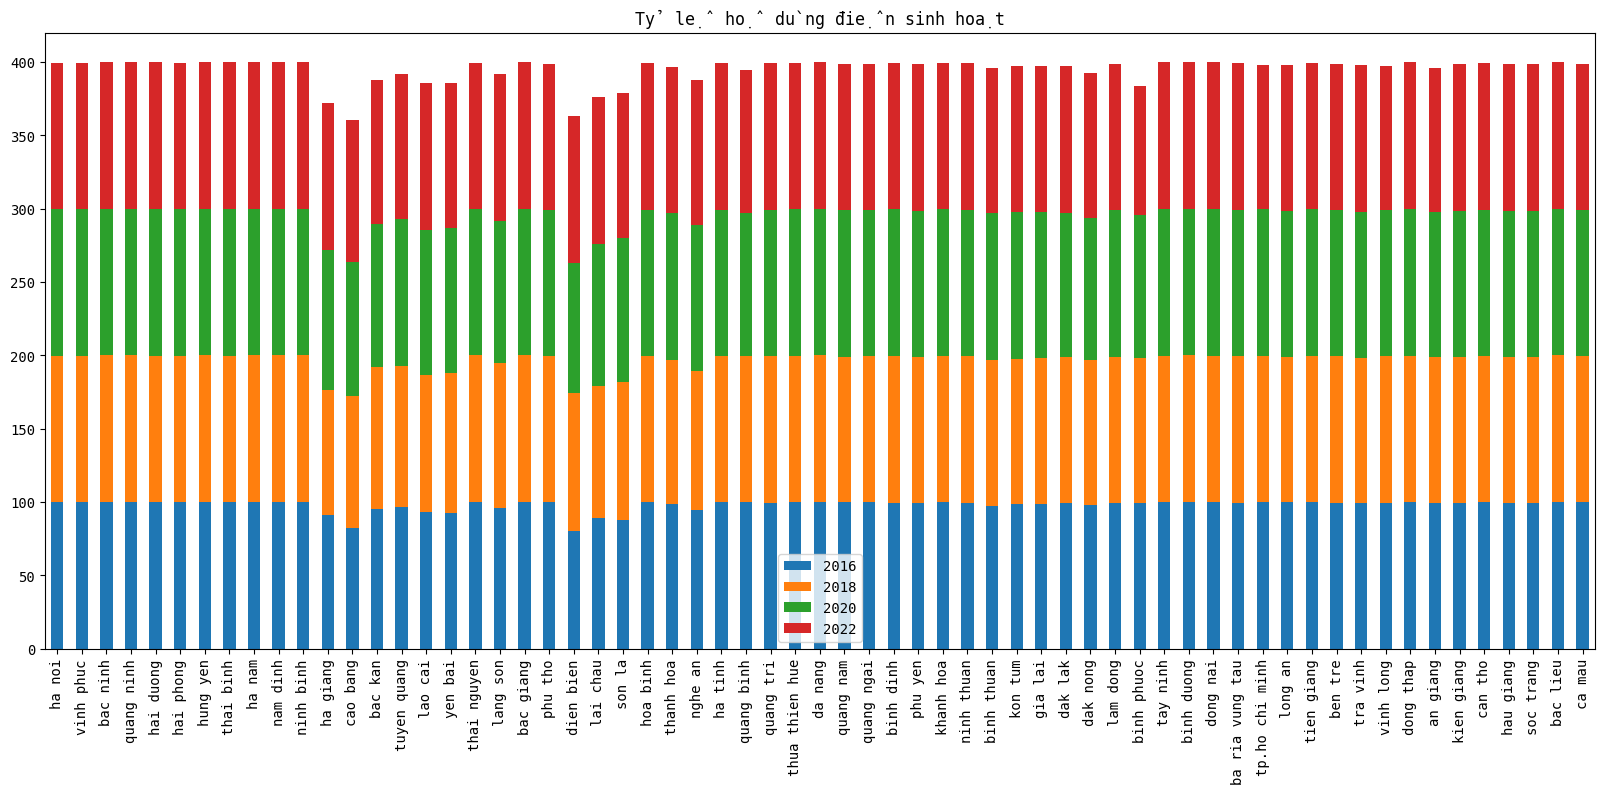

In [ ]:
stacked_bar_plot(dien[dien.Province.isin(province_name_preprocessed)], None, ['2016', '2018', '2020','2022'], title='Tỷ lệ hộ dùng điện sinh hoạt')


In [ ]:
describe_(dien, None, ['2016', '2018', '2020','2022'])

2016        2018        2020        2022
count   63.000000   63.000000   63.000000   63.000000
mean    98.047619   98.611111   99.120635   99.458730
std      4.026319    2.858215    1.926903    1.670391
min     80.500000   85.500000   88.700000   87.700000
25%     98.850000   99.250000   99.450000   99.400000
50%     99.700000   99.700000   99.800000  100.000000
75%     99.900000   99.950000  100.000000  100.000000
max    100.000000  100.000000  100.000000  100.000000

In [ ]:
province_with_max_value(dien, None, ['2016', '2018', '2020','2022'])

2016 vinh phuc Đồng bằng sông Hồng
2018 bac ninh Đồng bằng sông Hồng
2020 vinh phuc Đồng bằng sông Hồng
2022 ha noi Đồng bằng sông Hồng


In [ ]:
top_k_province_worst_sub_feature(dien, None, ['2016', '2018', '2020','2022'], topk=10)

2016:
dien bien, Trung du và miền núi phía Bắc: 80.5
cao bang, Trung du và miền núi phía Bắc: 82.2
son la, Trung du và miền núi phía Bắc: 88.0
lai chau, Trung du và miền núi phía Bắc: 89.1
ha giang, Trung du và miền núi phía Bắc: 90.8
yen bai, Trung du và miền núi phía Bắc: 92.8
lao cai, Trung du và miền núi phía Bắc: 93.4
nghe an, Bắc Trung Bộ và duyên hải miền Trung: 94.5
bac kan, Trung du và miền núi phía Bắc: 95.3
lang son, Trung du và miền núi phía Bắc: 96.0
------------------------------
2018:
ha giang, Trung du và miền núi phía Bắc: 85.5
lai chau, Trung du và miền núi phía Bắc: 89.8
cao bang, Trung du và miền núi phía Bắc: 89.9
lao cai, Trung du và miền núi phía Bắc: 93.2
son la, Trung du và miền núi phía Bắc: 93.6
dien bien, Trung du và miền núi phía Bắc: 94.0
nghe an, Bắc Trung Bộ và duyên hải miền Trung: 94.5
yen bai, Trung du và miền núi phía Bắc: 95.0
tuyen quang, Trung du và miền núi phía Bắc: 96.5
bac kan, Trung du và miền núi phía Bắc: 97.0
------------------------------

In [ ]:
top_k_province_best_sub_feature(dien, None, ['2016', '2018', '2020','2022'], topk=10)

2016:
da nang, Bắc Trung Bộ và duyên hải miền Trung: 100.0
thai binh, Đồng bằng sông Hồng: 100.0
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 100.0
vinh phuc, Đồng bằng sông Hồng: 100.0
tien giang, Đồng bằng sông Cửu Long: 100.0
ninh binh, Đồng bằng sông Hồng: 100.0
nam dinh, Đồng bằng sông Hồng: 100.0
ha nam, Đồng bằng sông Hồng: 100.0
hung yen, Đồng bằng sông Hồng: 100.0
bac lieu, Đồng bằng sông Cửu Long: 100.0
------------------------------
2018:
da nang, Bắc Trung Bộ và duyên hải miền Trung: 100.0
nam dinh, Đồng bằng sông Hồng: 100.0
bac giang, Trung du và miền núi phía Bắc: 100.0
binh dinh, Bắc Trung Bộ và duyên hải miền Trung: 100.0
thai nguyen, Trung du và miền núi phía Bắc: 100.0
tay ninh, Đông Nam Bộ: 100.0
binh duong, Đông Nam Bộ: 100.0
dong nai, Đông Nam Bộ: 100.0
ninh binh, Đồng bằng sông Hồng: 100.0
ha nam, Đồng bằng sông Hồng: 100.0
------------------------------
2020:
da nang, Bắc Trung Bộ và duyên hải miền Trung: 100.0
nam dinh, Đồng bằng sông Hồng: 100.0
thua 

##

### Tỷ lệ dân số đô thị được cung cấp nước sạch qua hệ thống cấp nước tập trung phân theo địa phương() chia theo Địa phương và Năm(khó)  

In [ ]:
do_thi_nuocsach = preprocess_df(clcc.copy(), features[4], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-63-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-63-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-63-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
do_thi_nuocsach

Main_Feature             Province  \
550  Tỷ lệ dân số đô thị được cung cấp...  dong bang song hong   
551  Tỷ lệ dân số đô thị được cung cấp...               ha noi   
552  Tỷ lệ dân số đô thị được cung cấp...            vinh phuc   
553  Tỷ lệ dân số đô thị được cung cấp...             bac ninh   
554  Tỷ lệ dân số đô thị được cung cấp...           quang ninh   
..                                                 ...                  ...   
614  Tỷ lệ dân số đô thị được cung cấp...              can tho   
615  Tỷ lệ dân số đô thị được cung cấp...            hau giang   
616  Tỷ lệ dân số đô thị được cung cấp...            soc trang   
617  Tỷ lệ dân số đô thị được cung cấp...             bac lieu   
618  Tỷ lệ dân số đô thị được cung cấp...               ca mau   

    Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015   2016  \
550         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  82.72   
551         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  80.00   
552         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  61.01   
553         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  80.00   
554         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  90.00   
..          ...   ...   ...   ...   ...   ...   ...   ...  ...   ...    ...   
614         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  70.18   
615         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  80.56   
616         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  79.97   
617         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  89.00   
618         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  79.85   

      2017   2018    2019    2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  
550  90.00  92.41   94.89   96.38   99.9         NaN   NaN       99.77  
551  88.00  96.00  100.00  100.00   99.9         NaN   NaN       99.95  
552  77.00  77.00   78.09   81.35   99.7         NaN   NaN       99.89  
553  86.47  86.69   87.52   90.45  100.0         NaN   NaN      100.00  
554  92.26  94.18   95.88   98.00   99.7         NaN   NaN       99.44  
..     ...    ...     ...     ...    ...         ...   ...         ...  
614  87.00  87.16   87.30   87.30   99.8         NaN   NaN       99.96  
615  80.56  80.56   95.00   95.00   94.9         NaN   NaN       99.26  
616  81.00  81.19   81.74   81.74   98.7         NaN   NaN       97.61  
617  90.00  90.07   90.55   96.76  100.0         NaN   NaN       99.78  
618  90.00  95.31   95.62   90.03   98.9         NaN   NaN       97.35  

[69 rows x 26 columns]

In [ ]:
do_thi_nuocsach.Province.nunique()

69

In [ ]:
clcc4 = do_thi_nuocsach[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()

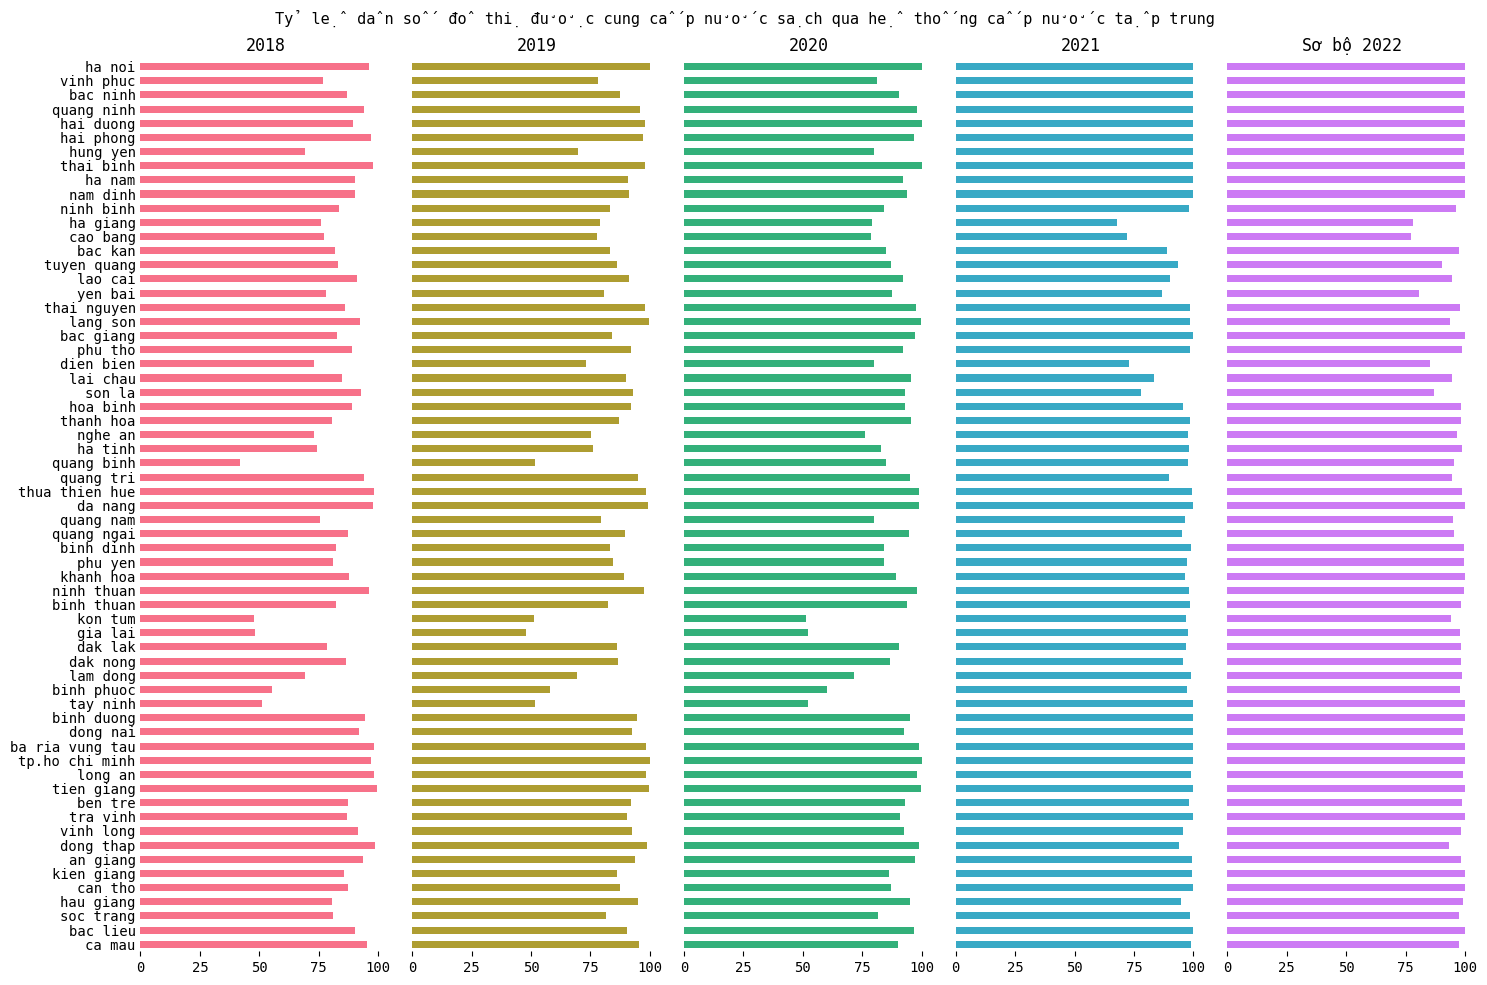

In [ ]:
pannel_bar_plot(do_thi_nuocsach[do_thi_nuocsach.Province.isin(province_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số đô thị được cung cấp nước sạch qua hệ thống cấp nước tập trung')


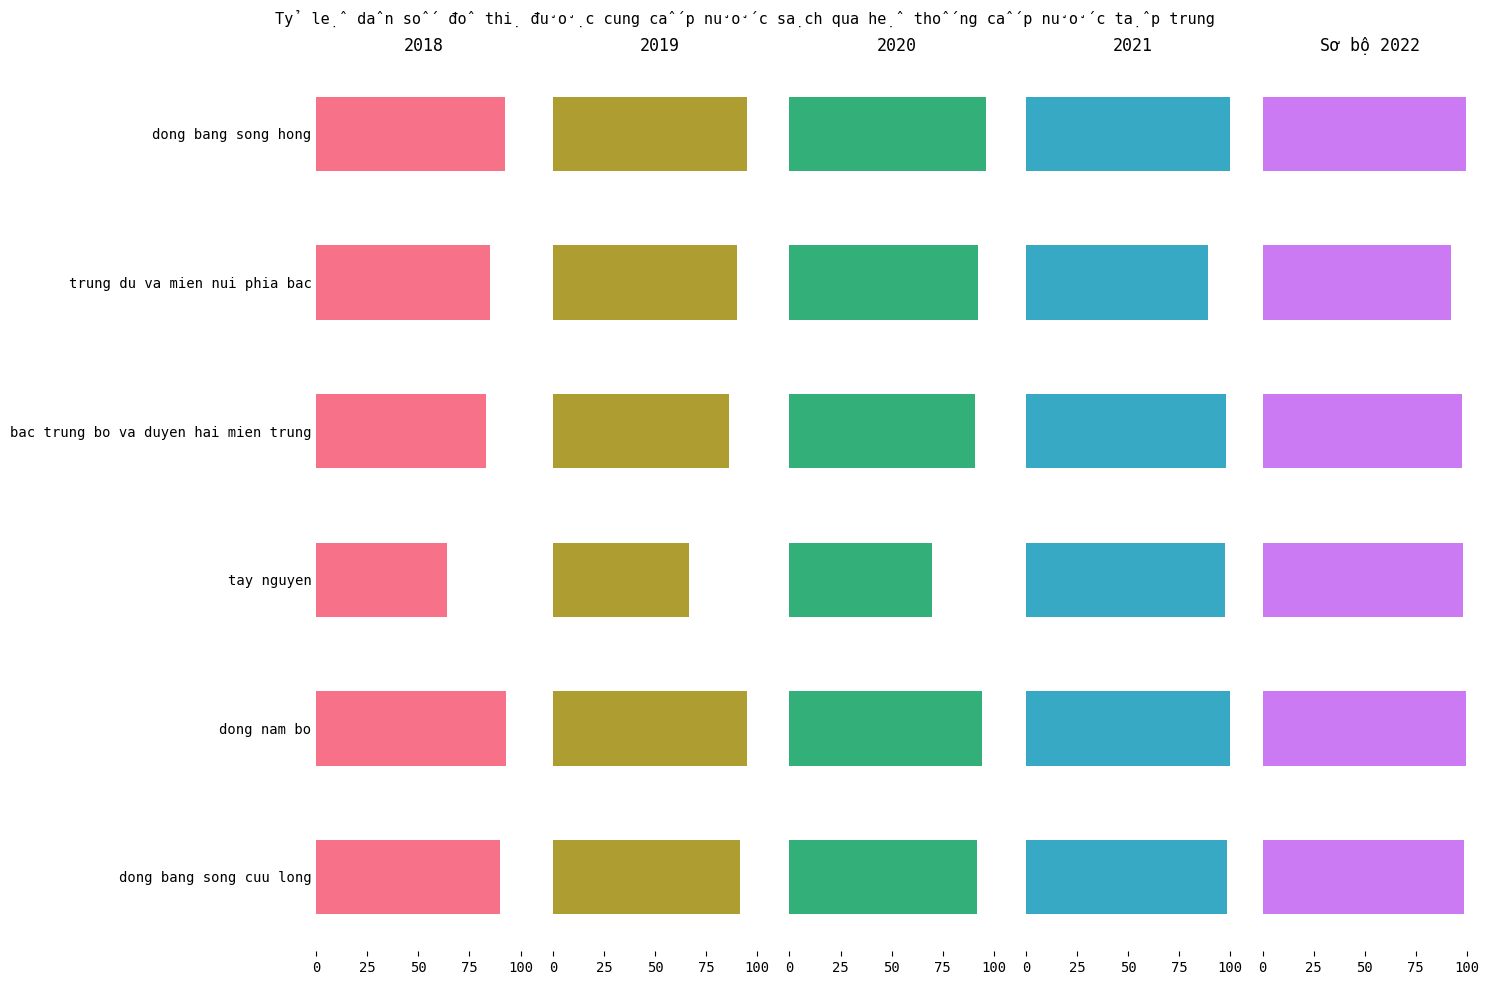

In [ ]:
pannel_bar_plot(do_thi_nuocsach[do_thi_nuocsach.Province.isin(vung_mien_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số đô thị được cung cấp nước sạch qua hệ thống cấp nước tập trung')


<Figure size 2000x1000 with 0 Axes>

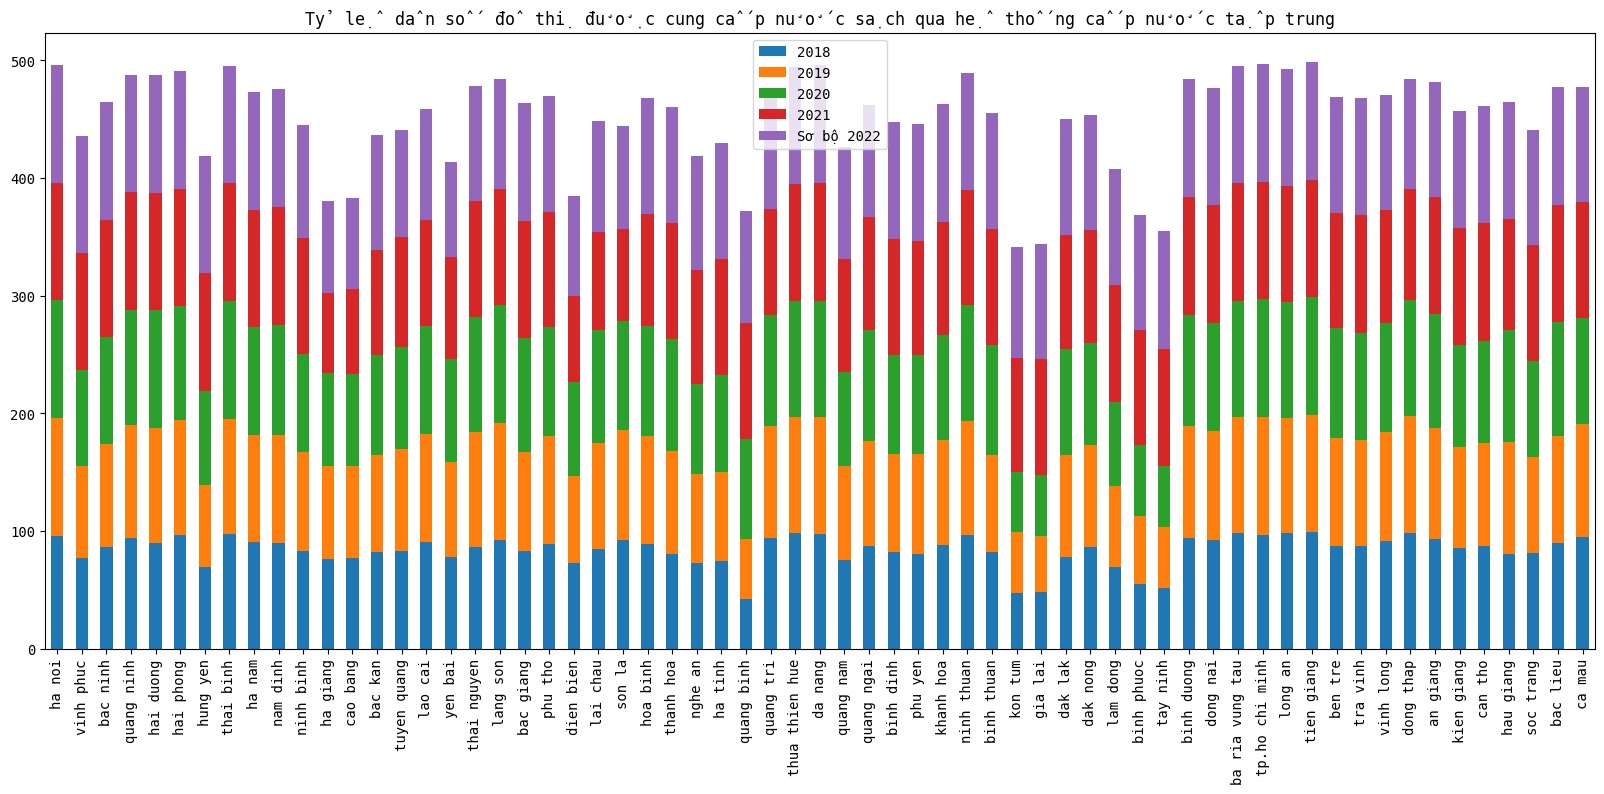

<Figure size 2000x1000 with 0 Axes>

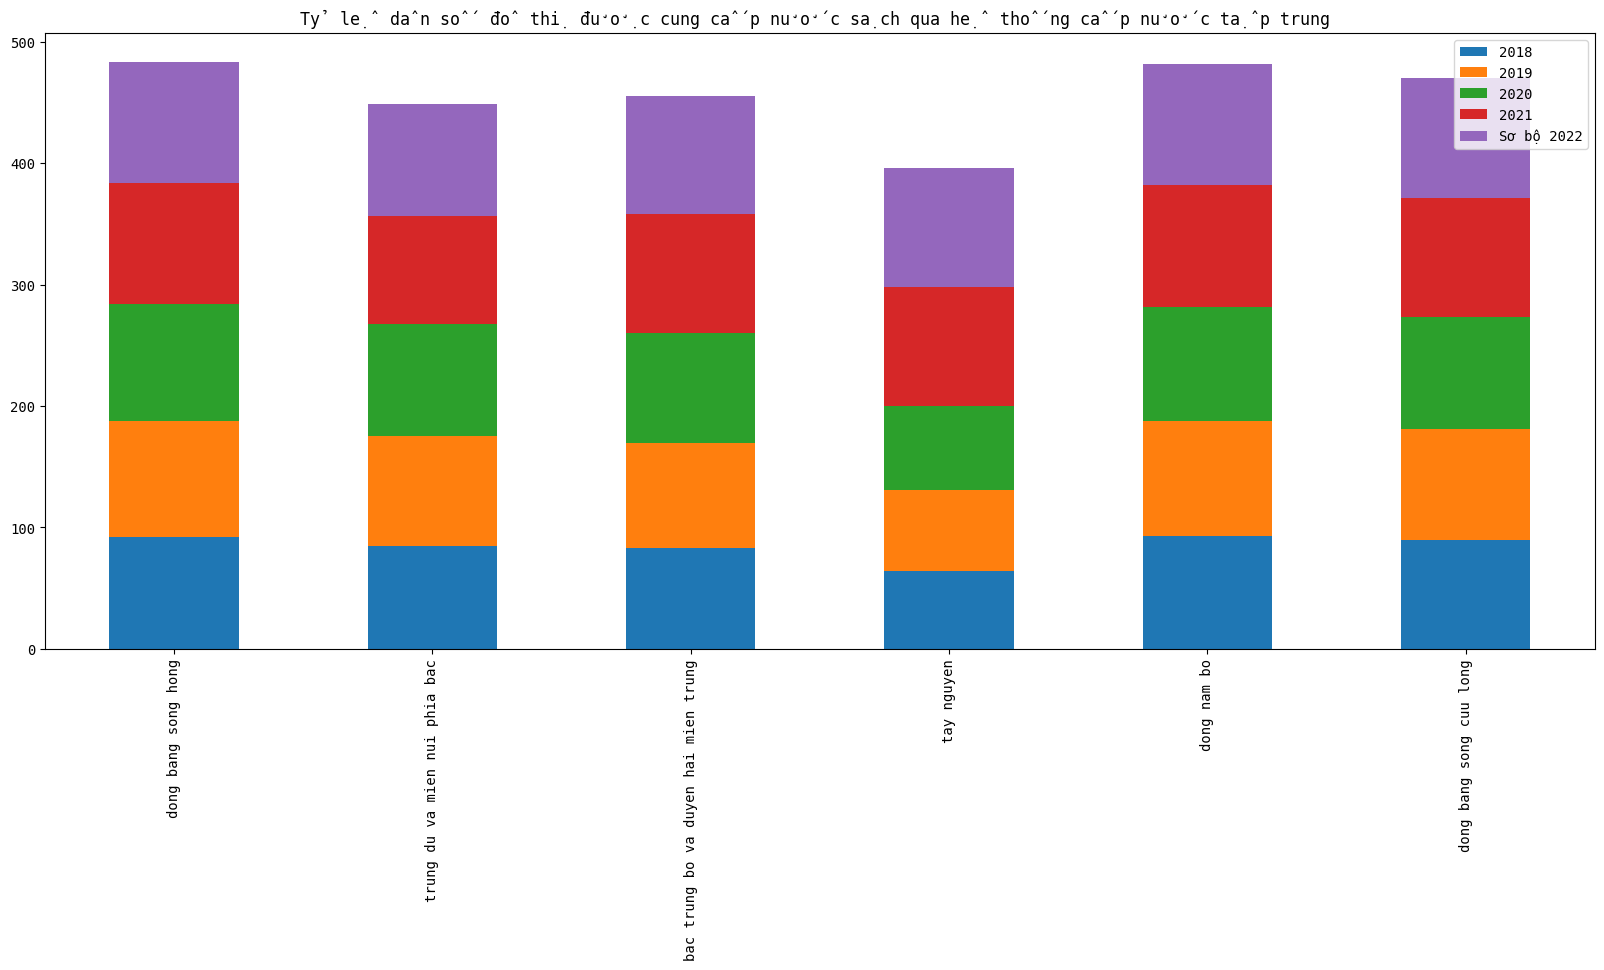

In [ ]:
stacked_bar_plot(do_thi_nuocsach[do_thi_nuocsach.Province.isin(province_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số đô thị được cung cấp nước sạch qua hệ thống cấp nước tập trung')
stacked_bar_plot(do_thi_nuocsach[do_thi_nuocsach.Province.isin(vung_mien_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số đô thị được cung cấp nước sạch qua hệ thống cấp nước tập trung ')

In [ ]:
describe_(do_thi_nuocsach, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018        2019        2020        2021  Sơ bộ 2022
count  69.000000   69.000000   69.000000   69.000000   69.000000
mean   84.072754   86.354058   88.752319   96.066667   96.957536
std    12.817665   12.543656   11.346123    6.801615    4.920811
min    41.940000   48.000000   51.360000   67.900000   77.290000
25%    80.380000   82.220000   84.360000   96.300000   96.770000
50%    86.860000   90.100000   92.100000   98.500000   98.610000
75%    92.650000   94.890000   96.760000   99.900000   99.880000
max    99.430000  100.000000  100.000000  100.000000  100.000000

In [ ]:
province_with_max_value(do_thi_nuocsach, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018 tien giang Đồng bằng sông Cửu Long
2019 ha noi Đồng bằng sông Hồng
2020 ha noi Đồng bằng sông Hồng
2021 bac ninh Đồng bằng sông Hồng
Sơ bộ 2022 bac ninh Đồng bằng sông Hồng


In [ ]:
top_k_province_worst_sub_feature(do_thi_nuocsach, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], topk=10)

2018:
quang binh, Bắc Trung Bộ và duyên hải miền Trung: 41.94
kon tum, Tây Nguyên: 47.72
gia lai, Tây Nguyên: 48.0
tay ninh, Đông Nam Bộ: 51.33
binh phuoc, Đông Nam Bộ: 55.19
tay nguyen, None: 64.05
lam dong, Tây Nguyên: 69.06
hung yen, Đồng bằng sông Hồng: 69.32
nghe an, Bắc Trung Bộ và duyên hải miền Trung: 73.14
dien bien, Trung du và miền núi phía Bắc: 73.19
------------------------------
2019:
gia lai, Tây Nguyên: 48.0
kon tum, Tây Nguyên: 51.36
quang binh, Bắc Trung Bộ và duyên hải miền Trung: 51.51
tay ninh, Đông Nam Bộ: 51.75
binh phuoc, Đông Nam Bộ: 57.84
tay nguyen, None: 66.64
lam dong, Tây Nguyên: 69.44
hung yen, Đồng bằng sông Hồng: 69.77
dien bien, Trung du và miền núi phía Bắc: 73.19
nghe an, Bắc Trung Bộ và duyên hải miền Trung: 75.38
------------------------------
2020:
kon tum, Tây Nguyên: 51.36
tay ninh, Đông Nam Bộ: 52.0
gia lai, Tây Nguyên: 52.0
binh phuoc, Đông Nam Bộ: 60.0
tay nguyen, None: 69.7
lam dong, Tây Nguyên: 71.34
nghe an, Bắc Trung Bộ và duyên hải miền 

In [ ]:
top_k_province_best_sub_feature(do_thi_nuocsach, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], topk=10)

2018:
tien giang, Đồng bằng sông Cửu Long: 99.43
dong thap, Đồng bằng sông Cửu Long: 98.62
ba ria vung tau, Đông Nam Bộ: 98.31
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 98.21
long an, Đồng bằng sông Cửu Long: 98.2
da nang, Bắc Trung Bộ và duyên hải miền Trung: 97.83
thai binh, Đồng bằng sông Hồng: 97.74
hai phong, Đồng bằng sông Hồng: 97.0
tp.ho chi minh, Đông Nam Bộ: 96.84
ninh thuan, Bắc Trung Bộ và duyên hải miền Trung: 96.3
------------------------------
2019:
tp.ho chi minh, Đông Nam Bộ: 100.0
ha noi, Đồng bằng sông Hồng: 100.0
lang son, Trung du và miền núi phía Bắc: 99.71
tien giang, Đồng bằng sông Cửu Long: 99.46
da nang, Bắc Trung Bộ và duyên hải miền Trung: 99.0
dong thap, Đồng bằng sông Cửu Long: 98.81
thua thien hue, Bắc Trung Bộ và duyên hải miền Trung: 98.34
ba ria vung tau, Đông Nam Bộ: 98.31
long an, Đồng bằng sông Cửu Long: 98.2
hai duong, Đồng bằng sông Hồng: 97.78
------------------------------
2020:
hai duong, Đồng bằng sông Hồng: 100.0
ha noi, Đồng bằng

##

### Tỷ lệ dân số dùng hố xí hợp vệ sinhphân theo địa phương chia theo Địa phương và Năm

In [ ]:
nhavs = preprocess_df(clcc.copy(), features[5], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-63-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-63-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-63-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
nhavs

Main_Feature             Province  \
620  Tỷ lệ dân số dùng hố xí hợp vệ s...  dong bang song hong   
621  Tỷ lệ dân số dùng hố xí hợp vệ s...               ha noi   
622  Tỷ lệ dân số dùng hố xí hợp vệ s...            vinh phuc   
623  Tỷ lệ dân số dùng hố xí hợp vệ s...             bac ninh   
624  Tỷ lệ dân số dùng hố xí hợp vệ s...           quang ninh   
..                                                 ...                  ...   
684  Tỷ lệ dân số dùng hố xí hợp vệ s...              can tho   
685  Tỷ lệ dân số dùng hố xí hợp vệ s...            hau giang   
686  Tỷ lệ dân số dùng hố xí hợp vệ s...            soc trang   
687  Tỷ lệ dân số dùng hố xí hợp vệ s...             bac lieu   
688  Tỷ lệ dân số dùng hố xí hợp vệ s...               ca mau   

    Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  \
620         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
621         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
622         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
623         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
624         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
..          ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
684         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
685         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
686         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
687         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
688         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   

     2017   2018  2019   2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  
620   NaN   99.6  99.9   99.9   99.7         NaN   NaN        99.8  
621   NaN  100.0  99.9  100.0  100.0         NaN   NaN       100.0  
622   NaN   99.2  99.7   99.9  100.0         NaN   NaN       100.0  
623   NaN  100.0  99.9  100.0  100.0         NaN   NaN       100.0  
624   NaN   99.6  99.3   98.9   97.3         NaN   NaN        96.8  
..    ...    ...   ...    ...    ...         ...   ...         ...  
684   NaN   90.5  60.1   94.2   96.3         NaN   NaN        97.0  
685   NaN   62.9  70.6   68.8   71.2         NaN   NaN        79.7  
686   NaN   67.4  83.2   68.3   81.5         NaN   NaN        79.2  
687   NaN   74.2  82.7   90.3   92.5         NaN   NaN        88.2  
688   NaN   78.0  91.1   81.3   88.3         NaN   NaN        90.1  

[69 rows x 26 columns]

In [ ]:
nhavs.Province.nunique()

69

In [ ]:
clcc1 = nuoc_vs[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
clcc2 = dien[['2016', '2018', '2020','2022']].mean(axis=1).tolist()
clcc4 = do_thi_nuocsach[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
clcc5 = nhavs[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()

In [ ]:
clcc5 = nhavs[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()

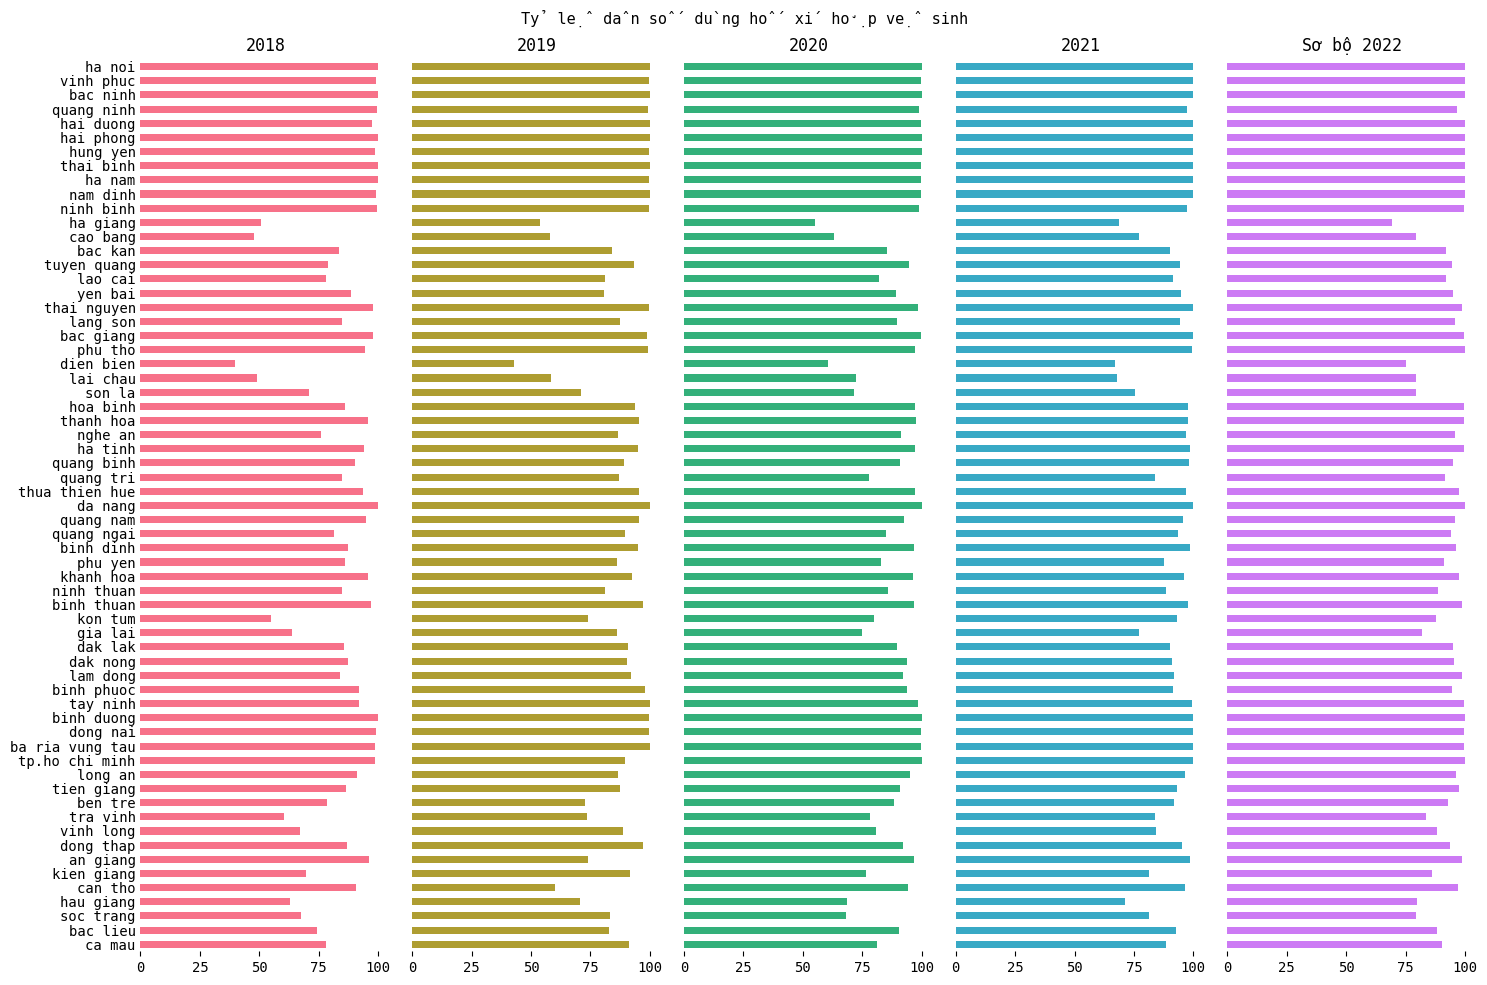

In [ ]:
pannel_bar_plot(nhavs[nhavs.Province.isin(province_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số dùng hố xí hợp vệ sinh')


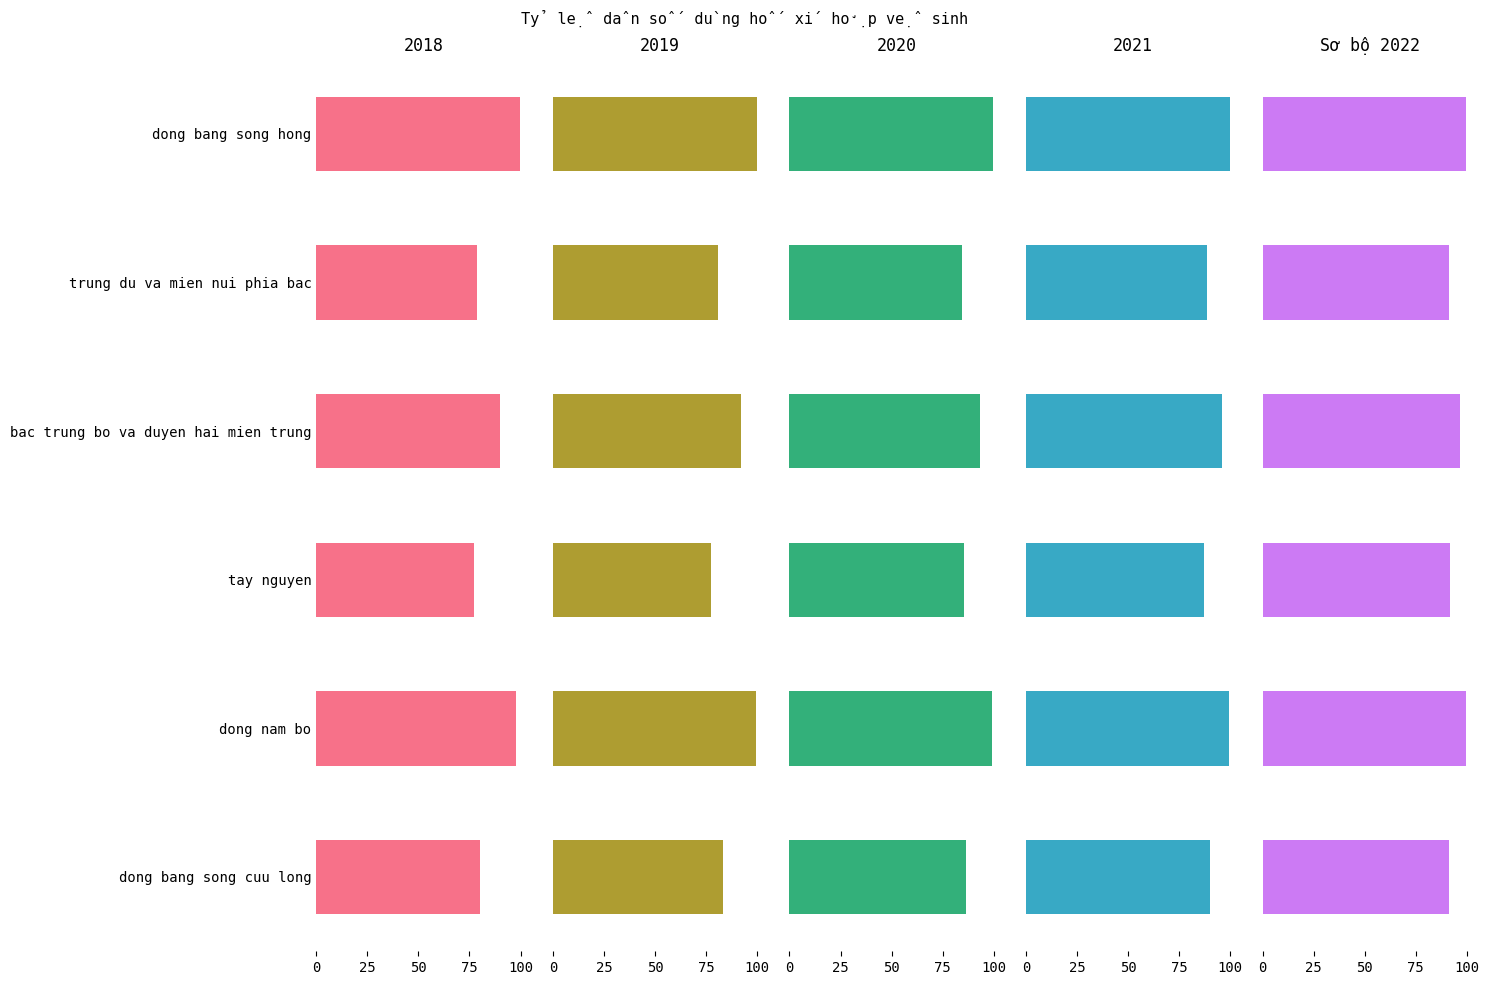

In [ ]:
pannel_bar_plot(nhavs[nhavs.Province.isin(vung_mien_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số dùng hố xí hợp vệ sinh')


<Figure size 2000x1000 with 0 Axes>

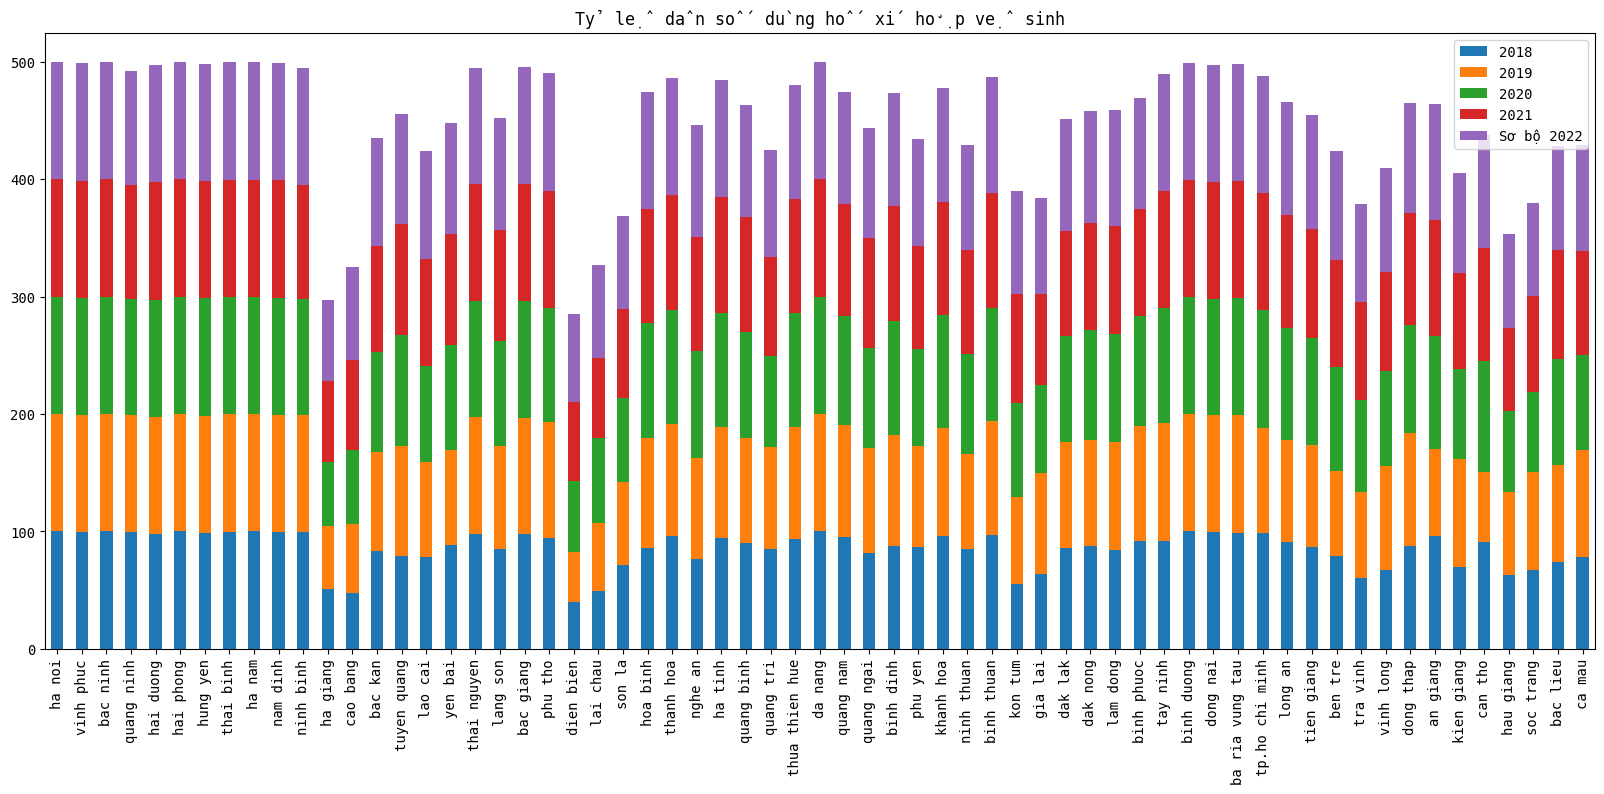

<Figure size 2000x1000 with 0 Axes>

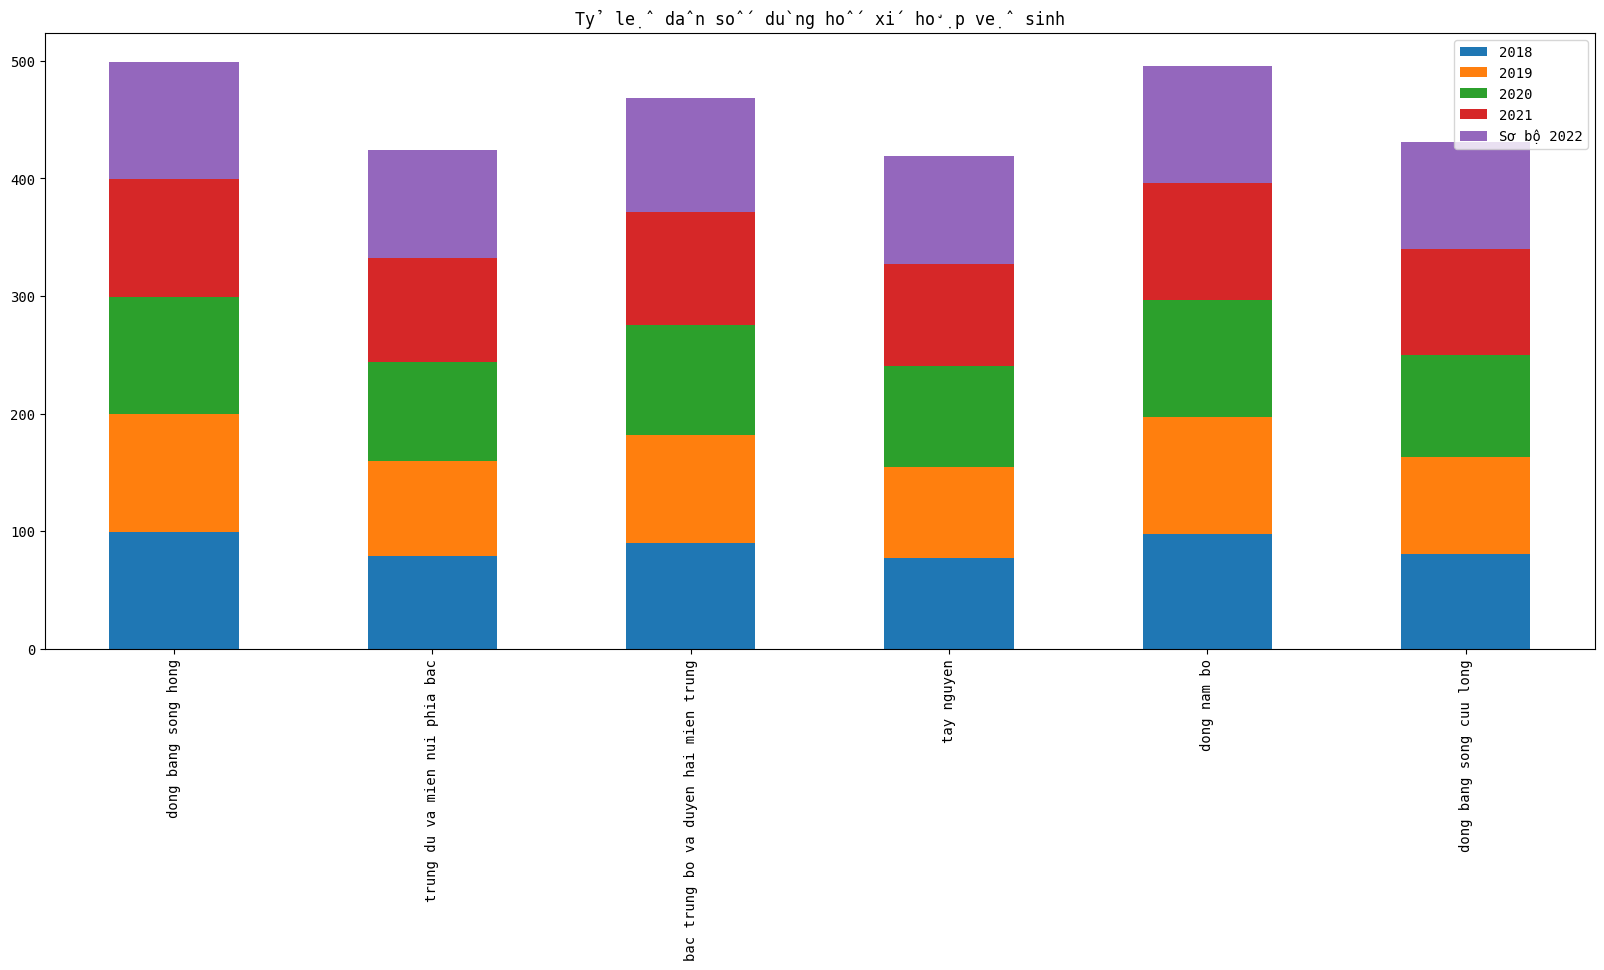

In [ ]:
stacked_bar_plot(nhavs[nhavs.Province.isin(province_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số dùng hố xí hợp vệ sinh')
stacked_bar_plot(nhavs[nhavs.Province.isin(vung_mien_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số dùng hố xí hợp vệ sinh')


In [ ]:
describe_(nhavs, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018        2019        2020        2021  Sơ bộ 2022
count   69.000000   69.000000   69.000000   69.000000   69.000000
mean    85.401449   88.373913   90.075362   92.628986   93.862319
std     14.872107   12.813948   10.921800    8.671999    7.170468
min     39.700000   42.800000   55.000000   66.900000   69.100000
25%     78.500000   83.200000   85.200000   90.000000   91.300000
50%     88.700000   91.800000   93.700000   96.200000   96.000000
75%     97.900000   99.300000   99.000000   99.600000   99.500000
max    100.000000  100.000000  100.000000  100.000000  100.000000

In [ ]:
province_with_max_value(nhavs, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018 ha noi Đồng bằng sông Hồng
2019 hai duong Đồng bằng sông Hồng
2020 ha noi Đồng bằng sông Hồng
2021 ha noi Đồng bằng sông Hồng
Sơ bộ 2022 ha noi Đồng bằng sông Hồng


In [ ]:
top_k_province_worst_sub_feature(nhavs, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], topk=10)

2018:
dien bien, Trung du và miền núi phía Bắc: 39.7
cao bang, Trung du và miền núi phía Bắc: 47.7
lai chau, Trung du và miền núi phía Bắc: 48.9
ha giang, Trung du và miền núi phía Bắc: 50.6
kon tum, Tây Nguyên: 55.1
tra vinh, Đồng bằng sông Cửu Long: 60.2
hau giang, Đồng bằng sông Cửu Long: 62.9
gia lai, Tây Nguyên: 63.7
vinh long, Đồng bằng sông Cửu Long: 67.1
soc trang, Đồng bằng sông Cửu Long: 67.4
------------------------------
2019:
dien bien, Trung du và miền núi phía Bắc: 42.8
ha giang, Trung du và miền núi phía Bắc: 53.8
cao bang, Trung du và miền núi phía Bắc: 58.1
lai chau, Trung du và miền núi phía Bắc: 58.3
can tho, Đồng bằng sông Cửu Long: 60.1
hau giang, Đồng bằng sông Cửu Long: 70.6
son la, Trung du và miền núi phía Bắc: 71.2
ben tre, Đồng bằng sông Cửu Long: 72.7
tra vinh, Đồng bằng sông Cửu Long: 73.4
an giang, Đồng bằng sông Cửu Long: 74.0
------------------------------
2020:
ha giang, Trung du và miền núi phía Bắc: 55.0
dien bien, Trung du và miền núi phía Bắc: 60.4

In [ ]:
top_k_province_best_sub_feature(nhavs, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], topk=10)

2018:
binh duong, Đông Nam Bộ: 100.0
bac ninh, Đồng bằng sông Hồng: 100.0
ha noi, Đồng bằng sông Hồng: 100.0
hai phong, Đồng bằng sông Hồng: 100.0
da nang, Bắc Trung Bộ và duyên hải miền Trung: 99.9
ha nam, Đồng bằng sông Hồng: 99.9
thai binh, Đồng bằng sông Hồng: 99.8
dong bang song hong, None: 99.6
quang ninh, Đồng bằng sông Hồng: 99.6
ninh binh, Đồng bằng sông Hồng: 99.4
------------------------------
2019:
da nang, Bắc Trung Bộ và duyên hải miền Trung: 100.0
thai binh, Đồng bằng sông Hồng: 100.0
ba ria vung tau, Đông Nam Bộ: 100.0
tay ninh, Đông Nam Bộ: 100.0
hai duong, Đồng bằng sông Hồng: 100.0
nam dinh, Đồng bằng sông Hồng: 100.0
ha noi, Đồng bằng sông Hồng: 99.9
dong bang song hong, None: 99.9
bac ninh, Đồng bằng sông Hồng: 99.9
hai phong, Đồng bằng sông Hồng: 99.9
------------------------------
2020:
da nang, Bắc Trung Bộ và duyên hải miền Trung: 100.0
tp.ho chi minh, Đông Nam Bộ: 100.0
bac ninh, Đồng bằng sông Hồng: 100.0
binh duong, Đông Nam Bộ: 100.0
ha noi, Đồng bằng sông 

##

###  Tỷ lệ dân số từ 15 tuổi trở lên biết chữ phân theo địa phương chia theo Địa phương và Năm  

In [ ]:
tren15_gd = preprocess_df(clcc.copy(), features[6], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-63-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-63-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-63-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
tren15_gd

Main_Feature             Province  \
690  Tỷ lệ dân số từ 15 tuổi trở lên b...  dong bang song hong   
691  Tỷ lệ dân số từ 15 tuổi trở lên b...               ha noi   
693  Tỷ lệ dân số từ 15 tuổi trở lên b...            vinh phuc   
694  Tỷ lệ dân số từ 15 tuổi trở lên b...             bac ninh   
695  Tỷ lệ dân số từ 15 tuổi trở lên b...           quang ninh   
..                                                 ...                  ...   
755  Tỷ lệ dân số từ 15 tuổi trở lên b...              can tho   
756  Tỷ lệ dân số từ 15 tuổi trở lên b...            hau giang   
757  Tỷ lệ dân số từ 15 tuổi trở lên b...            soc trang   
758  Tỷ lệ dân số từ 15 tuổi trở lên b...             bac lieu   
759  Tỷ lệ dân số từ 15 tuổi trở lên b...               ca mau   

    Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  \
690         NaN   NaN   NaN   NaN   NaN  96.8   NaN   NaN  ...  98.2  98.3   
691         NaN   NaN   NaN   NaN   NaN  98.3   NaN   NaN  ...  98.5  98.7   
693         NaN   NaN   NaN   NaN   NaN  96.9   NaN   NaN  ...  97.8  98.2   
694         NaN   NaN   NaN   NaN   NaN  96.5   NaN   NaN  ...  97.5  97.5   
695         NaN   NaN   NaN   NaN   NaN  96.3   NaN   NaN  ...  96.8  97.4   
..          ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
755         NaN   NaN   NaN   NaN   NaN  94.0   NaN   NaN  ...  94.2  94.2   
756         NaN   NaN   NaN   NaN   NaN  90.8   NaN   NaN  ...  94.3  94.5   
757         NaN   NaN   NaN   NaN   NaN  86.6   NaN   NaN  ...  88.5  87.7   
758         NaN   NaN   NaN   NaN   NaN  94.2   NaN   NaN  ...  94.1  93.6   
759         NaN   NaN   NaN   NaN   NaN  96.1   NaN   NaN  ...  95.6  95.3   

     2017  2018  2019   2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  
690  98.3  98.2  98.9  98.50  98.65         NaN   NaN       98.89  
691  98.7  98.8  99.2  98.90  98.94         NaN   NaN       99.39  
693  97.7  97.4  98.7  98.30  98.66         NaN   NaN       99.16  
694  97.7  97.7  98.8  98.46  98.35         NaN   NaN       98.16  
695  97.1  96.8  97.0  97.06  97.15         NaN   NaN       96.63  
..    ...   ...   ...    ...    ...         ...   ...         ...  
755  95.4  93.9  96.5  95.40  95.87         NaN   NaN       96.82  
756  94.9  94.0  94.4  95.22  94.83         NaN   NaN       94.99  
757  89.9  89.8  89.3  90.08  90.22         NaN   NaN       91.48  
758  94.5  93.7  95.1  94.59  94.48         NaN   NaN       93.58  
759  95.8  96.4  96.6  96.24  96.07         NaN   NaN       97.20  

[69 rows x 26 columns]

In [ ]:
tren15_gd.Province.nunique()

69

In [ ]:
clcc1 = nuoc_vs[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
clcc2 = dien[['2016', '2018', '2020','2022']].mean(axis=1).tolist()
clcc4 = do_thi_nuocsach[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
clcc5 = nhavs[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
clcc3 = tren15_gd[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()

In [ ]:
clcc3 = tren15_gd[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()

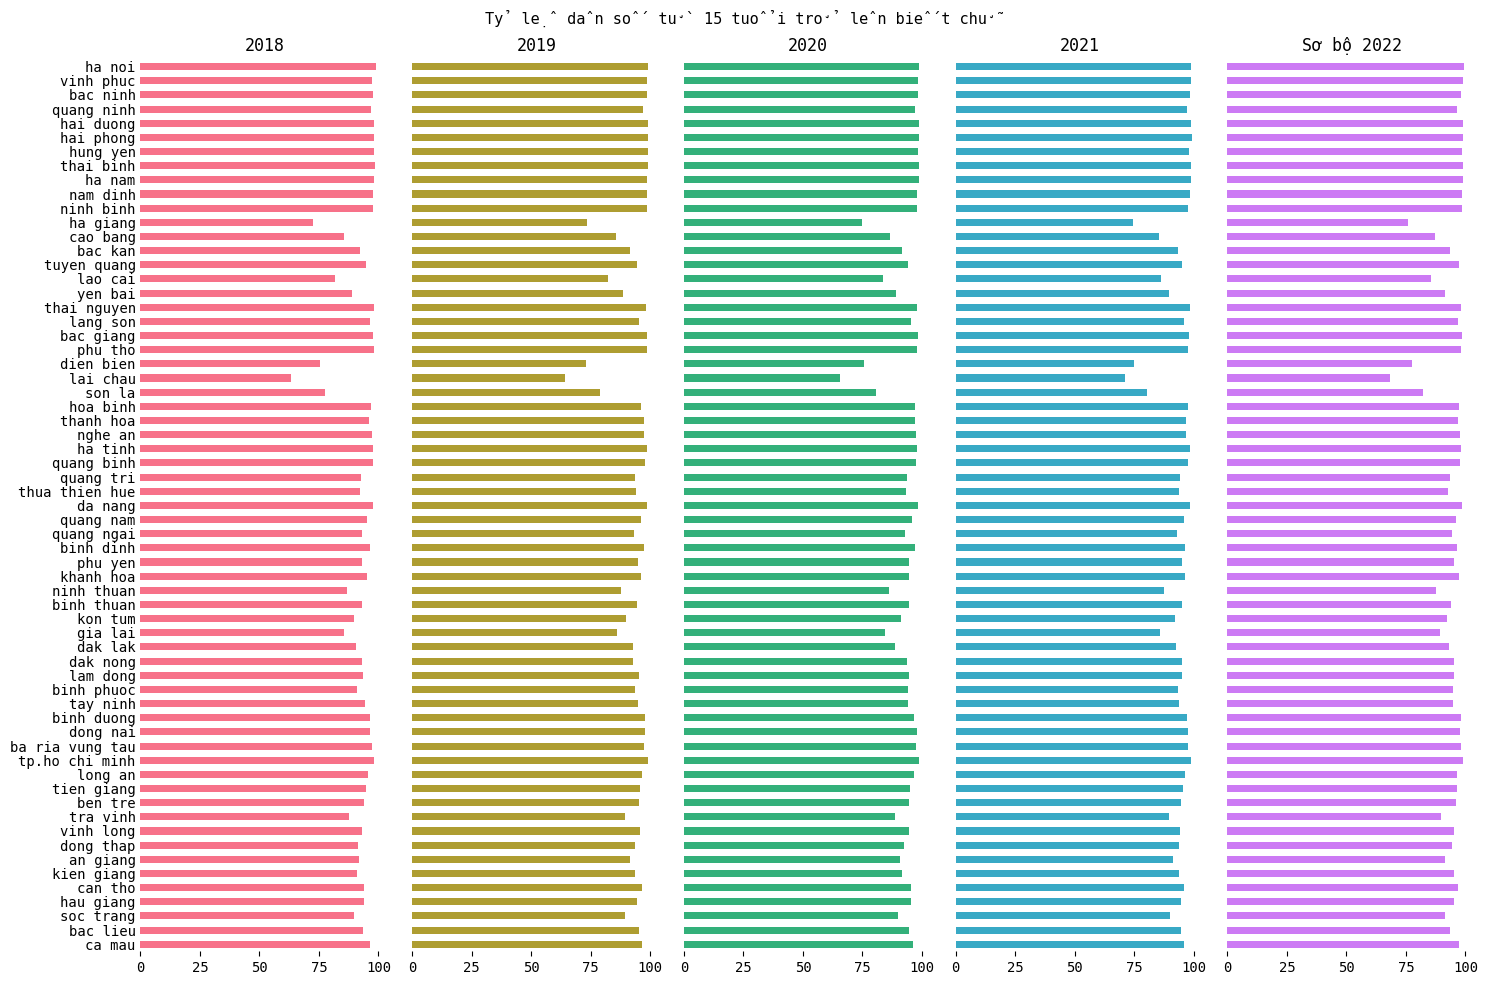

In [ ]:
pannel_bar_plot(tren15_gd[tren15_gd.Province.isin(province_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số từ 15 tuổi trở lên biết chữ')


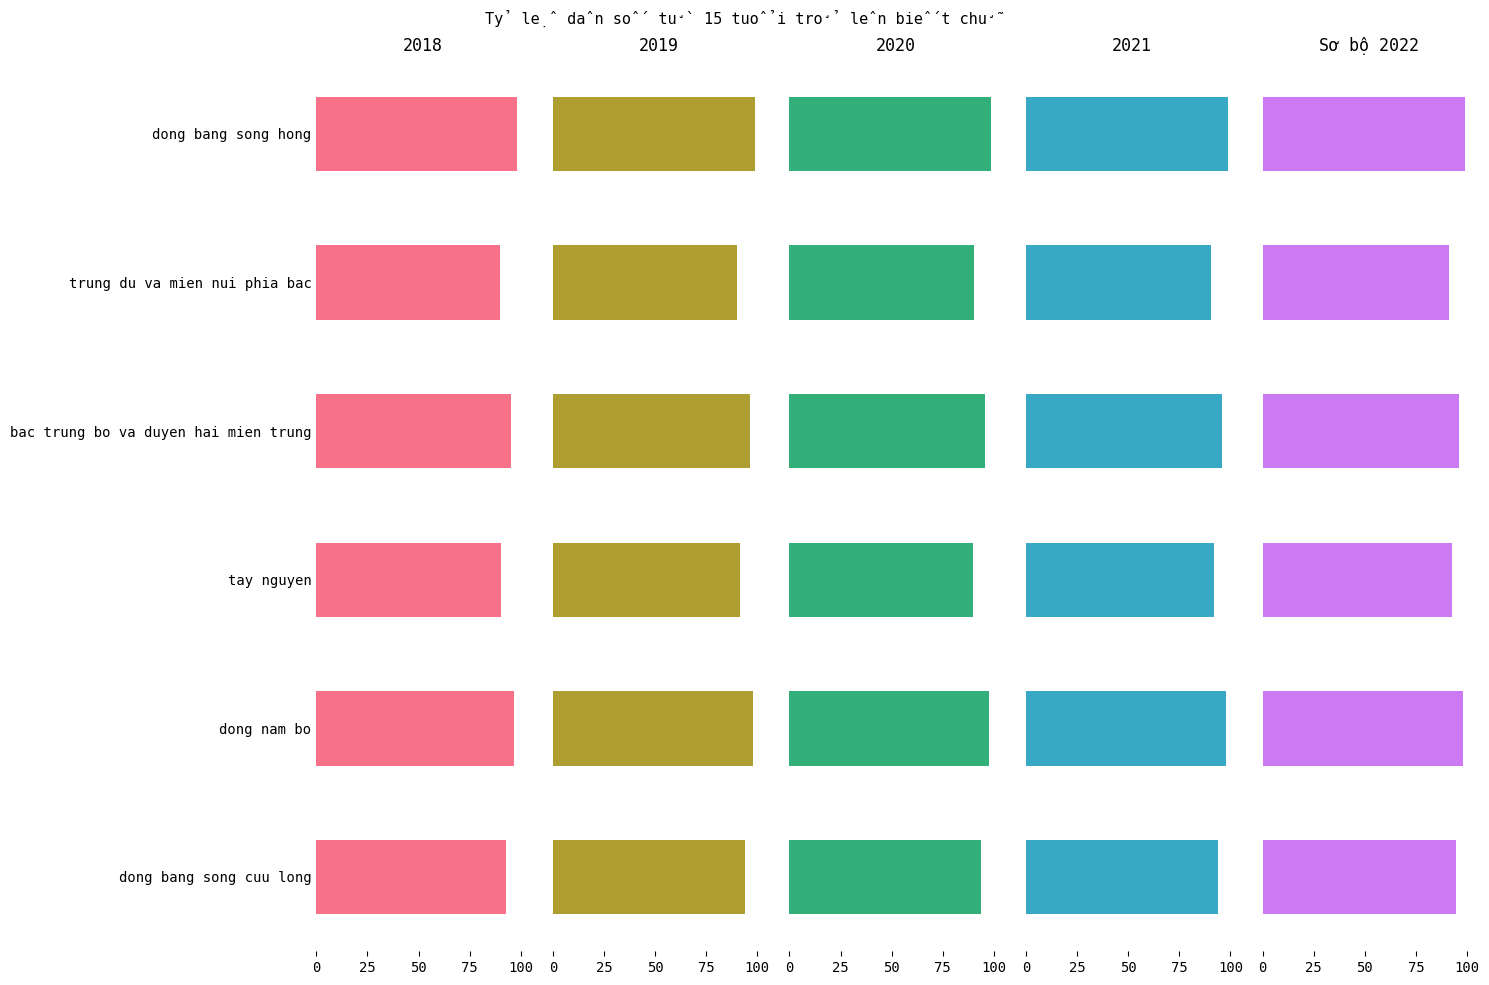

In [ ]:
pannel_bar_plot(tren15_gd[tren15_gd.Province.isin(vung_mien_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số từ 15 tuổi trở lên biết chữ')


<Figure size 2000x1000 with 0 Axes>

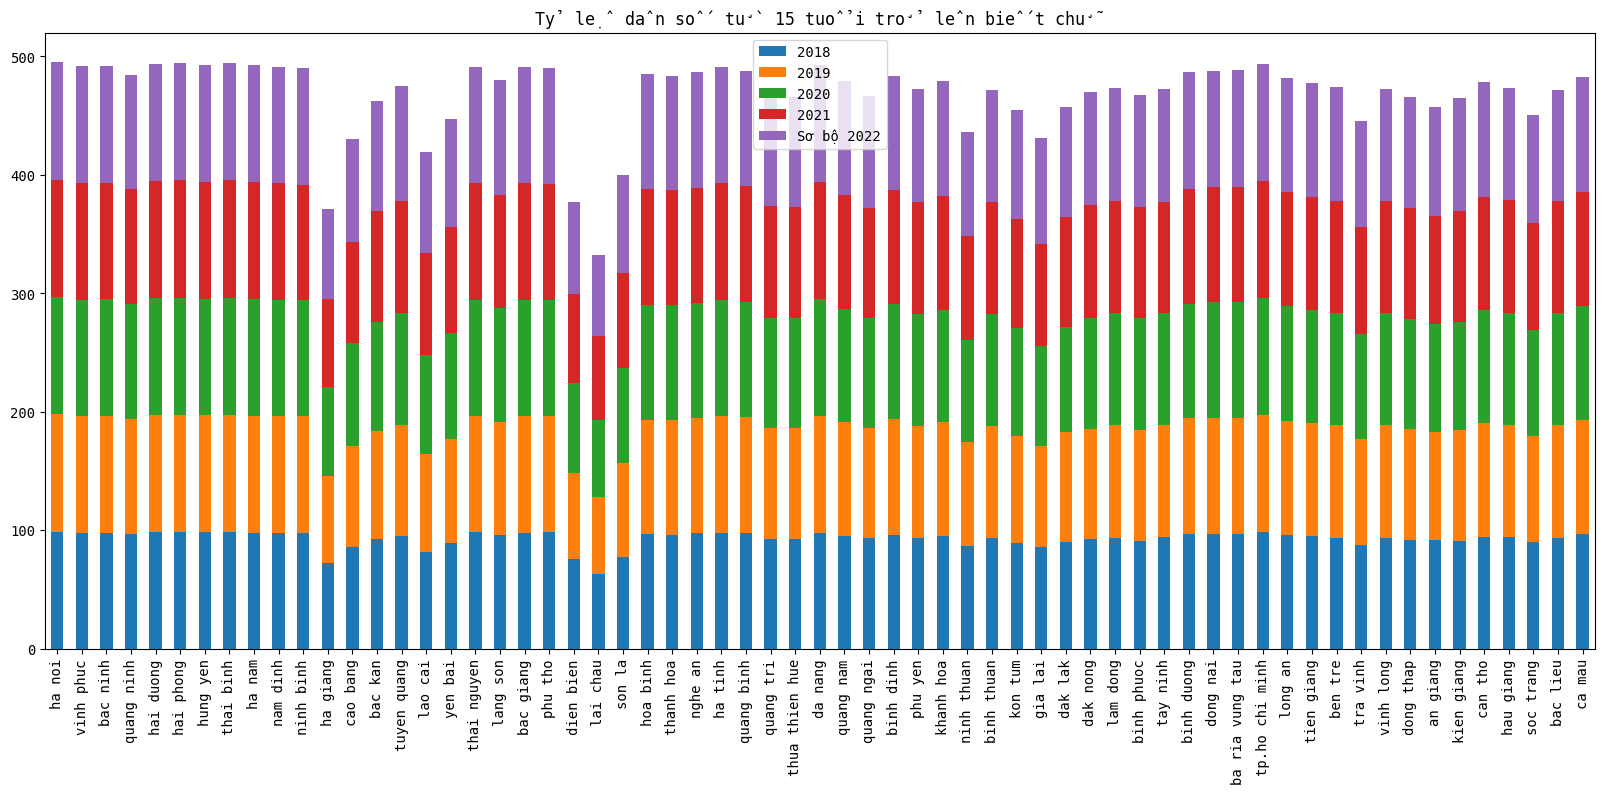

<Figure size 2000x1000 with 0 Axes>

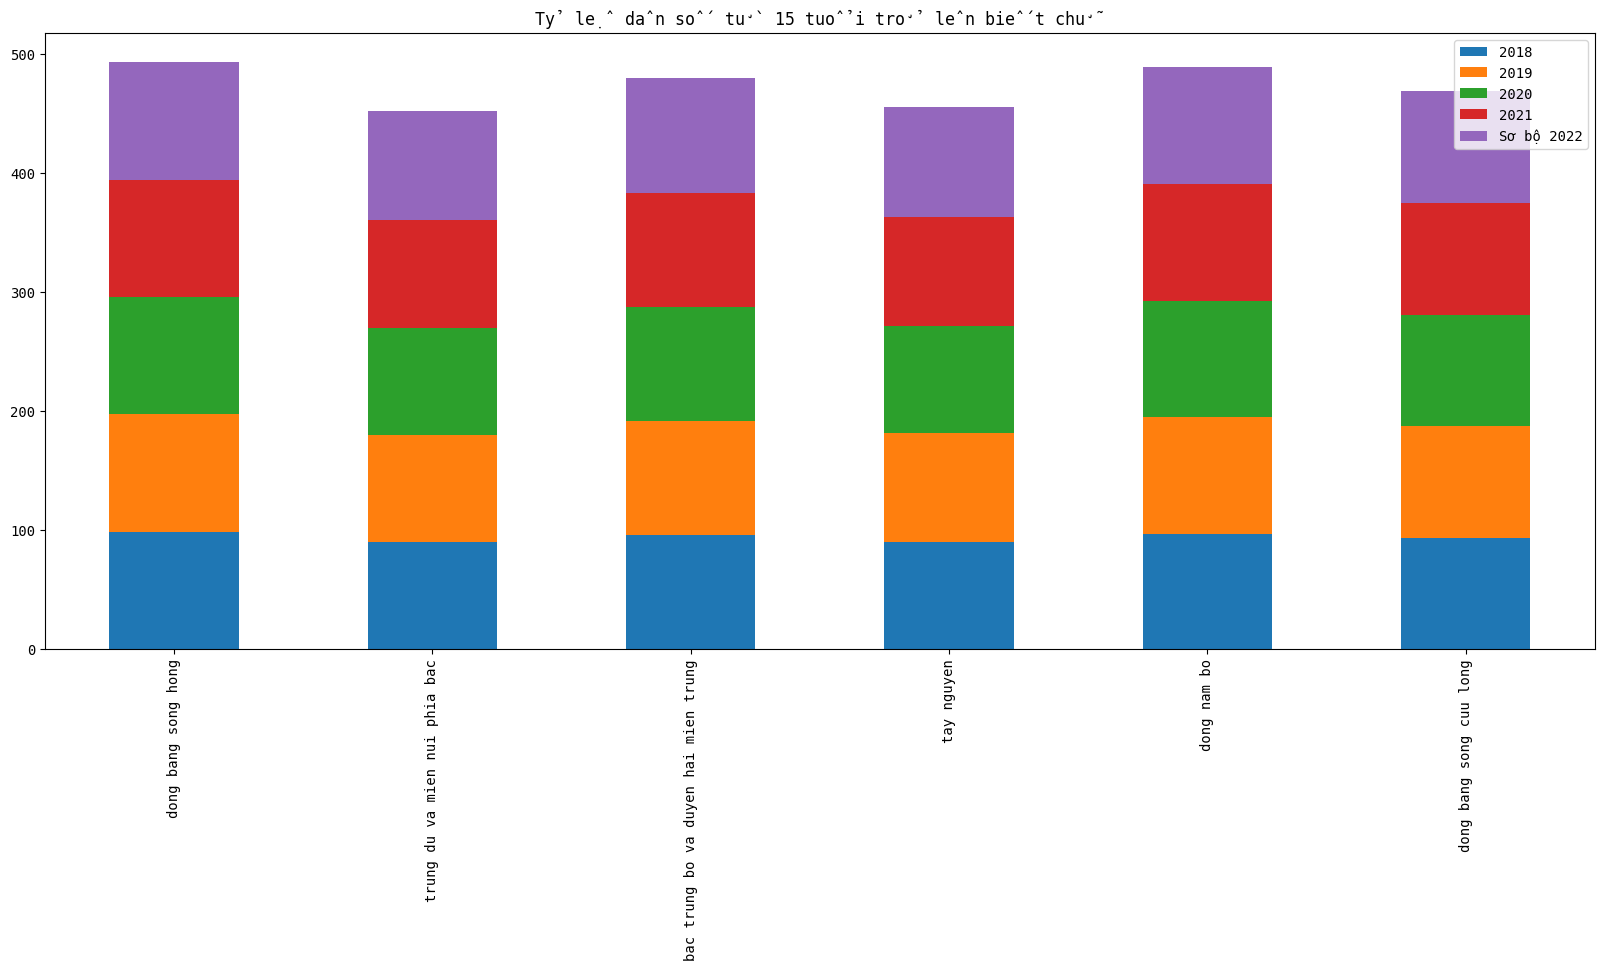

In [ ]:
stacked_bar_plot(tren15_gd[tren15_gd.Province.isin(province_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số từ 15 tuổi trở lên biết chữ')
stacked_bar_plot(tren15_gd[tren15_gd.Province.isin(vung_mien_name_preprocessed)], None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], title='Tỷ lệ dân số từ 15 tuổi trở lên biết chữ')

In [ ]:
describe_(tren15_gd, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018       2019       2020       2021  Sơ bộ 2022
count  69.000000  69.000000  69.000000  69.000000   69.000000
mean   92.986957  93.794203  93.528696  94.004203   94.462319
std     6.495290   6.595272   6.213015   5.788705    5.693620
min    63.300000  64.400000  65.520000  70.990000   68.470000
25%    91.600000  92.700000  91.630000  93.440000   93.310000
50%    94.700000  95.800000  95.080000  95.550000   96.180000
75%    97.400000  98.100000  97.850000  97.730000   98.220000
max    98.800000  99.200000  98.900000  99.190000   99.390000

In [ ]:
province_with_max_value(tren15_gd, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'])

2018 ha noi Đồng bằng sông Hồng
2019 ha noi Đồng bằng sông Hồng
2020 ha noi Đồng bằng sông Hồng
2021 hai phong Đồng bằng sông Hồng
Sơ bộ 2022 ha noi Đồng bằng sông Hồng


In [ ]:
top_k_province_worst_sub_feature(tren15_gd, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], topk=10)

2018:
lai chau, Trung du và miền núi phía Bắc: 63.3
ha giang, Trung du và miền núi phía Bắc: 72.4
dien bien, Trung du và miền núi phía Bắc: 75.4
son la, Trung du và miền núi phía Bắc: 77.5
lao cai, Trung du và miền núi phía Bắc: 81.9
gia lai, Tây Nguyên: 85.4
cao bang, Trung du và miền núi phía Bắc: 85.6
ninh thuan, Bắc Trung Bộ và duyên hải miền Trung: 86.8
tra vinh, Đồng bằng sông Cửu Long: 87.8
yen bai, Trung du và miền núi phía Bắc: 88.8
------------------------------
2019:
lai chau, Trung du và miền núi phía Bắc: 64.4
dien bien, Trung du và miền núi phía Bắc: 73.1
ha giang, Trung du và miền núi phía Bắc: 73.5
son la, Trung du và miền núi phía Bắc: 78.9
lao cai, Trung du và miền núi phía Bắc: 82.1
cao bang, Trung du và miền núi phía Bắc: 85.7
gia lai, Tây Nguyên: 85.9
ninh thuan, Bắc Trung Bộ và duyên hải miền Trung: 87.9
yen bai, Trung du và miền núi phía Bắc: 88.5
soc trang, Đồng bằng sông Cửu Long: 89.3
------------------------------
2020:
lai chau, Trung du và miền núi phía Bắc

In [ ]:
top_k_province_best_sub_feature(tren15_gd, None, ['2018', '2019', '2020', '2021','Sơ bộ 2022'], topk=10)

2018:
ha noi, Đồng bằng sông Hồng: 98.8
thai binh, Đồng bằng sông Hồng: 98.6
thai nguyen, Trung du và miền núi phía Bắc: 98.3
hai phong, Đồng bằng sông Hồng: 98.3
dong bang song hong, None: 98.2
hai duong, Đồng bằng sông Hồng: 98.2
hung yen, Đồng bằng sông Hồng: 98.2
tp.ho chi minh, Đông Nam Bộ: 98.1
phu tho, Trung du và miền núi phía Bắc: 98.1
ha nam, Đồng bằng sông Hồng: 98.0
------------------------------
2019:
ha noi, Đồng bằng sông Hồng: 99.2
tp.ho chi minh, Đông Nam Bộ: 99.0
hai duong, Đồng bằng sông Hồng: 99.0
hai phong, Đồng bằng sông Hồng: 99.0
thai binh, Đồng bằng sông Hồng: 99.0
dong bang song hong, None: 98.9
hung yen, Đồng bằng sông Hồng: 98.9
bac ninh, Đồng bằng sông Hồng: 98.8
nam dinh, Đồng bằng sông Hồng: 98.7
bac giang, Trung du và miền núi phía Bắc: 98.7
------------------------------
2020:
ha noi, Đồng bằng sông Hồng: 98.9
hai phong, Đồng bằng sông Hồng: 98.81
tp.ho chi minh, Đông Nam Bộ: 98.74
thai binh, Đồng bằng sông Hồng: 98.7
hai duong, Đồng bằng sông Hồng: 98.

##

### Tỷ lệ hộ có nhà ở phân theo loại nhà và phân theo địa phương chia theo Địa phương, Năm và Loại nhà  -  ['Chung' 'Nhà kiên cố' 'Nhà bán kiên cố' 'Nhà thiếu kiên cố' 'Nhà đơn sơ']


In [ ]:
features[2]

'Tỷ lệ hộ có nhà ở phân theo loại nhà và phân theo địa phương chia theo Địa phương, Năm và Loại nhà'

In [ ]:
nha = preprocess_df(clcc, features[2], vung_mien_name, province_name)

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-63-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-63-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-63-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
nha_province = nha[nha.Province.isin(province_name_preprocessed)]
nha_vung_mien = nha[nha.Province.isin(vung_mien_name_preprocessed)]

#### Nhà kiên cố

In [ ]:
background = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=100)
fig.patch.set_facecolor(background)  # Màu nền của biểu đồ

# Thay đổi tên cột tương ứng
cmap = [low_c, high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='hdi', y='nha_kien_co',
                hue=df['tinh'].isin(['ha noi','tp.ho chi minh']),
                palette=cmap, alpha=0.9, ec='black',
                size=df["dien"], sizes=(10, 200))
ax.set_xlabel("Tỷ lệ hộ có nhà ở kiên cố", fontfamily='times', loc='center', color='gray', fontsize=12)
ax.set_ylabel("Chỉ số phát triển con người", fontfamily='times', loc='center', color='gray', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.title('Chỉ số phát triển con người, tỷ lệ nhà ở và điện sinh hoạt ', fontsize=15, fontfamily='times', color='#323232')


In [ ]:
cluster_province_preprocessed = {
        'dong bang song hong': ['ha noi','vinh phuc','bac ninh','quang ninh','hai duong','hai phong','hung yen','thai binh','ha nam','nam dinh','ninh binh'],
        'trung du va mien nui phia bac': ['ha giang','cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son','bac giang','phu tho','dien bien','lai chau','son la','hoa binh'],
        'bac trung bo va duyen hai mien trung': ['thanh hoa','nghe an','ha tinh','quang binh','quang tri','thua thien hue','da nang','quang nam','quang ngai','binh dinh','phu yen','khanh hoa','ninh thuan','binh thuan'],
        'tay nguyen': ['kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong'],
        'dong nam bo': ['binh phuoc','tay ninh','binh duong','dong nai','ba ria vung tau','tp.ho chi minh'],
        'dong bang song cuu long': ['long an','tien giang','ben tre','tra vinh','vinh long','dong thap','an giang','kien giang','can tho','hau giang','soc trang','bac lieu','ca mau']
        }

In [ ]:
background = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=100)
fig.patch.set_facecolor(background)  # Màu nền của biểu đồ

# Thay đổi tên cột tương ứng
cmap = [low_c, high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='hdi', y='nha_kien_co',
                hue=df['tinh'].isin(['ha giang','cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son','bac giang','phu tho','dien bien','lai chau','son la','hoa binh', 'long an','tien giang','ben tre','tra vinh','vinh long','dong thap','an giang','kien giang','can tho','hau giang','soc trang','bac lieu','ca mau']),
                palette=cmap, alpha=0.9, ec='black',
                size=df["dien"], sizes=(10, 200))
ax.set_xlabel("Tỷ lệ hộ có nhà ở kiên cố", fontfamily='times', loc='center', color='gray', fontsize=12)
ax.set_ylabel("Chỉ số phát triển con người", fontfamily='times', loc='center', color='gray', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.title('Chỉ số phát triển con người, tỷ lệ nhà ở và điện sinh hoạt ', fontsize=15, fontfamily='times', color='#323232')


### Thực tế

In [ ]:
nha[nha.Sub_Feature == 'Nhà kiên cố']

Main_Feature             Province  \
205  Tỷ lệ hộ có nhà ở phân theo loại nh...  dong bang song hong   
206  Tỷ lệ hộ có nhà ở phân theo loại nh...               ha noi   
207  Tỷ lệ hộ có nhà ở phân theo loại nh...            vinh phuc   
208  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac ninh   
209  Tỷ lệ hộ có nhà ở phân theo loại nh...           quang ninh   
..                                                 ...                  ...   
269  Tỷ lệ hộ có nhà ở phân theo loại nh...              can tho   
270  Tỷ lệ hộ có nhà ở phân theo loại nh...            hau giang   
271  Tỷ lệ hộ có nhà ở phân theo loại nh...            soc trang   
272  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac lieu   
273  Tỷ lệ hộ có nhà ở phân theo loại nh...               ca mau   

     Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  \
205  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  92.9   
206  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  91.8   
207  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  88.7   
208  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  90.2   
209  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  93.1   
..           ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
269  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   8.7   
270  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   2.4   
271  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   6.4   
272  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   7.3   
273  Nhà kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   6.8   

     2017  2018  2019   2020  2021  Sơ bộ 2021  2022  Sơ bộ 2022  
205   NaN  91.6   NaN  91.97   NaN         NaN   NaN       93.63  
206   NaN  88.4   NaN  89.50   NaN         NaN   NaN       92.89  
207   NaN  86.2   NaN  88.09   NaN         NaN   NaN       92.52  
208   NaN  93.6   NaN  92.64   NaN         NaN   NaN       93.49  
209   NaN  91.6   NaN  93.98   NaN         NaN   NaN       92.34  
..    ...   ...   ...    ...   ...         ...   ...         ...  
269   NaN   7.8   NaN   5.63   NaN         NaN   NaN        5.97  
270   NaN   2.6   NaN   2.81   NaN         NaN   NaN       10.66  
271   NaN   6.2   NaN   3.70   NaN         NaN   NaN        5.58  
272   NaN   8.6   NaN   8.51   NaN         NaN   NaN       15.73  
273   NaN   7.7   NaN   5.70   NaN         NaN   NaN        4.06  

[69 rows x 26 columns]

In [ ]:
clcc6_1 = nha[nha.Sub_Feature == 'Nhà kiên cố'][['2018', '2020','Sơ bộ 2022']].mean(axis=1).tolist()

In [ ]:
len(clcc6_1)

69

<ipython-input-65-8dc35093c7d5>:28: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


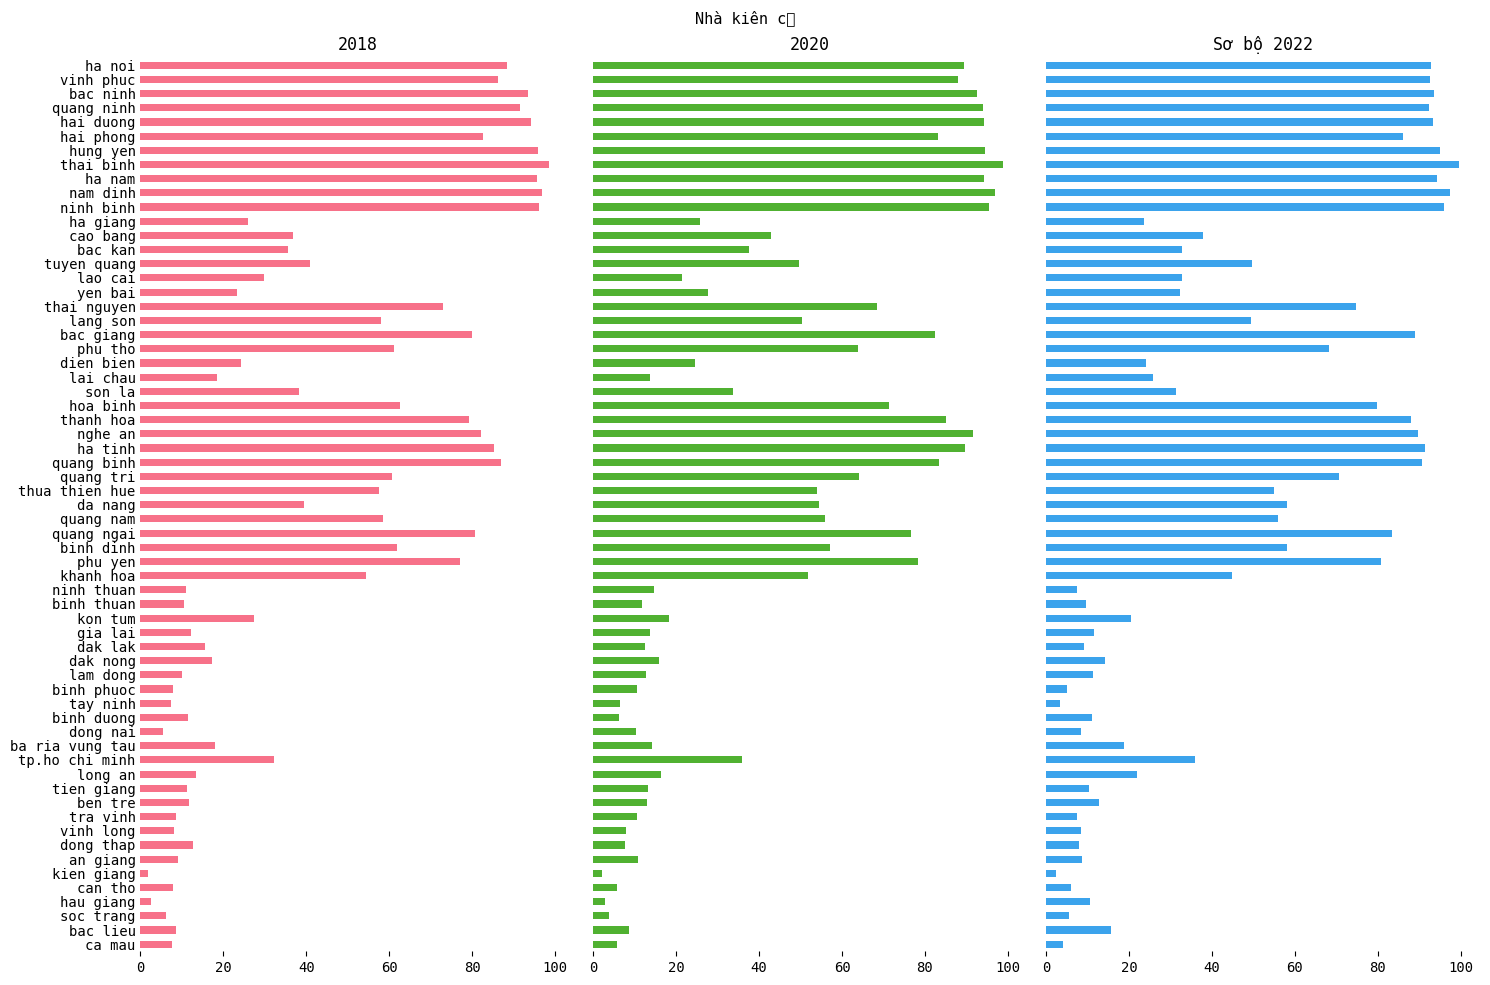

In [ ]:
pannel_bar_plot(nha_province, 'Nhà kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà kiên cố')


<ipython-input-65-8dc35093c7d5>:28: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


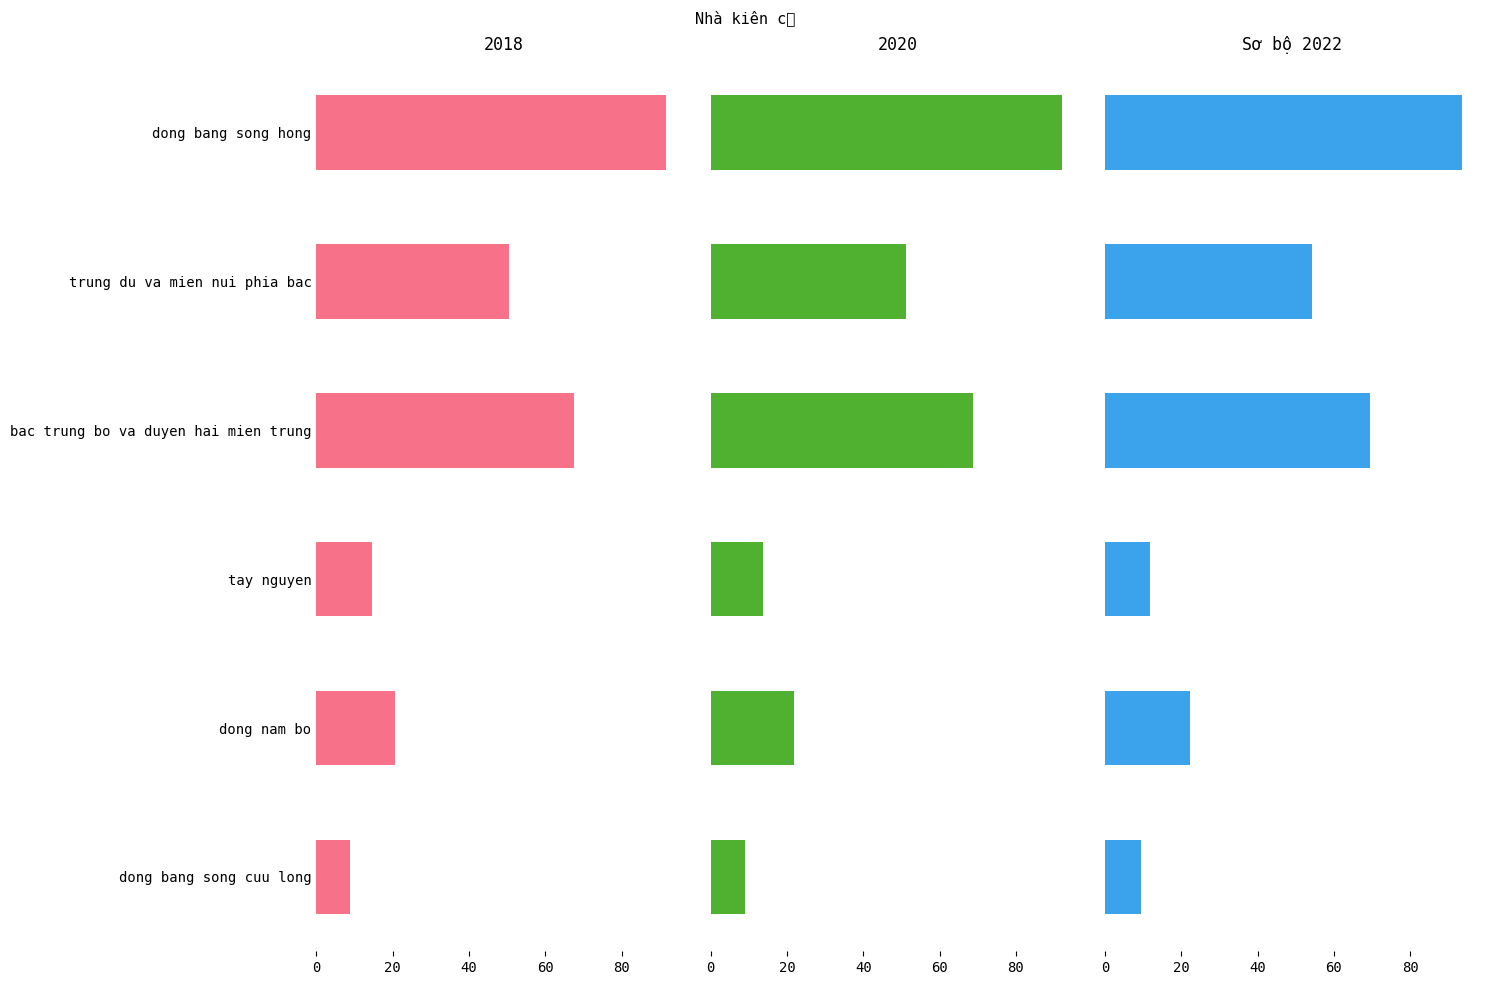

In [ ]:
pannel_bar_plot(nha_vung_mien, 'Nhà kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà kiên cố')


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  func(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


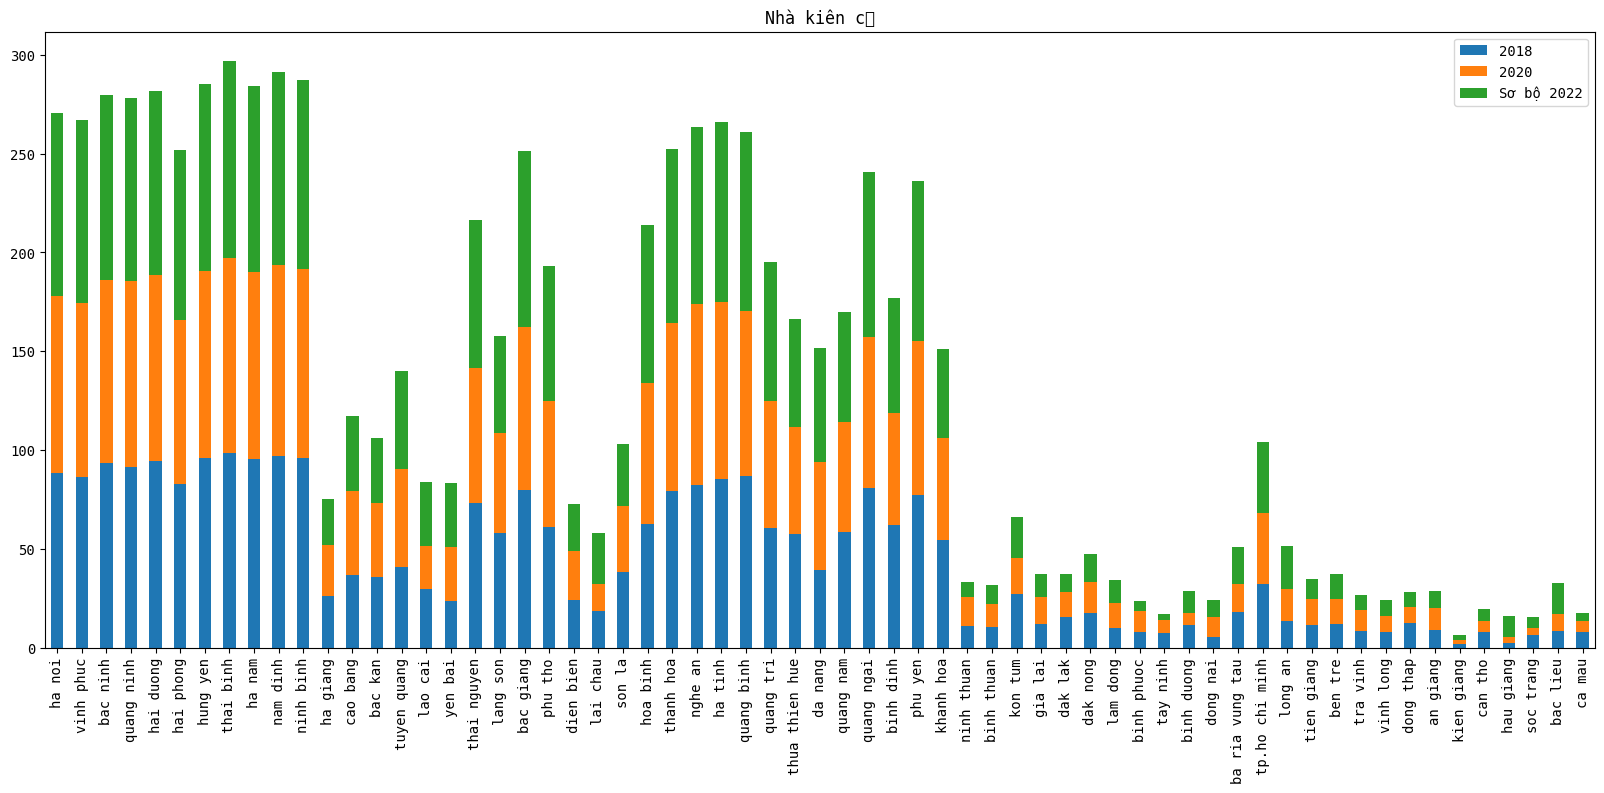

<Figure size 2000x1000 with 0 Axes>

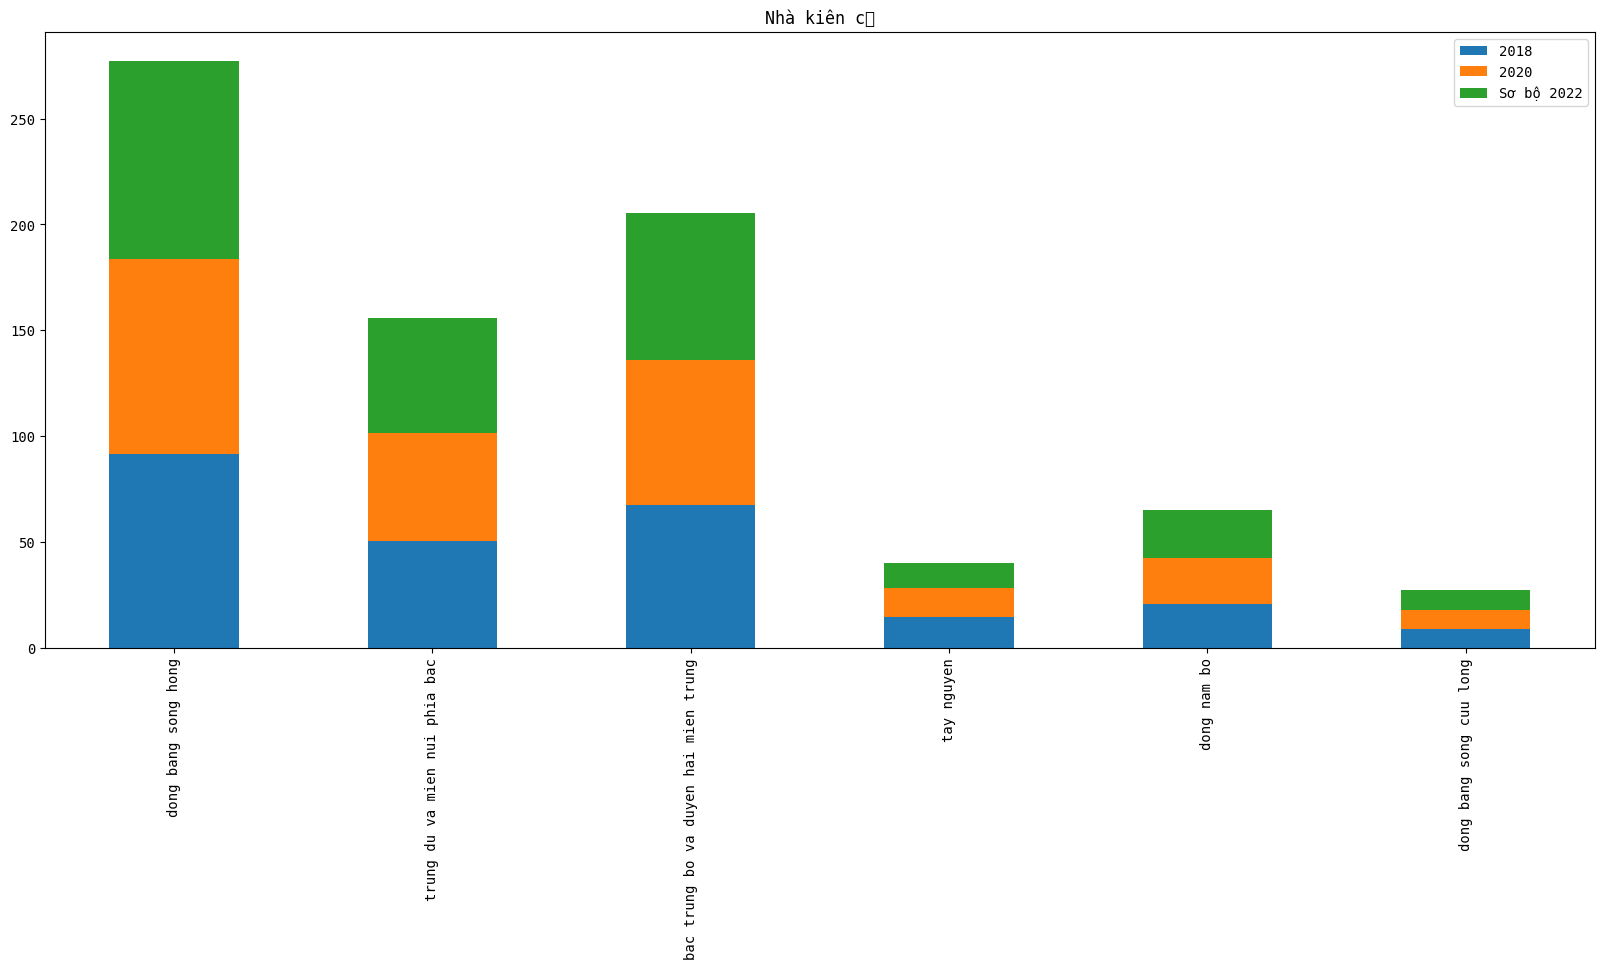

In [ ]:
stacked_bar_plot(nha_province, 'Nhà kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà kiên cố')

stacked_bar_plot(nha_vung_mien, 'Nhà kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà kiên cố')

In [ ]:
describe_(nha_province, 'Nhà kiên cố', ['2018', '2020', 'Sơ bộ 2022'])

describe_(nha_vung_mien, 'Nhà kiên cố', ['2018', '2020', 'Sơ bộ 2022'])

2018      2020  Sơ bộ 2022
count   6.000000   6.00000    6.000000
mean   42.250000  42.73000   43.515000
std    33.127074  33.41877   34.396591
min     8.900000   8.93000    9.410000
25%    16.025000  15.77750   14.462500
50%    35.550000  36.53500   38.390000
75%    63.175000  64.29750   65.685000
max    91.600000  91.97000   93.630000

In [ ]:
province_with_max_value(nha_province, 'Nhà kiên cố', ['2018', '2020', 'Sơ bộ 2022'])

2018 thai binh Đồng bằng sông Hồng
2020 thai binh Đồng bằng sông Hồng
Sơ bộ 2022 thai binh Đồng bằng sông Hồng


In [ ]:
top_k_province_worst_sub_feature(nha_province, 'Nhà kiên cố', ['2018', '2020', 'Sơ bộ 2022'])


2018:
kien giang, Đồng bằng sông Cửu Long: 1.9
hau giang, Đồng bằng sông Cửu Long: 2.6
dong nai, Đông Nam Bộ: 5.4
soc trang, Đồng bằng sông Cửu Long: 6.2
tay ninh, Đông Nam Bộ: 7.4
------------------------------
2020:
kien giang, Đồng bằng sông Cửu Long: 2.16
hau giang, Đồng bằng sông Cửu Long: 2.81
soc trang, Đồng bằng sông Cửu Long: 3.7
can tho, Đồng bằng sông Cửu Long: 5.63
ca mau, Đồng bằng sông Cửu Long: 5.7
------------------------------
Sơ bộ 2022:
kien giang, Đồng bằng sông Cửu Long: 2.25
tay ninh, Đông Nam Bộ: 3.34
ca mau, Đồng bằng sông Cửu Long: 4.06
binh phuoc, Đông Nam Bộ: 4.98
soc trang, Đồng bằng sông Cửu Long: 5.58
------------------------------


In [ ]:
top_k_province_best_sub_feature(nha_province, 'Nhà kiên cố', ['2018', '2020', 'Sơ bộ 2022'])


2018:
thai binh, Đồng bằng sông Hồng: 98.5
nam dinh, Đồng bằng sông Hồng: 96.9
ninh binh, Đồng bằng sông Hồng: 96.1
hung yen, Đồng bằng sông Hồng: 96.0
ha nam, Đồng bằng sông Hồng: 95.7
------------------------------
2020:
thai binh, Đồng bằng sông Hồng: 98.71
nam dinh, Đồng bằng sông Hồng: 96.89
ninh binh, Đồng bằng sông Hồng: 95.37
hung yen, Đồng bằng sông Hồng: 94.4
hai duong, Đồng bằng sông Hồng: 94.31
------------------------------
Sơ bộ 2022:
thai binh, Đồng bằng sông Hồng: 99.66
nam dinh, Đồng bằng sông Hồng: 97.51
ninh binh, Đồng bằng sông Hồng: 96.03
hung yen, Đồng bằng sông Hồng: 94.93
ha nam, Đồng bằng sông Hồng: 94.37
------------------------------


#### Nhà bán kiên cố

In [ ]:
nha[nha.Sub_Feature == 'Nhà bán kiên cố']

Main_Feature             Province  \
275  Tỷ lệ hộ có nhà ở phân theo loại nh...  dong bang song hong   
276  Tỷ lệ hộ có nhà ở phân theo loại nh...               ha noi   
277  Tỷ lệ hộ có nhà ở phân theo loại nh...            vinh phuc   
278  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac ninh   
279  Tỷ lệ hộ có nhà ở phân theo loại nh...           quang ninh   
..                                                 ...                  ...   
339  Tỷ lệ hộ có nhà ở phân theo loại nh...              can tho   
340  Tỷ lệ hộ có nhà ở phân theo loại nh...            hau giang   
341  Tỷ lệ hộ có nhà ở phân theo loại nh...            soc trang   
342  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac lieu   
343  Tỷ lệ hộ có nhà ở phân theo loại nh...               ca mau   

         Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015  \
275  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
276  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
277  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
278  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
279  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
..               ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
339  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
340  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
341  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
342  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
343  Nhà bán kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

     2016  2017  2018  2019   2020  2021  Sơ bộ 2021  2022  Sơ bộ 2022  
275   6.9   NaN   8.1   NaN   7.92   NaN         NaN   NaN        6.33  
276   8.1   NaN  11.5   NaN  10.44   NaN         NaN   NaN        7.11  
277  11.2   NaN  13.4   NaN  11.59   NaN         NaN   NaN        7.48  
278   9.7   NaN   6.4   NaN   7.36   NaN         NaN   NaN        6.51  
279   4.6   NaN   6.7   NaN   5.35   NaN         NaN   NaN        7.26  
..    ...   ...   ...   ...    ...   ...         ...   ...         ...  
339  77.2   NaN  80.7   NaN  85.50   NaN         NaN   NaN       90.42  
340  76.0   NaN  80.0   NaN  84.66   NaN         NaN   NaN       83.94  
341  68.7   NaN  77.1   NaN  80.26   NaN         NaN   NaN       86.60  
342  70.4   NaN  77.3   NaN  81.40   NaN         NaN   NaN       76.16  
343  57.3   NaN  67.6   NaN  69.22   NaN         NaN   NaN       77.59  

[69 rows x 26 columns]

In [ ]:
clcc6_2 = nha[nha.Sub_Feature == 'Nhà bán kiên cố'][['2018', '2020','Sơ bộ 2022']].mean(axis=1).tolist()

<ipython-input-65-8dc35093c7d5>:28: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


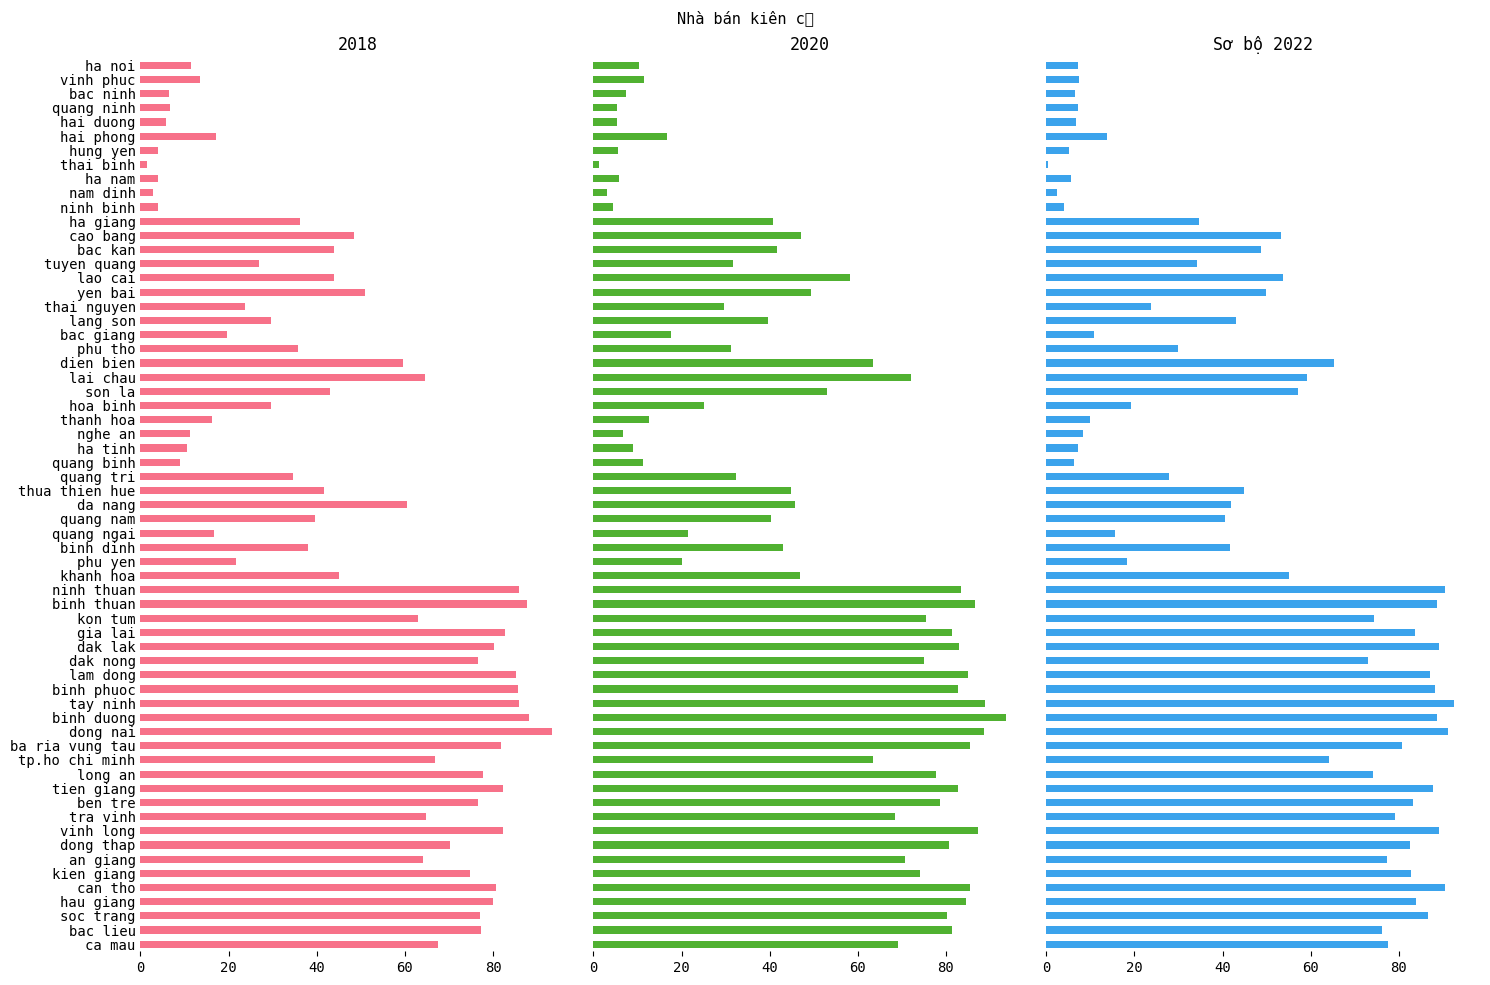

In [ ]:
pannel_bar_plot(nha_province, 'Nhà bán kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà bán kiên cố')


<ipython-input-65-8dc35093c7d5>:28: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


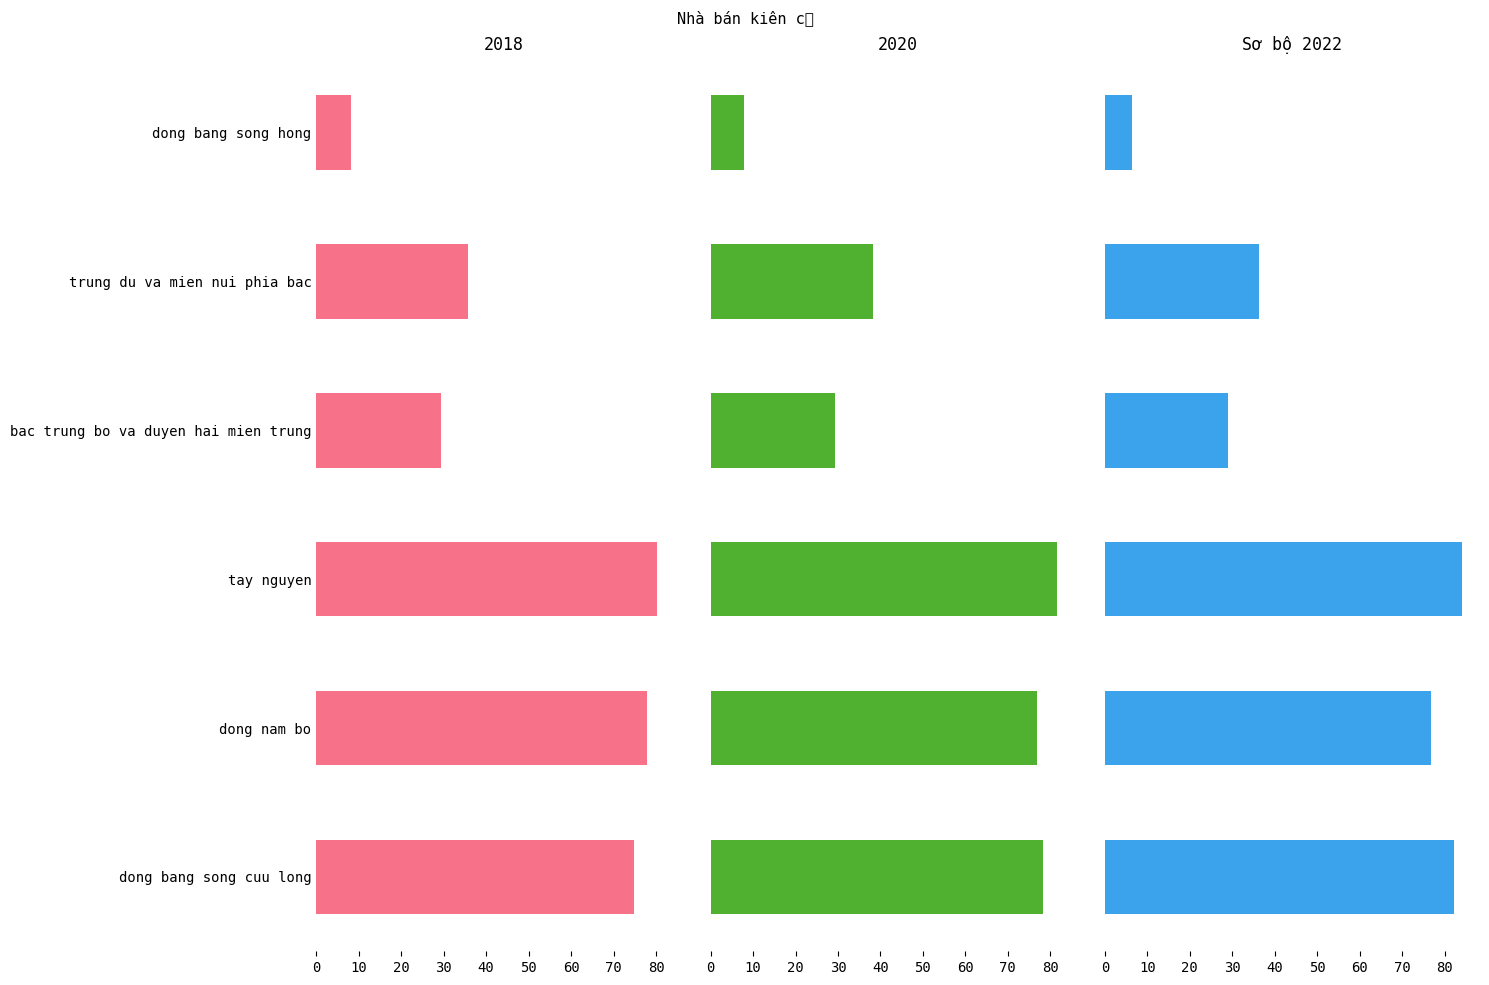

In [ ]:
pannel_bar_plot(nha_vung_mien, 'Nhà bán kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà bán kiên cố')


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  func(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


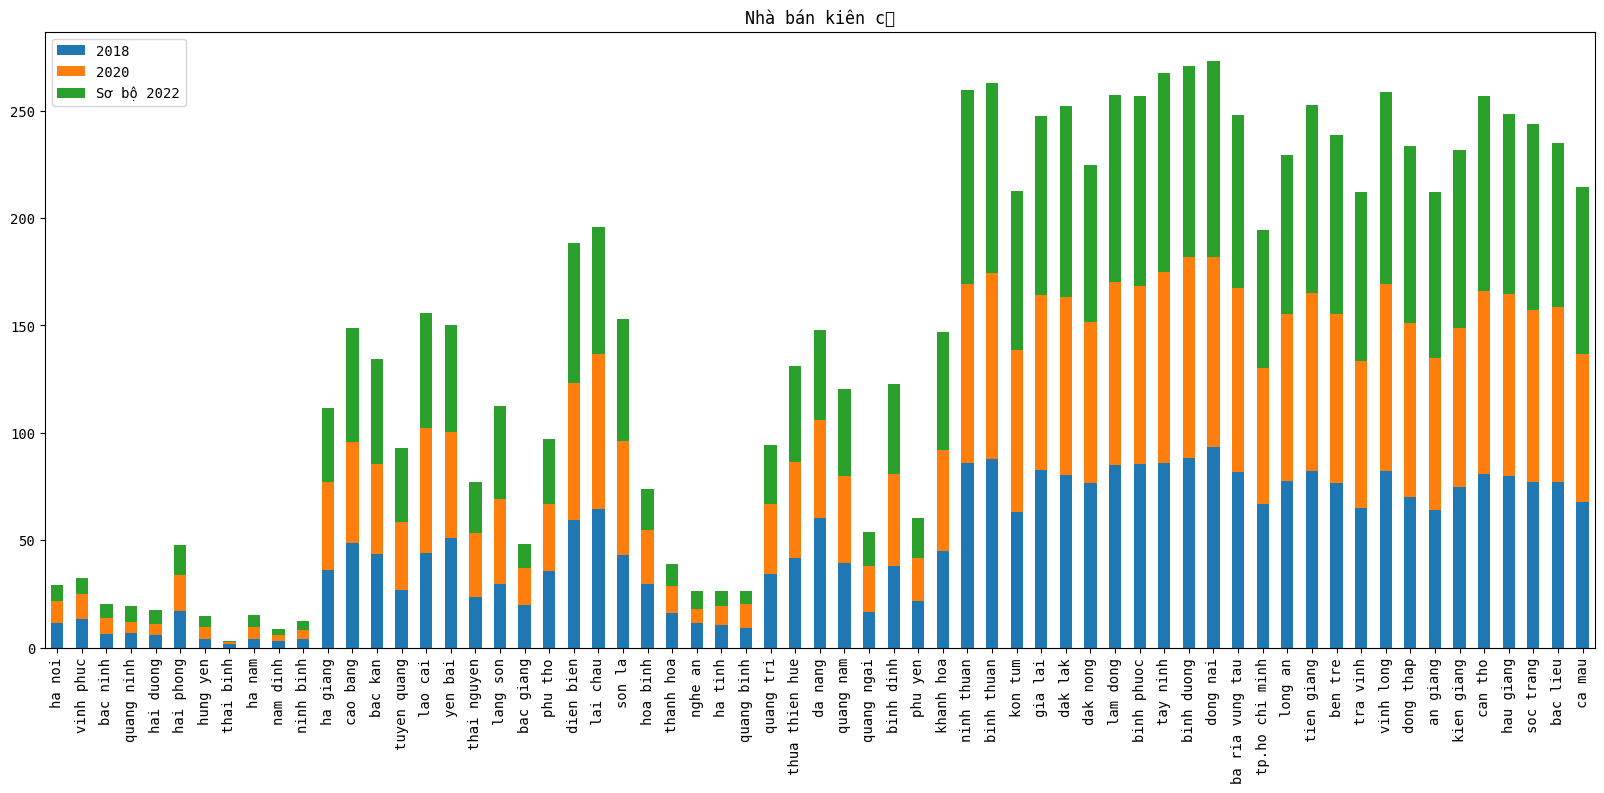

<Figure size 2000x1000 with 0 Axes>

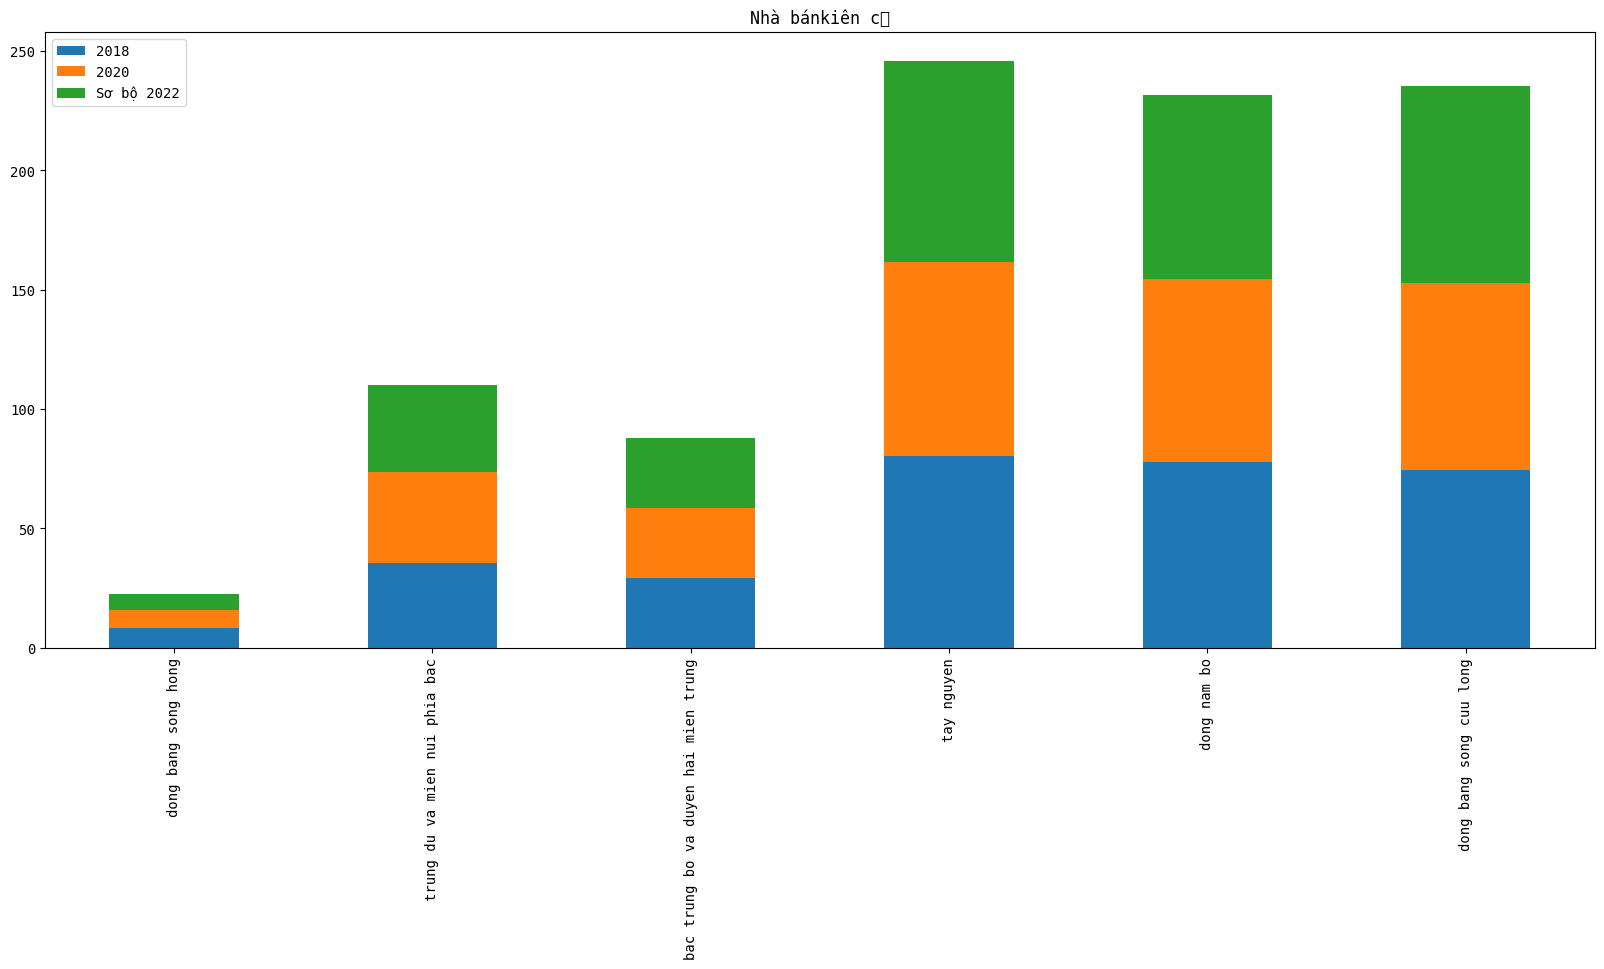

In [ ]:
stacked_bar_plot(nha_province, 'Nhà bán kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà bán kiên cố')

stacked_bar_plot(nha_vung_mien, 'Nhà bán kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà bánkiên cố')

In [ ]:
describe_(nha_province, 'Nhà bán kiên cố', ['2018', '2020', 'Sơ bộ 2022'])

describe_(nha_vung_mien, 'Nhà bán kiên cố', ['2018', '2020', 'Sơ bộ 2022'])

2018       2020  Sơ bộ 2022
count   6.000000   6.000000    6.000000
mean   50.983333  52.001667   52.480000
std    30.573284  31.069894   32.948923
min     8.100000   7.920000    6.330000
25%    30.975000  31.537500   30.825000
50%    55.200000  57.495000   56.540000
75%    77.025000  77.917500   80.942500
max    80.200000  81.490000   84.140000

In [ ]:
province_with_max_value(nha_province, 'Nhà bán kiên cố', ['2018', '2020', 'Sơ bộ 2022'])

2018 dong nai Đông Nam Bộ
2020 binh duong Đông Nam Bộ
Sơ bộ 2022 tay ninh Đông Nam Bộ


In [ ]:
top_k_province_best_sub_feature(nha_province, 'Nhà bán kiên cố', ['2018', '2020', 'Sơ bộ 2022'])


2018:
dong nai, Đông Nam Bộ: 93.3
binh duong, Đông Nam Bộ: 88.2
binh thuan, Bắc Trung Bộ và duyên hải miền Trung: 87.7
tay ninh, Đông Nam Bộ: 86.0
ninh thuan, Bắc Trung Bộ và duyên hải miền Trung: 85.8
------------------------------
2020:
binh duong, Đông Nam Bộ: 93.73
tay ninh, Đông Nam Bộ: 88.82
dong nai, Đông Nam Bộ: 88.71
vinh long, Đồng bằng sông Cửu Long: 87.25
binh thuan, Bắc Trung Bộ và duyên hải miền Trung: 86.66
------------------------------
Sơ bộ 2022:
tay ninh, Đông Nam Bộ: 92.56
dong nai, Đông Nam Bộ: 91.13
ninh thuan, Bắc Trung Bộ và duyên hải miền Trung: 90.48
can tho, Đồng bằng sông Cửu Long: 90.42
vinh long, Đồng bằng sông Cửu Long: 89.19
------------------------------


In [ ]:
nha

Main_Feature             Province  \
135  Tỷ lệ hộ có nhà ở phân theo loại nh...  dong bang song hong   
136  Tỷ lệ hộ có nhà ở phân theo loại nh...               ha noi   
137  Tỷ lệ hộ có nhà ở phân theo loại nh...            vinh phuc   
138  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac ninh   
139  Tỷ lệ hộ có nhà ở phân theo loại nh...           quang ninh   
..                                                 ...                  ...   
479  Tỷ lệ hộ có nhà ở phân theo loại nh...              can tho   
480  Tỷ lệ hộ có nhà ở phân theo loại nh...            hau giang   
481  Tỷ lệ hộ có nhà ở phân theo loại nh...            soc trang   
482  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac lieu   
483  Tỷ lệ hộ có nhà ở phân theo loại nh...               ca mau   

    Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015   2016  \
135       Chung   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  100.0   
136       Chung   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  100.0   
137       Chung   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  100.0   
138       Chung   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  100.0   
139       Chung   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  100.0   
..          ...   ...   ...   ...   ...   ...   ...   ...  ...   ...    ...   
479  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN    2.6   
480  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   11.8   
481  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN    7.8   
482  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN    9.8   
483  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   13.6   

     2017   2018  2019    2020  2021  Sơ bộ 2021  2022  Sơ bộ 2022  
135   NaN  100.0   NaN  100.00   NaN         NaN   NaN      100.00  
136   NaN  100.0   NaN  100.00   NaN         NaN   NaN      100.00  
137   NaN  100.0   NaN  100.00   NaN         NaN   NaN      100.00  
138   NaN  100.0   NaN  100.00   NaN         NaN   NaN      100.00  
139   NaN  100.0   NaN  100.00   NaN         NaN   NaN      100.00  
..    ...    ...   ...     ...   ...         ...   ...         ...  
479   NaN    2.1   NaN    0.81   NaN         NaN   NaN        0.56  
480   NaN    8.5   NaN    4.01   NaN         NaN   NaN        1.80  
481   NaN    5.3   NaN    5.41   NaN         NaN   NaN        2.30  
482   NaN    5.5   NaN    3.68   NaN         NaN   NaN        2.57  
483   NaN    6.1   NaN   10.69   NaN         NaN   NaN        6.11  

[345 rows x 26 columns]

#### Nhà thiếu kiên cố

In [ ]:
nha[nha.Sub_Feature == 'Nhà thiếu kiên cố']

Main_Feature             Province  \
345  Tỷ lệ hộ có nhà ở phân theo loại nh...  dong bang song hong   
346  Tỷ lệ hộ có nhà ở phân theo loại nh...               ha noi   
347  Tỷ lệ hộ có nhà ở phân theo loại nh...            vinh phuc   
348  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac ninh   
349  Tỷ lệ hộ có nhà ở phân theo loại nh...           quang ninh   
..                                                 ...                  ...   
409  Tỷ lệ hộ có nhà ở phân theo loại nh...              can tho   
410  Tỷ lệ hộ có nhà ở phân theo loại nh...            hau giang   
411  Tỷ lệ hộ có nhà ở phân theo loại nh...            soc trang   
412  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac lieu   
413  Tỷ lệ hộ có nhà ở phân theo loại nh...               ca mau   

           Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015  \
345  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
346  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
347  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
348  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
349  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
..                 ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
409  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
410  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
411  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
412  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
413  Nhà thiếu kiên cố   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

     2016  2017  2018  2019   2020  2021  Sơ bộ 2021  2022  Sơ bộ 2022  
345   0.1   NaN   0.2   NaN   0.07   NaN         NaN   NaN        0.02  
346   0.1   NaN   0.1   NaN   0.05   NaN         NaN   NaN        0.00  
347   0.1   NaN   0.4   NaN   0.17   NaN         NaN   NaN        0.00  
348   0.1   NaN   0.0   NaN   0.00   NaN         NaN   NaN        0.00  
349   1.5   NaN   0.9   NaN   0.50   NaN         NaN   NaN        0.13  
..    ...   ...   ...   ...    ...   ...         ...   ...         ...  
409  11.5   NaN   9.4   NaN   8.06   NaN         NaN   NaN        3.05  
410   9.8   NaN   8.9   NaN   8.52   NaN         NaN   NaN        3.60  
411  17.1   NaN  11.4   NaN  10.58   NaN         NaN   NaN        5.52  
412  12.5   NaN   8.6   NaN   6.37   NaN         NaN   NaN        5.54  
413  22.3   NaN  18.6   NaN  14.35   NaN         NaN   NaN       12.24  

[69 rows x 26 columns]

In [ ]:
clcc6_3 = nha[nha.Sub_Feature == 'Nhà thiếu kiên cố'][['2018', '2020','Sơ bộ 2022']].mean(axis=1).tolist()

<ipython-input-65-8dc35093c7d5>:28: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
<ipython-input-65-8dc35093c7d5>:28: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


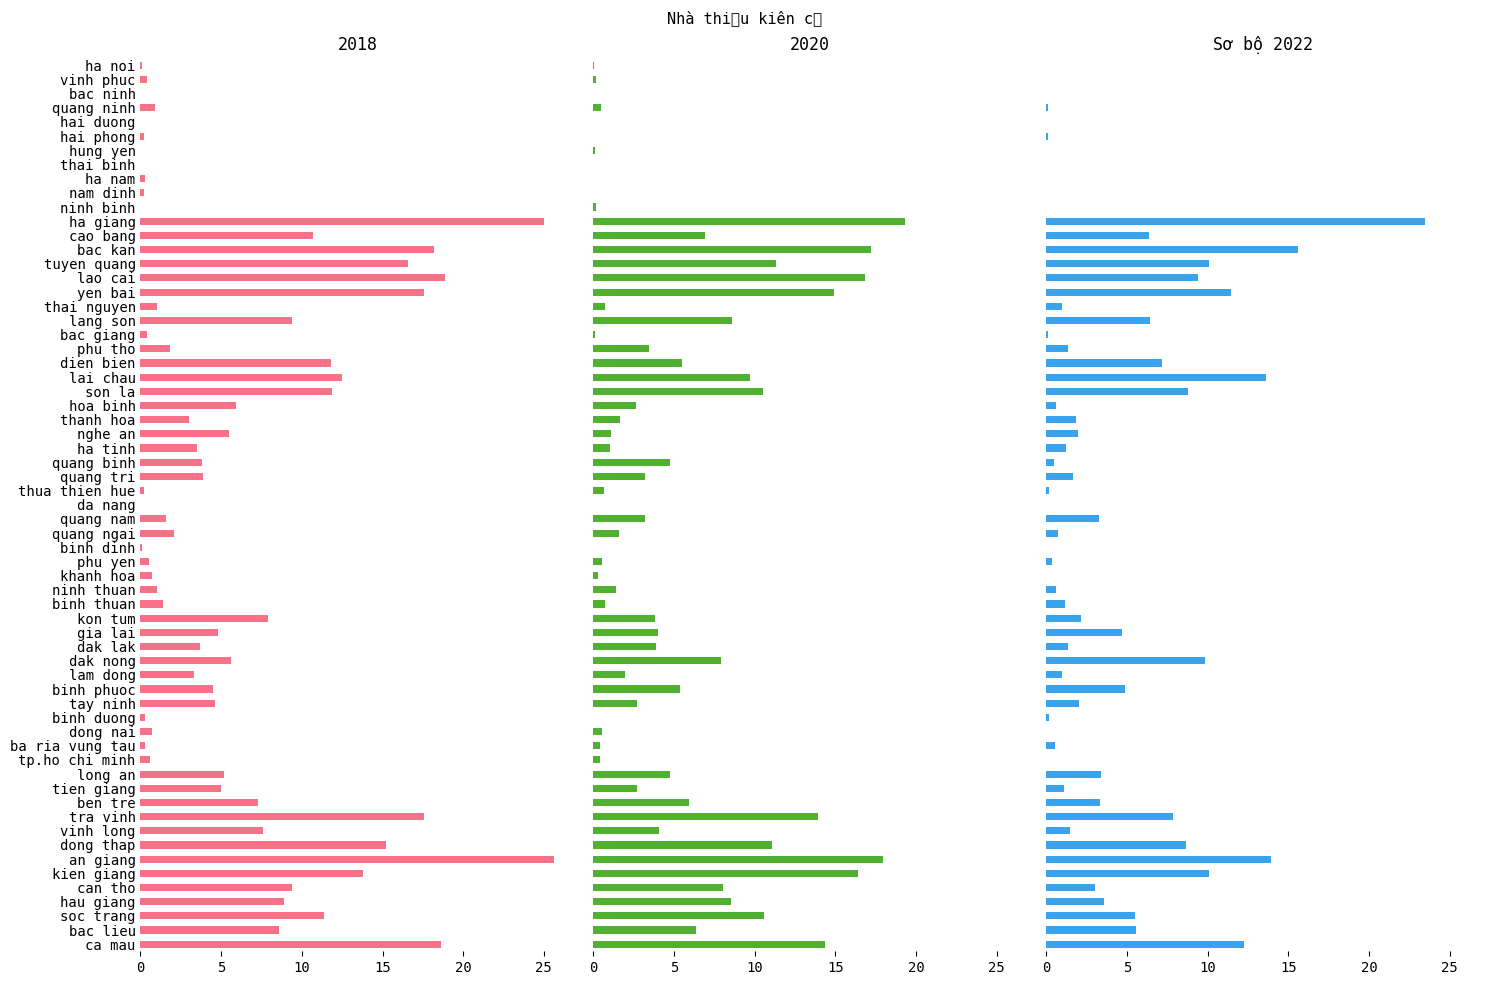

In [ ]:
pannel_bar_plot(nha_province, 'Nhà thiếu kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà thiếu kiên cố')


<ipython-input-65-8dc35093c7d5>:28: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
<ipython-input-65-8dc35093c7d5>:28: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


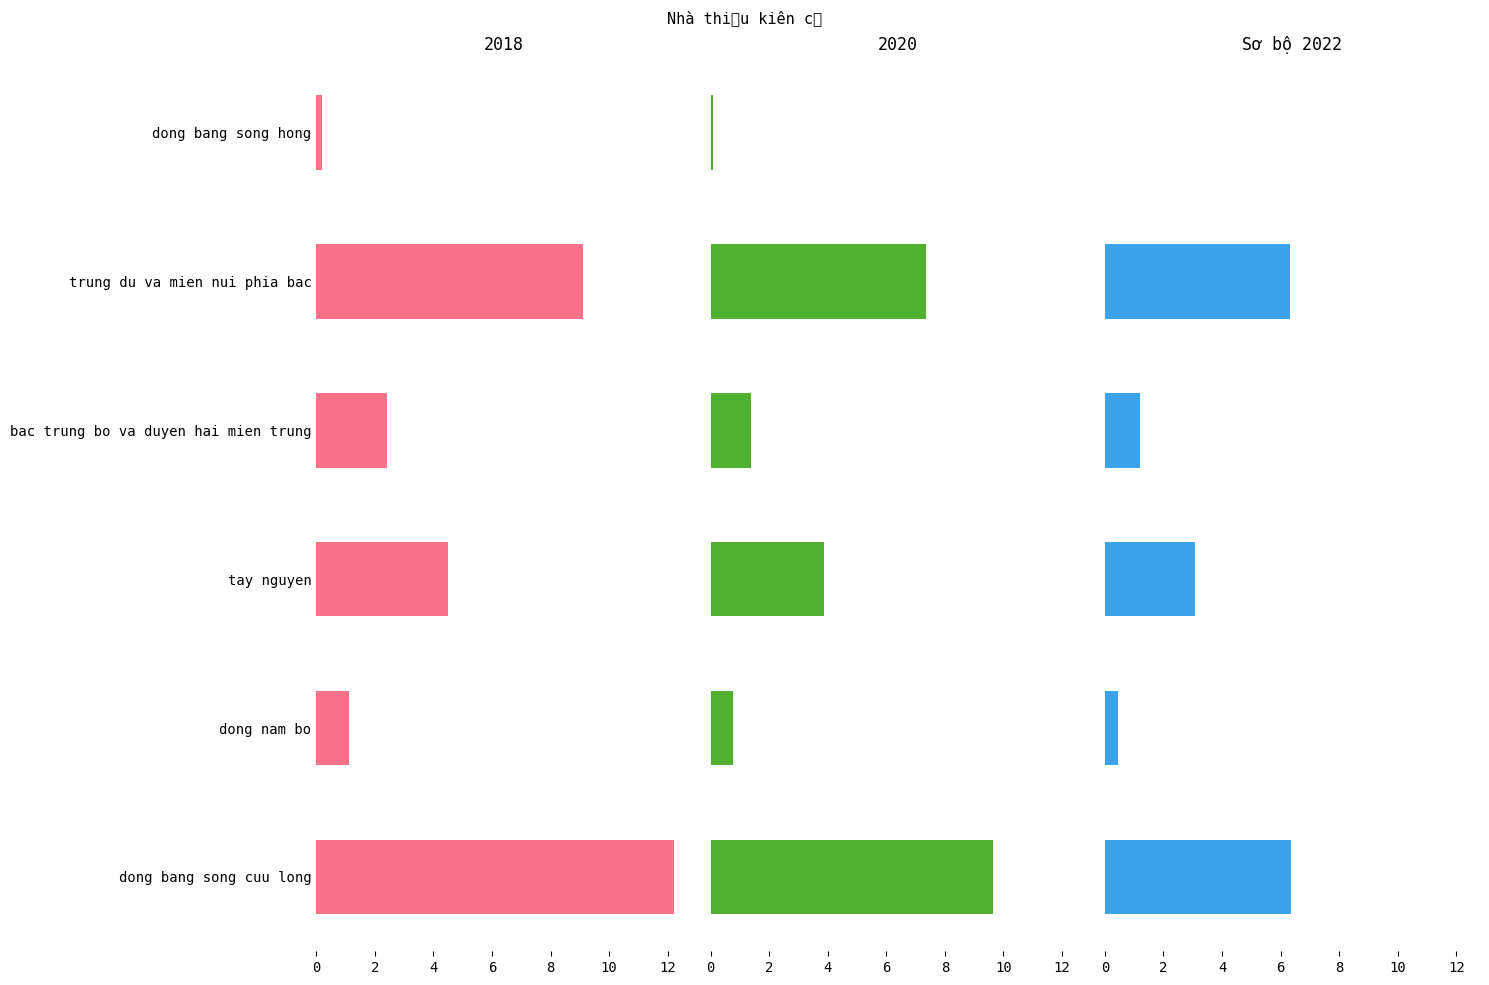

In [ ]:
pannel_bar_plot(nha_vung_mien, 'Nhà thiếu kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà thiếu kiên cố')


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  func(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


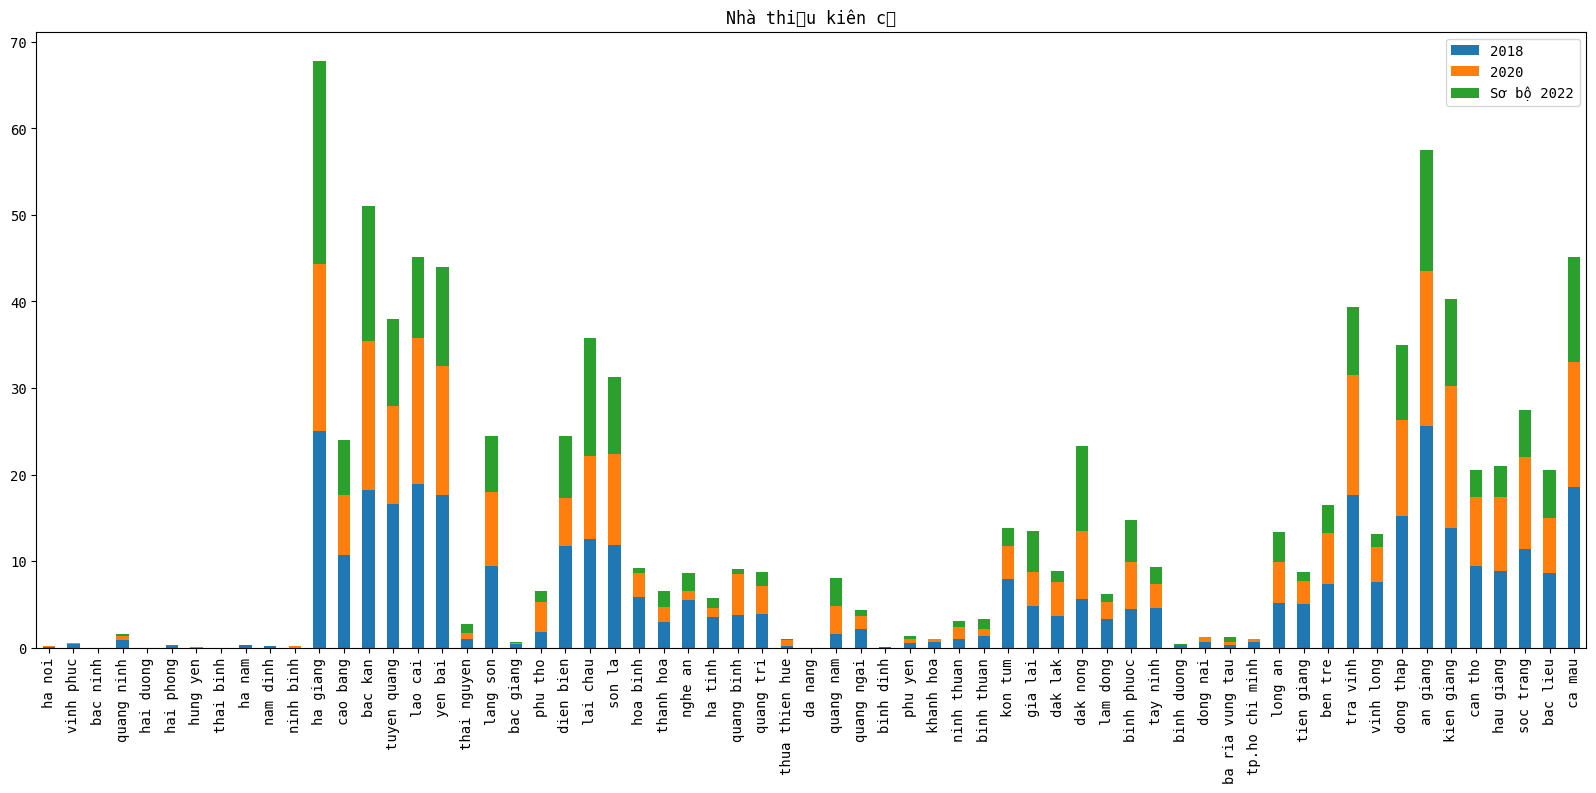

<Figure size 2000x1000 with 0 Axes>

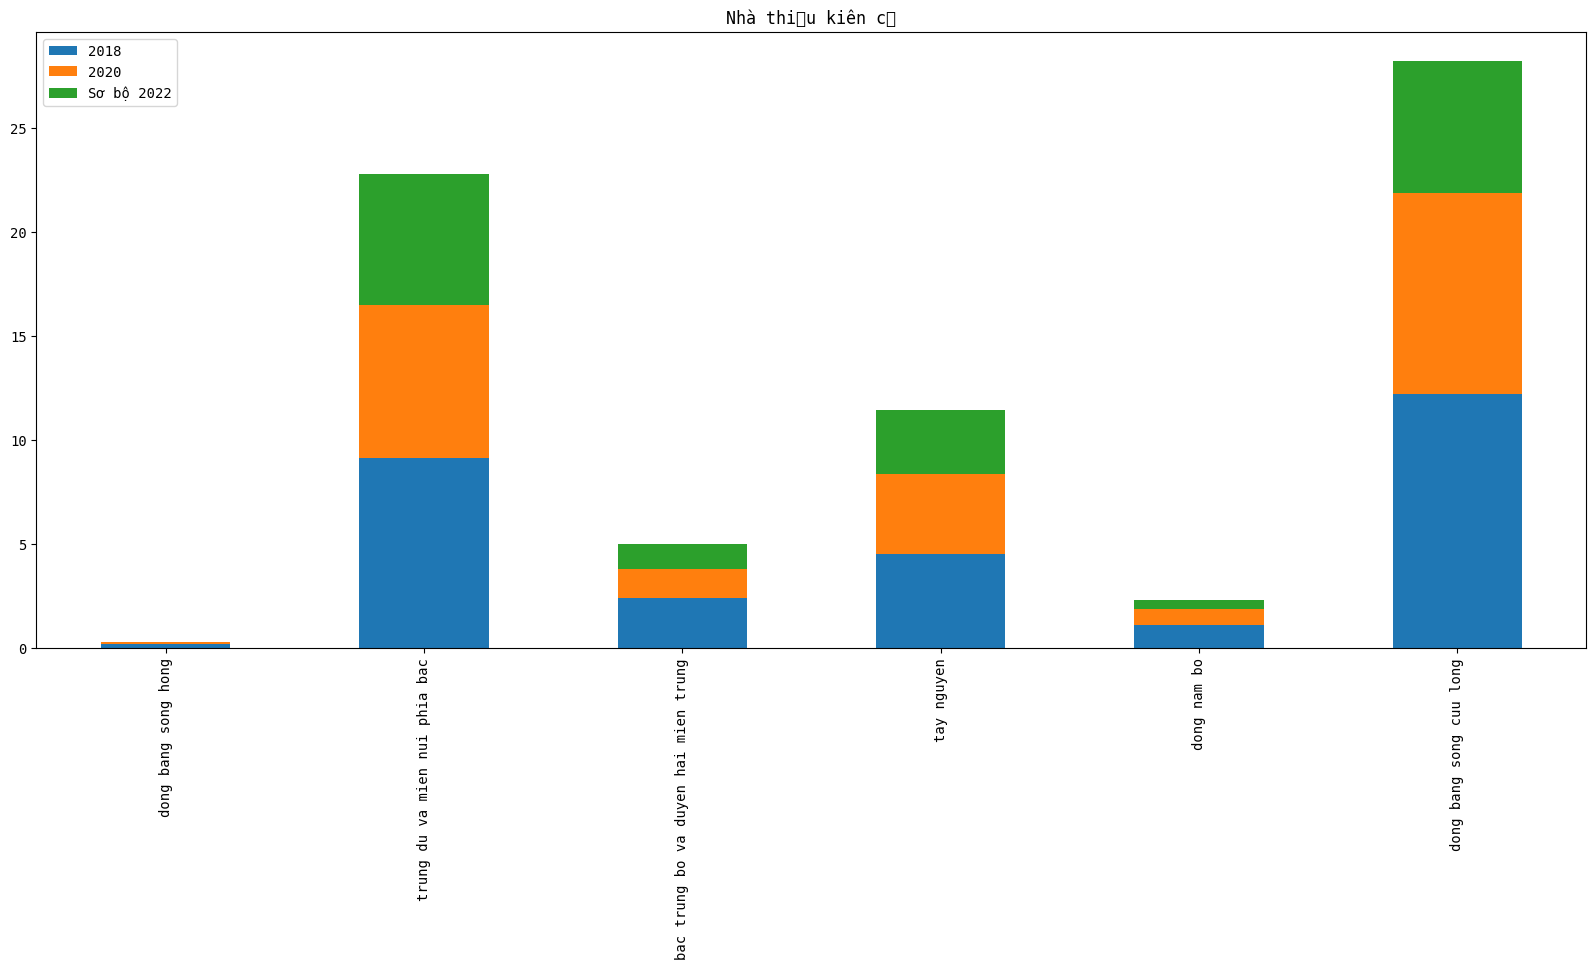

In [ ]:
stacked_bar_plot(nha_province, 'Nhà thiếu kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà thiếu kiên cố')

stacked_bar_plot(nha_vung_mien, 'Nhà thiếu kiên cố', ['2018', '2020', 'Sơ bộ 2022'], title='Nhà thiếu kiên cố')

In [ ]:
describe_(nha_province, 'Nhà thiếu kiên cố', ['2018', '2020', 'Sơ bộ 2022'])

describe_(nha_vung_mien, 'Nhà thiếu kiên cố', ['2018', '2020', 'Sơ bộ 2022'])

2018      2020  Sơ bộ 2022
count   6.000000  6.000000    6.000000
mean    4.916667  3.848333    2.900000
std     4.772176  3.900346    2.860636
min     0.200000  0.070000    0.020000
25%     1.425000  0.912500    0.622500
50%     3.450000  2.620000    2.140000
75%     7.950000  6.487500    5.517500
max    12.200000  9.660000    6.340000

In [ ]:
province_with_max_value(nha_province, 'Nhà thiếu kiên cố', ['2018', '2020', 'Sơ bộ 2022'])

2018 an giang Đồng bằng sông Cửu Long
2020 ha giang Trung du và miền núi phía Bắc
Sơ bộ 2022 ha giang Trung du và miền núi phía Bắc


In [ ]:
top_k_province_best_sub_feature(nha_province, 'Nhà thiếu kiên cố', ['2018', '2020', 'Sơ bộ 2022'])


2018:
an giang, Đồng bằng sông Cửu Long: 25.6
ha giang, Trung du và miền núi phía Bắc: 25.0
lao cai, Trung du và miền núi phía Bắc: 18.9
ca mau, Đồng bằng sông Cửu Long: 18.6
bac kan, Trung du và miền núi phía Bắc: 18.2
------------------------------
2020:
ha giang, Trung du và miền núi phía Bắc: 19.33
an giang, Đồng bằng sông Cửu Long: 17.97
bac kan, Trung du và miền núi phía Bắc: 17.19
lao cai, Trung du và miền núi phía Bắc: 16.85
kien giang, Đồng bằng sông Cửu Long: 16.43
------------------------------
Sơ bộ 2022:
ha giang, Trung du và miền núi phía Bắc: 23.45
bac kan, Trung du và miền núi phía Bắc: 15.62
an giang, Đồng bằng sông Cửu Long: 13.92
lai chau, Trung du và miền núi phía Bắc: 13.6
ca mau, Đồng bằng sông Cửu Long: 12.24
------------------------------


#### Nhà đơn sơ

In [ ]:
nha[nha.Sub_Feature == 'Nhà đơn sơ']

Main_Feature             Province  \
415  Tỷ lệ hộ có nhà ở phân theo loại nh...  dong bang song hong   
416  Tỷ lệ hộ có nhà ở phân theo loại nh...               ha noi   
417  Tỷ lệ hộ có nhà ở phân theo loại nh...            vinh phuc   
418  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac ninh   
419  Tỷ lệ hộ có nhà ở phân theo loại nh...           quang ninh   
..                                                 ...                  ...   
479  Tỷ lệ hộ có nhà ở phân theo loại nh...              can tho   
480  Tỷ lệ hộ có nhà ở phân theo loại nh...            hau giang   
481  Tỷ lệ hộ có nhà ở phân theo loại nh...            soc trang   
482  Tỷ lệ hộ có nhà ở phân theo loại nh...             bac lieu   
483  Tỷ lệ hộ có nhà ở phân theo loại nh...               ca mau   

    Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  \
415  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   0.1   
416  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
417  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
418  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
419  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   0.8   
..          ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
479  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   2.6   
480  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  11.8   
481  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   7.8   
482  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   9.8   
483  Nhà đơn sơ   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN  13.6   

     2017  2018  2019   2020  2021  Sơ bộ 2021  2022  Sơ bộ 2022  
415   NaN   0.1   NaN   0.00   NaN         NaN   NaN        0.02  
416   NaN   0.0   NaN   0.00   NaN         NaN   NaN        0.00  
417   NaN   0.0   NaN   0.15   NaN         NaN   NaN        0.00  
418   NaN   0.0   NaN   0.00   NaN         NaN   NaN        0.00  
419   NaN   0.8   NaN   0.17   NaN         NaN   NaN        0.28  
..    ...   ...   ...    ...   ...         ...   ...         ...  
479   NaN   2.1   NaN   0.81   NaN         NaN   NaN        0.56  
480   NaN   8.5   NaN   4.01   NaN         NaN   NaN        1.80  
481   NaN   5.3   NaN   5.41   NaN         NaN   NaN        2.30  
482   NaN   5.5   NaN   3.68   NaN         NaN   NaN        2.57  
483   NaN   6.1   NaN  10.69   NaN         NaN   NaN        6.11  

[69 rows x 26 columns]

In [ ]:
clcc6_4 = nha[nha.Sub_Feature == 'Nhà đơn sơ'][['2018', '2020','Sơ bộ 2022']].mean(axis=1).tolist()

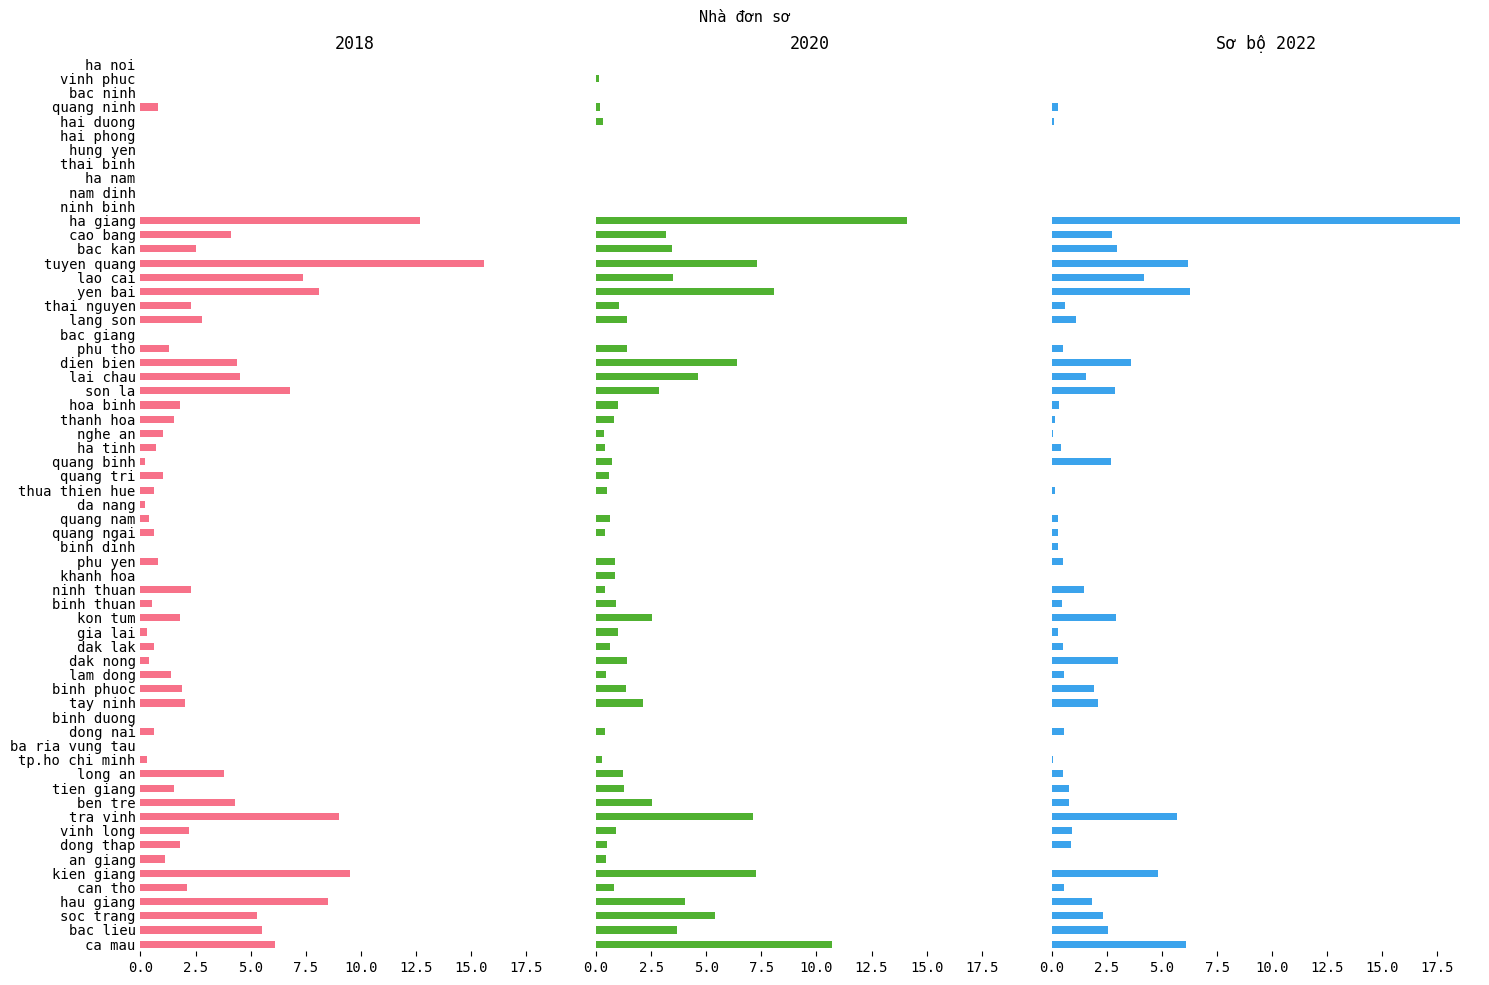

In [ ]:
pannel_bar_plot(nha_province, 'Nhà đơn sơ', ['2018','2020','Sơ bộ 2022'], title='Nhà đơn sơ')


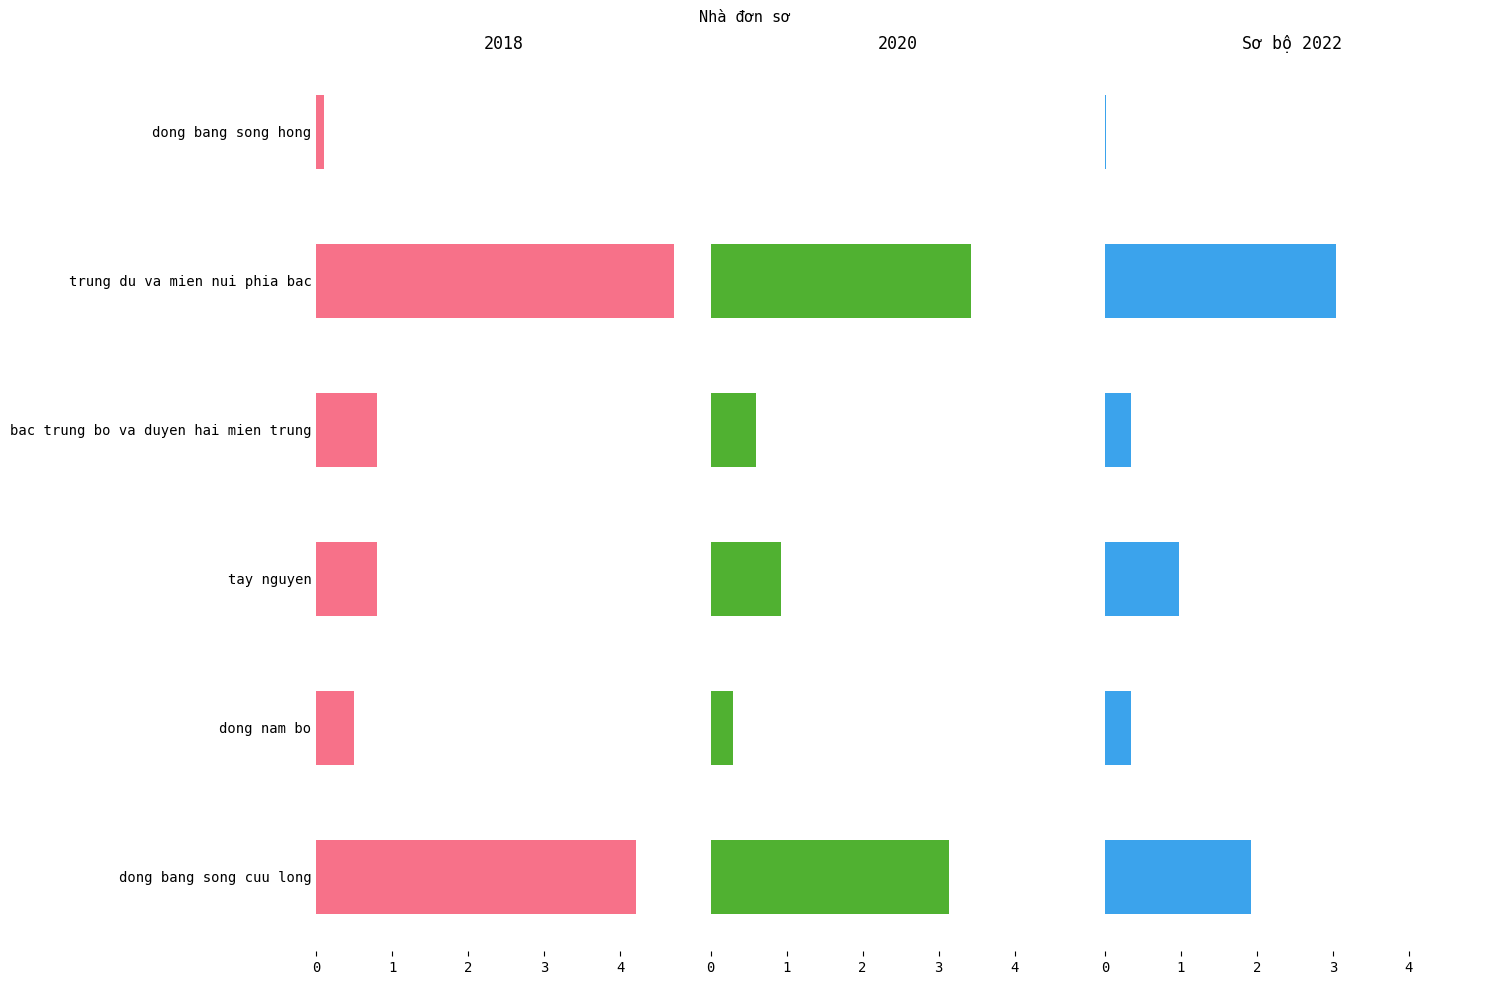

In [ ]:
pannel_bar_plot(nha_vung_mien, 'Nhà đơn sơ', ['2018','2020','Sơ bộ 2022'], title='Nhà đơn sơ')


<Figure size 2000x1000 with 0 Axes>

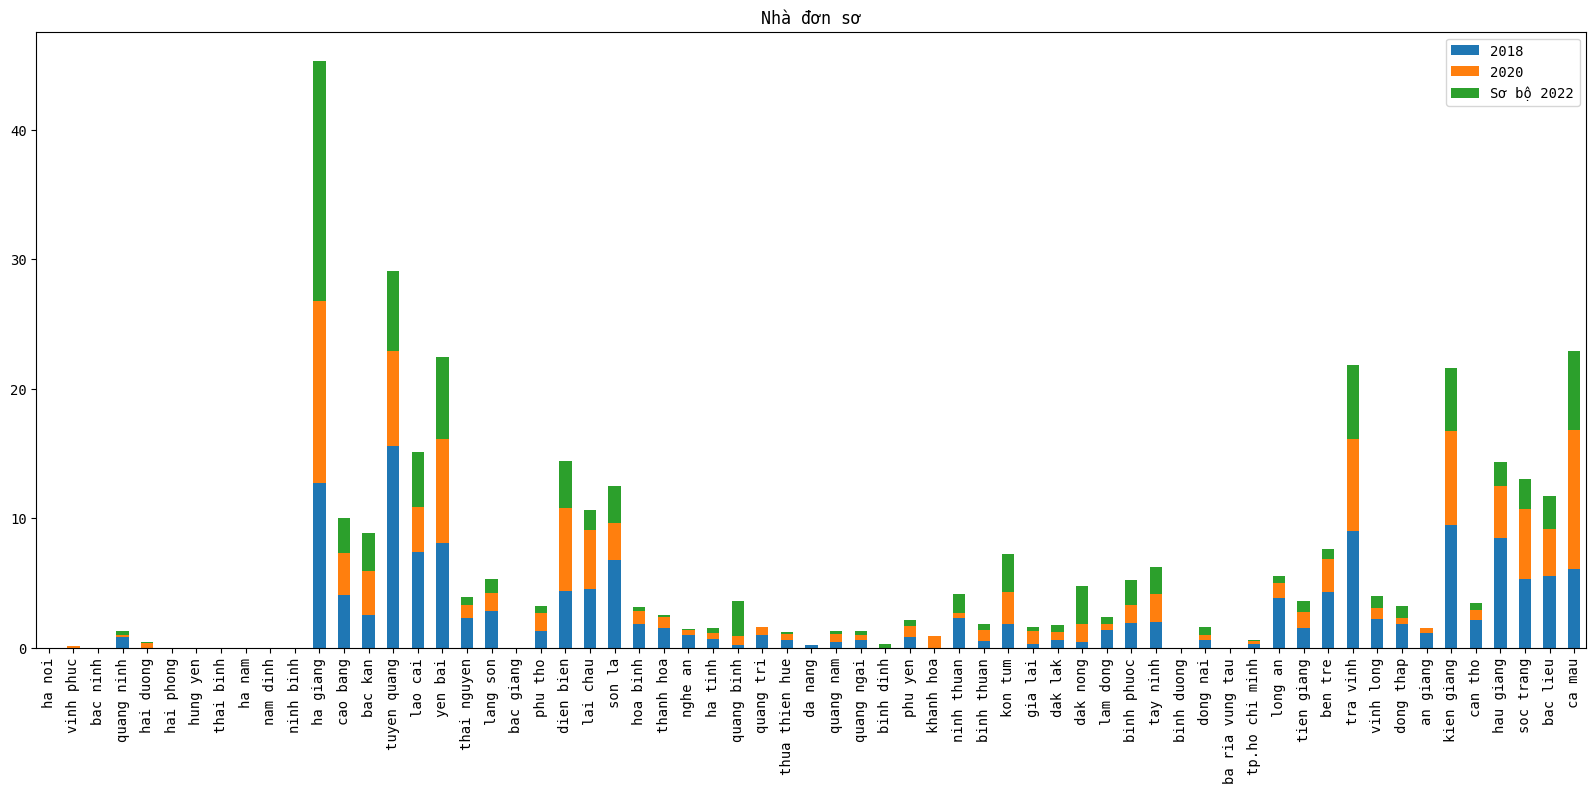

<Figure size 2000x1000 with 0 Axes>

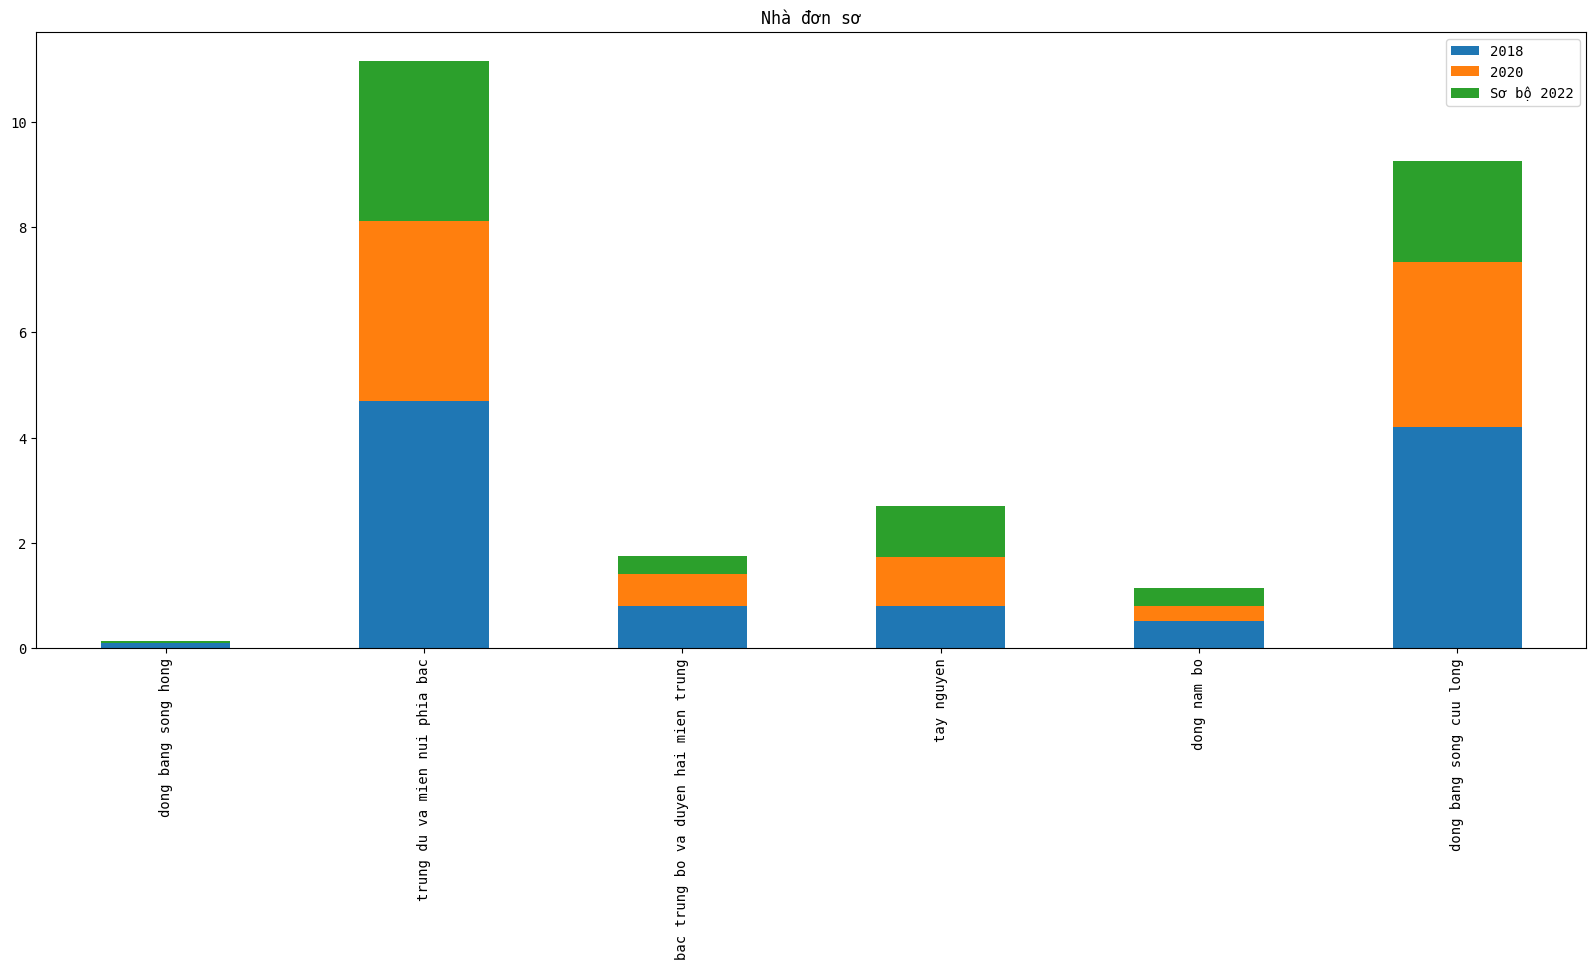

In [ ]:
stacked_bar_plot(nha_province, 'Nhà đơn sơ', ['2018','2020','Sơ bộ 2022'], title='Nhà đơn sơ')

stacked_bar_plot(nha_vung_mien, 'Nhà đơn sơ', ['2018','2020','Sơ bộ 2022'], title='Nhà đơn sơ')

In [ ]:
describe_(nha_province, 'Nhà đơn sơ', ['2018','2020','Sơ bộ 2022'])

describe_(nha_vung_mien, 'Nhà đơn sơ', ['2018','2020','Sơ bộ 2022'])

2018      2020  Sơ bộ 2022
count  6.000000  6.000000    6.000000
mean   1.850000  1.398333    1.105000
std    2.036418  1.492574    1.163989
min    0.100000  0.000000    0.020000
25%    0.575000  0.375000    0.340000
50%    0.800000  0.765000    0.655000
75%    3.350000  2.587500    1.682500
max    4.700000  3.420000    3.040000

In [ ]:
province_with_max_value(nha_province, 'Nhà đơn sơ', ['2018','2020','Sơ bộ 2022'])

2018 tuyen quang Trung du và miền núi phía Bắc
2020 ha giang Trung du và miền núi phía Bắc
Sơ bộ 2022 ha giang Trung du và miền núi phía Bắc


In [ ]:
top_k_province_best_sub_feature(nha_province, 'Nhà đơn sơ', ['2018','2020','Sơ bộ 2022'])


2018:
tuyen quang, Trung du và miền núi phía Bắc: 15.6
ha giang, Trung du và miền núi phía Bắc: 12.7
kien giang, Đồng bằng sông Cửu Long: 9.5
tra vinh, Đồng bằng sông Cửu Long: 9.0
hau giang, Đồng bằng sông Cửu Long: 8.5
------------------------------
2020:
ha giang, Trung du và miền núi phía Bắc: 14.11
ca mau, Đồng bằng sông Cửu Long: 10.69
yen bai, Trung du và miền núi phía Bắc: 8.05
tuyen quang, Trung du và miền núi phía Bắc: 7.3
kien giang, Đồng bằng sông Cửu Long: 7.27
------------------------------
Sơ bộ 2022:
ha giang, Trung du và miền núi phía Bắc: 18.51
yen bai, Trung du và miền núi phía Bắc: 6.28
tuyen quang, Trung du và miền núi phía Bắc: 6.17
ca mau, Đồng bằng sông Cửu Long: 6.11
tra vinh, Đồng bằng sông Cửu Long: 5.68
------------------------------


## Corrlation

#### barplot + lineplot

In [ ]:
bietchu_p

Main_Feature    Province  \
691  Tỷ lệ dân số từ 15 tuổi trở lên b...      ha noi   
693  Tỷ lệ dân số từ 15 tuổi trở lên b...   vinh phuc   
694  Tỷ lệ dân số từ 15 tuổi trở lên b...    bac ninh   
695  Tỷ lệ dân số từ 15 tuổi trở lên b...  quang ninh   
696  Tỷ lệ dân số từ 15 tuổi trở lên b...   hai duong   
..                                                 ...         ...   
755  Tỷ lệ dân số từ 15 tuổi trở lên b...     can tho   
756  Tỷ lệ dân số từ 15 tuổi trở lên b...   hau giang   
757  Tỷ lệ dân số từ 15 tuổi trở lên b...   soc trang   
758  Tỷ lệ dân số từ 15 tuổi trở lên b...    bac lieu   
759  Tỷ lệ dân số từ 15 tuổi trở lên b...      ca mau   

    Sub_Feature  2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  \
691         NaN   NaN   NaN   NaN   NaN  98.3   NaN   NaN  ...  98.5  98.7   
693         NaN   NaN   NaN   NaN   NaN  96.9   NaN   NaN  ...  97.8  98.2   
694         NaN   NaN   NaN   NaN   NaN  96.5   NaN   NaN  ...  97.5  97.5   
695         NaN   NaN   NaN   NaN   NaN  96.3   NaN   NaN  ...  96.8  97.4   
696         NaN   NaN   NaN   NaN   NaN  96.9   NaN   NaN  ...  98.2  98.5   
..          ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
755         NaN   NaN   NaN   NaN   NaN  94.0   NaN   NaN  ...  94.2  94.2   
756         NaN   NaN   NaN   NaN   NaN  90.8   NaN   NaN  ...  94.3  94.5   
757         NaN   NaN   NaN   NaN   NaN  86.6   NaN   NaN  ...  88.5  87.7   
758         NaN   NaN   NaN   NaN   NaN  94.2   NaN   NaN  ...  94.1  93.6   
759         NaN   NaN   NaN   NaN   NaN  96.1   NaN   NaN  ...  95.6  95.3   

     2017  2018  2019   2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  
691  98.7  98.8  99.2  98.90  98.94         NaN   NaN       99.39  
693  97.7  97.4  98.7  98.30  98.66         NaN   NaN       99.16  
694  97.7  97.7  98.8  98.46  98.35         NaN   NaN       98.16  
695  97.1  96.8  97.0  97.06  97.15         NaN   NaN       96.63  
696  98.0  98.2  99.0  98.69  98.73         NaN   NaN       99.04  
..    ...   ...   ...    ...    ...         ...   ...         ...  
755  95.4  93.9  96.5  95.40  95.87         NaN   NaN       96.82  
756  94.9  94.0  94.4  95.22  94.83         NaN   NaN       94.99  
757  89.9  89.8  89.3  90.08  90.22         NaN   NaN       91.48  
758  94.5  93.7  95.1  94.59  94.48         NaN   NaN       93.58  
759  95.8  96.4  96.6  96.24  96.07         NaN   NaN       97.20  

[63 rows x 26 columns]

In [ ]:
df = hdi[['Province','Sơ bộ 2022']].rename(columns={'Sơ bộ 2022': 'HDI'})

result_df = pd.merge(df, bietchu_p[['Province', 'Sơ bộ 2022']], on='Province', how='inner')


In [ ]:
df = result_df

In [ ]:
df.columns

Index(['Province', 'HDI', 'Sơ bộ 2022'], dtype='object')

<ipython-input-249-91d116c2e2f2>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Province'], rotation=90)


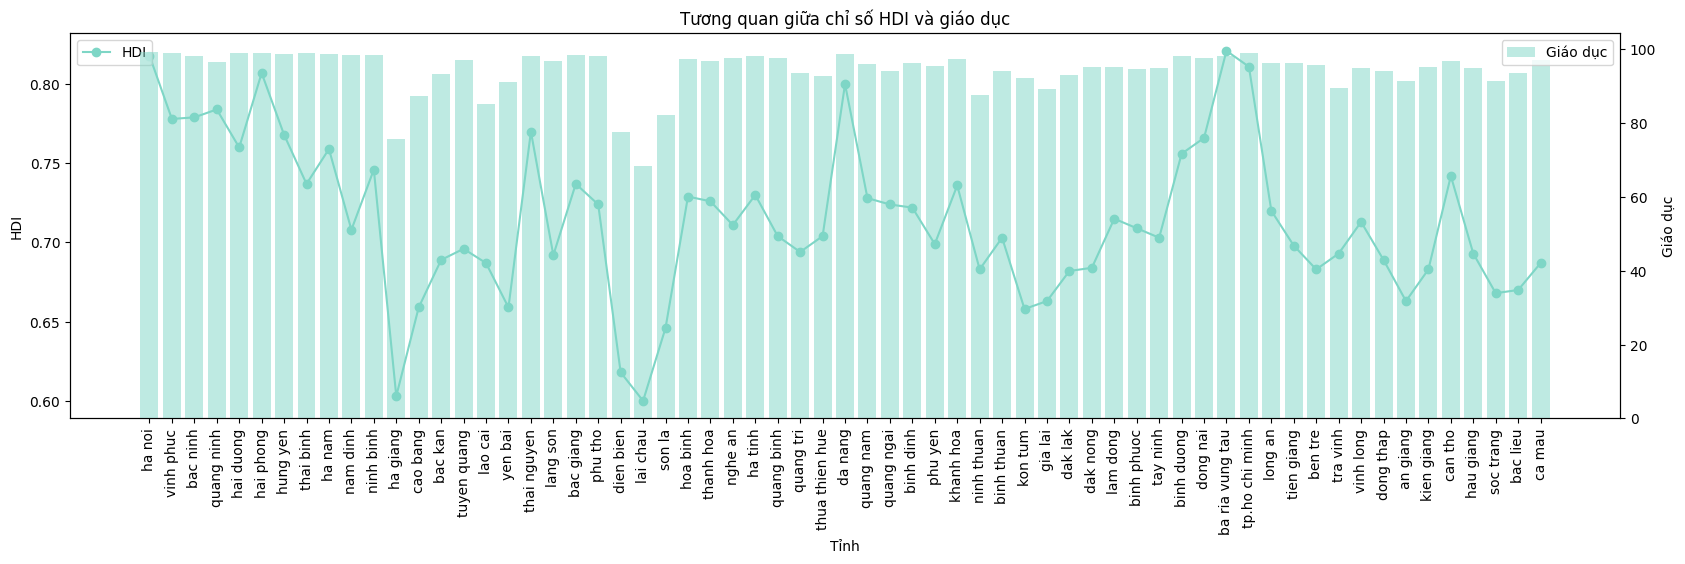

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure và axis
fig, ax = plt.subplots(figsize=(20, 5))

# Tạo palette tùy chỉnh
custom_palette = ["#7ed6c6", "#7ed6c6"]  # Màu sắc tùy chỉnh cho line plot và bar plot

# Sử dụng palette tùy chỉnh trong seaborn
sns.set_palette(custom_palette)

# Vẽ line plot
ax.plot(df['Province'], df['HDI'], label='HDI', marker='o')

# Tạo một axis thứ hai dùng chung trục x với axis thứ nhất
ax2 = ax.twinx()

# Vẽ bar plot
ax2.bar(df['Province'], df['Sơ bộ 2022'], label='Giáo dục', alpha=0.5)

# Đặt tên cho các trục và đồ thị
ax.set_xlabel('Tỉnh', fontname='tỉnh')
ax.set_ylabel('HDI')
ax2.set_ylabel('Giáo dục')
ax.set_xticklabels(df['Province'], rotation=90)
plt.title('Tương quan giữa chỉ số HDI và giáo dục', fontname='times')
plt.subplots_adjust(wspace=0.3)

# Hiển thị legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.subplots_adjust(wspace=0.9)

# Hiển thị biểu đồ
plt.show()


In [ ]:
years_model = ['2018', '2019', '2020', '2021']

def extract_feature(df, sub_feature, years):
  ls = np.empty((0, len(years)))
  for year in years:
    if sub_feature is not None:
        a = df[(df.Province.isin(province_name_preprocessed)) & (df.Sub_Feature == sub_feature)][year].values
        ls = np.vstack((ls, a))
        #return a
    else:
        #return df[df.Province.isin(province_name_preprocessed)][year].values
        a = df[df.Province.isin(province_name_preprocessed)][year].values
        ls = np.vstack((ls, a))
  return ls




In [ ]:
ls = np.empty((25, 4))  # Initialize as an empty 2D array
ls.shape

(0, 4)

<Axes: >

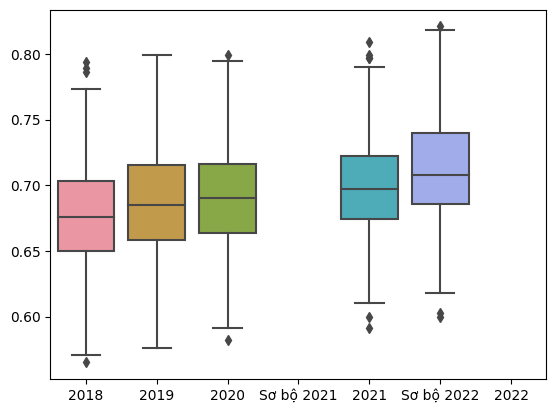

In [ ]:
sns.boxplot(hdi[['2018','2019','2020','Sơ bộ 2021','2021', 'Sơ bộ 2022','2022']])

In [ ]:
test = hdi.T

In [ ]:
custom_palette = sns.color_palette("husl")  # Using the 'husl' color space
sns.boxplot(palette=custom_palette)
ax.set_title(col.str(), fontsize=10)
ax.tick_params(axis='x', rotation=0)

Main_Feature    Province Sub_Feature  \
1   Chỉ số phát triển con người phân the...      ha noi         NaN   
2   Chỉ số phát triển con người phân the...   vinh phuc         NaN   
3   Chỉ số phát triển con người phân the...    bac ninh         NaN   
4   Chỉ số phát triển con người phân the...  quang ninh         NaN   
5   Chỉ số phát triển con người phân the...   hai duong         NaN   
..                                                ...         ...         ...   
59  Chỉ số phát triển con người phân the...     can tho         NaN   
60  Chỉ số phát triển con người phân the...   hau giang         NaN   
61  Chỉ số phát triển con người phân the...   soc trang         NaN   
62  Chỉ số phát triển con người phân the...    bac lieu         NaN   
63  Chỉ số phát triển con người phân the...      ca mau         NaN   

    2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  2017   2018  \
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.794   
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.736   
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.762   
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.757   
5    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.723   
..   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...    ...   
59   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.704   
60   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.654   
61   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.638   
62   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.642   
63   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.659   

     2019   2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  
1   0.799  0.799  0.809         NaN   NaN       0.818  
2   0.749  0.751  0.765         NaN   NaN       0.778  
3   0.764  0.768  0.771         NaN   NaN       0.779  
4   0.769  0.769  0.778         NaN   NaN       0.784  
5   0.728  0.735  0.747         NaN   NaN       0.760  
..    ...    ...    ...         ...   ...         ...  
59  0.724  0.719  0.723         NaN   NaN       0.742  
60  0.664  0.674  0.686         NaN   NaN       0.693  
61  0.640  0.647  0.655         NaN   NaN       0.668  
62  0.648  0.652  0.659         NaN   NaN       0.670  
63  0.661  0.668  0.672         NaN   NaN       0.687  

[63 rows x 26 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming t is your DataFrame and col is the list of column names
col = ['TNGT - Số người bị thương', 'TNGT - Số người chết', 'Số vụ TNGT',
       'Cháy nổ - Số người bị thương (Người)',
       'Cháy nổ - Số người chết (Người)', 'Số vụ cháy, nổ (Vụ)',
       'Thiệt hại do cháy nổ (Tỷ đồng)', 'Số bị can đã bị khởi tố',
       'Số vụ án đã bị khởi tố', 'Năm']

# Assuming t is your DataFrame
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(col) - 1)  # Using the 'husl' color space

for i, ax in enumerate(axes[:len(col) - 1]):  # Exclude 'Năm' column
    sns.boxplot(x='Năm', y=col[i], data=t, ax=ax, palette=custom_palette)
    ax.set_title(col[i], fontsize=10)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

#years_model = ['2018', '2019', '2020', '2021']
years_model = ['2018','2019','2020','Sơ bộ 2021','2021', 'Sơ bộ 2022','2022']

def extract_feature(df, sub_feature, years):
    ls = np.empty(0)  # Initialize as an empty 1D array
    for year in years:
        if sub_feature is not None:
            a = df[(df.Province.isin(province_name_preprocessed)) & (df.Sub_Feature == sub_feature)][year].values
        else:
            a = df[df.Province.isin(province_name_preprocessed)][year].values

        ls = np.concatenate((ls, a))

    return ls


In [ ]:
nuoc_vs_p = nuoc_vs[nuoc_vs.Province.isin(province_name_preprocessed)]
dien_p = dien[dien.Province.isin(province_name_preprocessed)]
dtns_p = do_thi_nuocsach[do_thi_nuocsach.Province.isin(province_name_preprocessed)]
hoxi_p = nhavs[nhavs.Province.isin(province_name_preprocessed)]
bietchu_p = tren15_gd[tren15_gd.Province.isin(province_name_preprocessed)]
nha_p = nha[nha.Province.isin(province_name_preprocessed)]

In [ ]:
f0 = extract_feature(hdi, None, years_model)
f1 = extract_feature(nuoc_vs_p, None, years_model)
f2 = extract_feature(dien, None, years_model)
f3 = extract_feature(dtns_p, None, years_model)
f4 = extract_feature(hoxi_p, None, years_model)
f5 = extract_feature(bietchu_p, None, years_model)
f6 = extract_feature(nha_p, 'Nhà kiên cố', years_model)
f7 = extract_feature(nha_p, 'Nhà bán kiên cố', years_model)
f8 = extract_feature(nha_p, 'Nhà thiếu kiên cố', years_model)
f9 = extract_feature(nha_p, 'Nhà đơn sơ', years_model)


In [ ]:
import pandas as pd

# Initialize an empty DataFrame before the loop
r = pd.DataFrame()
ls = [f0, f1, f2, f3, f4, f5, f6, f7, f8, f9]
column_names = ['hdi','nuoc_vs_p',
'dien_p',
'dtns_p',
'hoxi_p',
'bietchu_p',
'nha_kien_co',
'nha_ban_kien_co',
'nha_thieu_kien_co',
'nha_don_so', 'tinh', 'nam']

# Concatenate DataFrames in the loop
for i in ls:
  i2 = pd.DataFrame(i)
  r = pd.concat([r,i2], axis=1, ignore_index=True)
print(r)


         0      1      2      3      4     5     6     7    8    9
0    0.794  100.0   99.8  96.00  100.0  98.8  88.4  11.5  0.1  0.0
1    0.736  100.0   99.6  77.00   99.2  97.4  86.2  13.4  0.4  0.0
2    0.762  100.0  100.0  86.69  100.0  97.7  93.6   6.4  0.0  0.0
3    0.757  100.0  100.0  94.18   99.6  96.8  91.6   6.7  0.9  0.8
4    0.723  100.0   99.8  89.60   97.6  98.2  94.3   5.7  0.0  0.0
..     ...    ...    ...    ...    ...   ...   ...   ...  ...  ...
436    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN
437    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN
438    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN
439    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN
440    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN

[441 rows x 10 columns]


In [ ]:
tinh = pd.DataFrame(province_name_preprocessed*4)


In [ ]:
r = pd.concat([r,tinh], axis=1, ignore_index=True)
r

0      1      2      3      4     5     6     7    8    9           10
0    0.794  100.0   99.8  96.00  100.0  98.8  88.4  11.5  0.1  0.0      ha noi
1    0.736  100.0   99.6  77.00   99.2  97.4  86.2  13.4  0.4  0.0   vinh phuc
2    0.762  100.0  100.0  86.69  100.0  97.7  93.6   6.4  0.0  0.0    bac ninh
3    0.757  100.0  100.0  94.18   99.6  96.8  91.6   6.7  0.9  0.8  quang ninh
4    0.723  100.0   99.8  89.60   97.6  98.2  94.3   5.7  0.0  0.0   hai duong
..     ...    ...    ...    ...    ...   ...   ...   ...  ...  ...         ...
436    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN         NaN
437    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN         NaN
438    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN         NaN
439    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN         NaN
440    NaN    NaN  100.0    NaN    NaN   NaN   NaN   NaN  NaN  NaN         NaN

[441 rows x 11 columns]

In [ ]:
Nam = []
for i in years_model:
  for j in range(63):
    Nam.append(i)


In [ ]:
Nam = pd.DataFrame(Nam)

In [ ]:
r = pd.concat([r,Nam], axis=1, ignore_index=True)

In [ ]:
result = r.copy()
column_names = ['hdi','nuoc_vs_p',
'dien_p',
'dtns_p',
'hoxi_p',
'bietchu_p',
'nha_kien_co',
'nha_ban_kien_co',
'nha_thieu_kien_co',
'nha_don_so', 'tinh', 'nam']

In [ ]:
result.rename(columns=dict(zip(result.columns, column_names)), inplace=True)


In [ ]:
result

hdi  nuoc_vs_p  dien_p  dtns_p  hoxi_p  bietchu_p  nha_kien_co  \
0    0.794      100.0    99.8   96.00   100.0       98.8         88.4   
1    0.736      100.0    99.6   77.00    99.2       97.4         86.2   
2    0.762      100.0   100.0   86.69   100.0       97.7         93.6   
3    0.757      100.0   100.0   94.18    99.6       96.8         91.6   
4    0.723      100.0    99.8   89.60    97.6       98.2         94.3   
..     ...        ...     ...     ...     ...        ...          ...   
436    NaN        NaN   100.0     NaN     NaN        NaN          NaN   
437    NaN        NaN   100.0     NaN     NaN        NaN          NaN   
438    NaN        NaN   100.0     NaN     NaN        NaN          NaN   
439    NaN        NaN   100.0     NaN     NaN        NaN          NaN   
440    NaN        NaN   100.0     NaN     NaN        NaN          NaN   

     nha_ban_kien_co  nha_thieu_kien_co  nha_don_so        tinh   nam  
0               11.5                0.1         0.0      ha noi  2018  
1               13.4                0.4         0.0   vinh phuc  2018  
2                6.4                0.0         0.0    bac ninh  2018  
3                6.7                0.9         0.8  quang ninh  2018  
4                5.7                0.0         0.0   hai duong  2018  
..               ...                ...         ...         ...   ...  
436              NaN                NaN         NaN         NaN  2022  
437              NaN                NaN         NaN         NaN  2022  
438              NaN                NaN         NaN         NaN  2022  
439              NaN                NaN         NaN         NaN  2022  
440              NaN                NaN         NaN         NaN  2022  

[441 rows x 12 columns]

In [ ]:
t = result.copy()
t.columns

Index(['hdi', 'nuoc_vs_p', 'dien_p', 'dtns_p', 'hoxi_p', 'bietchu_p',
       'nha_kien_co', 'nha_ban_kien_co', 'nha_thieu_kien_co', 'nha_don_so',
       'tinh', 'nam'],
      dtype='object')

TypeError: ignored

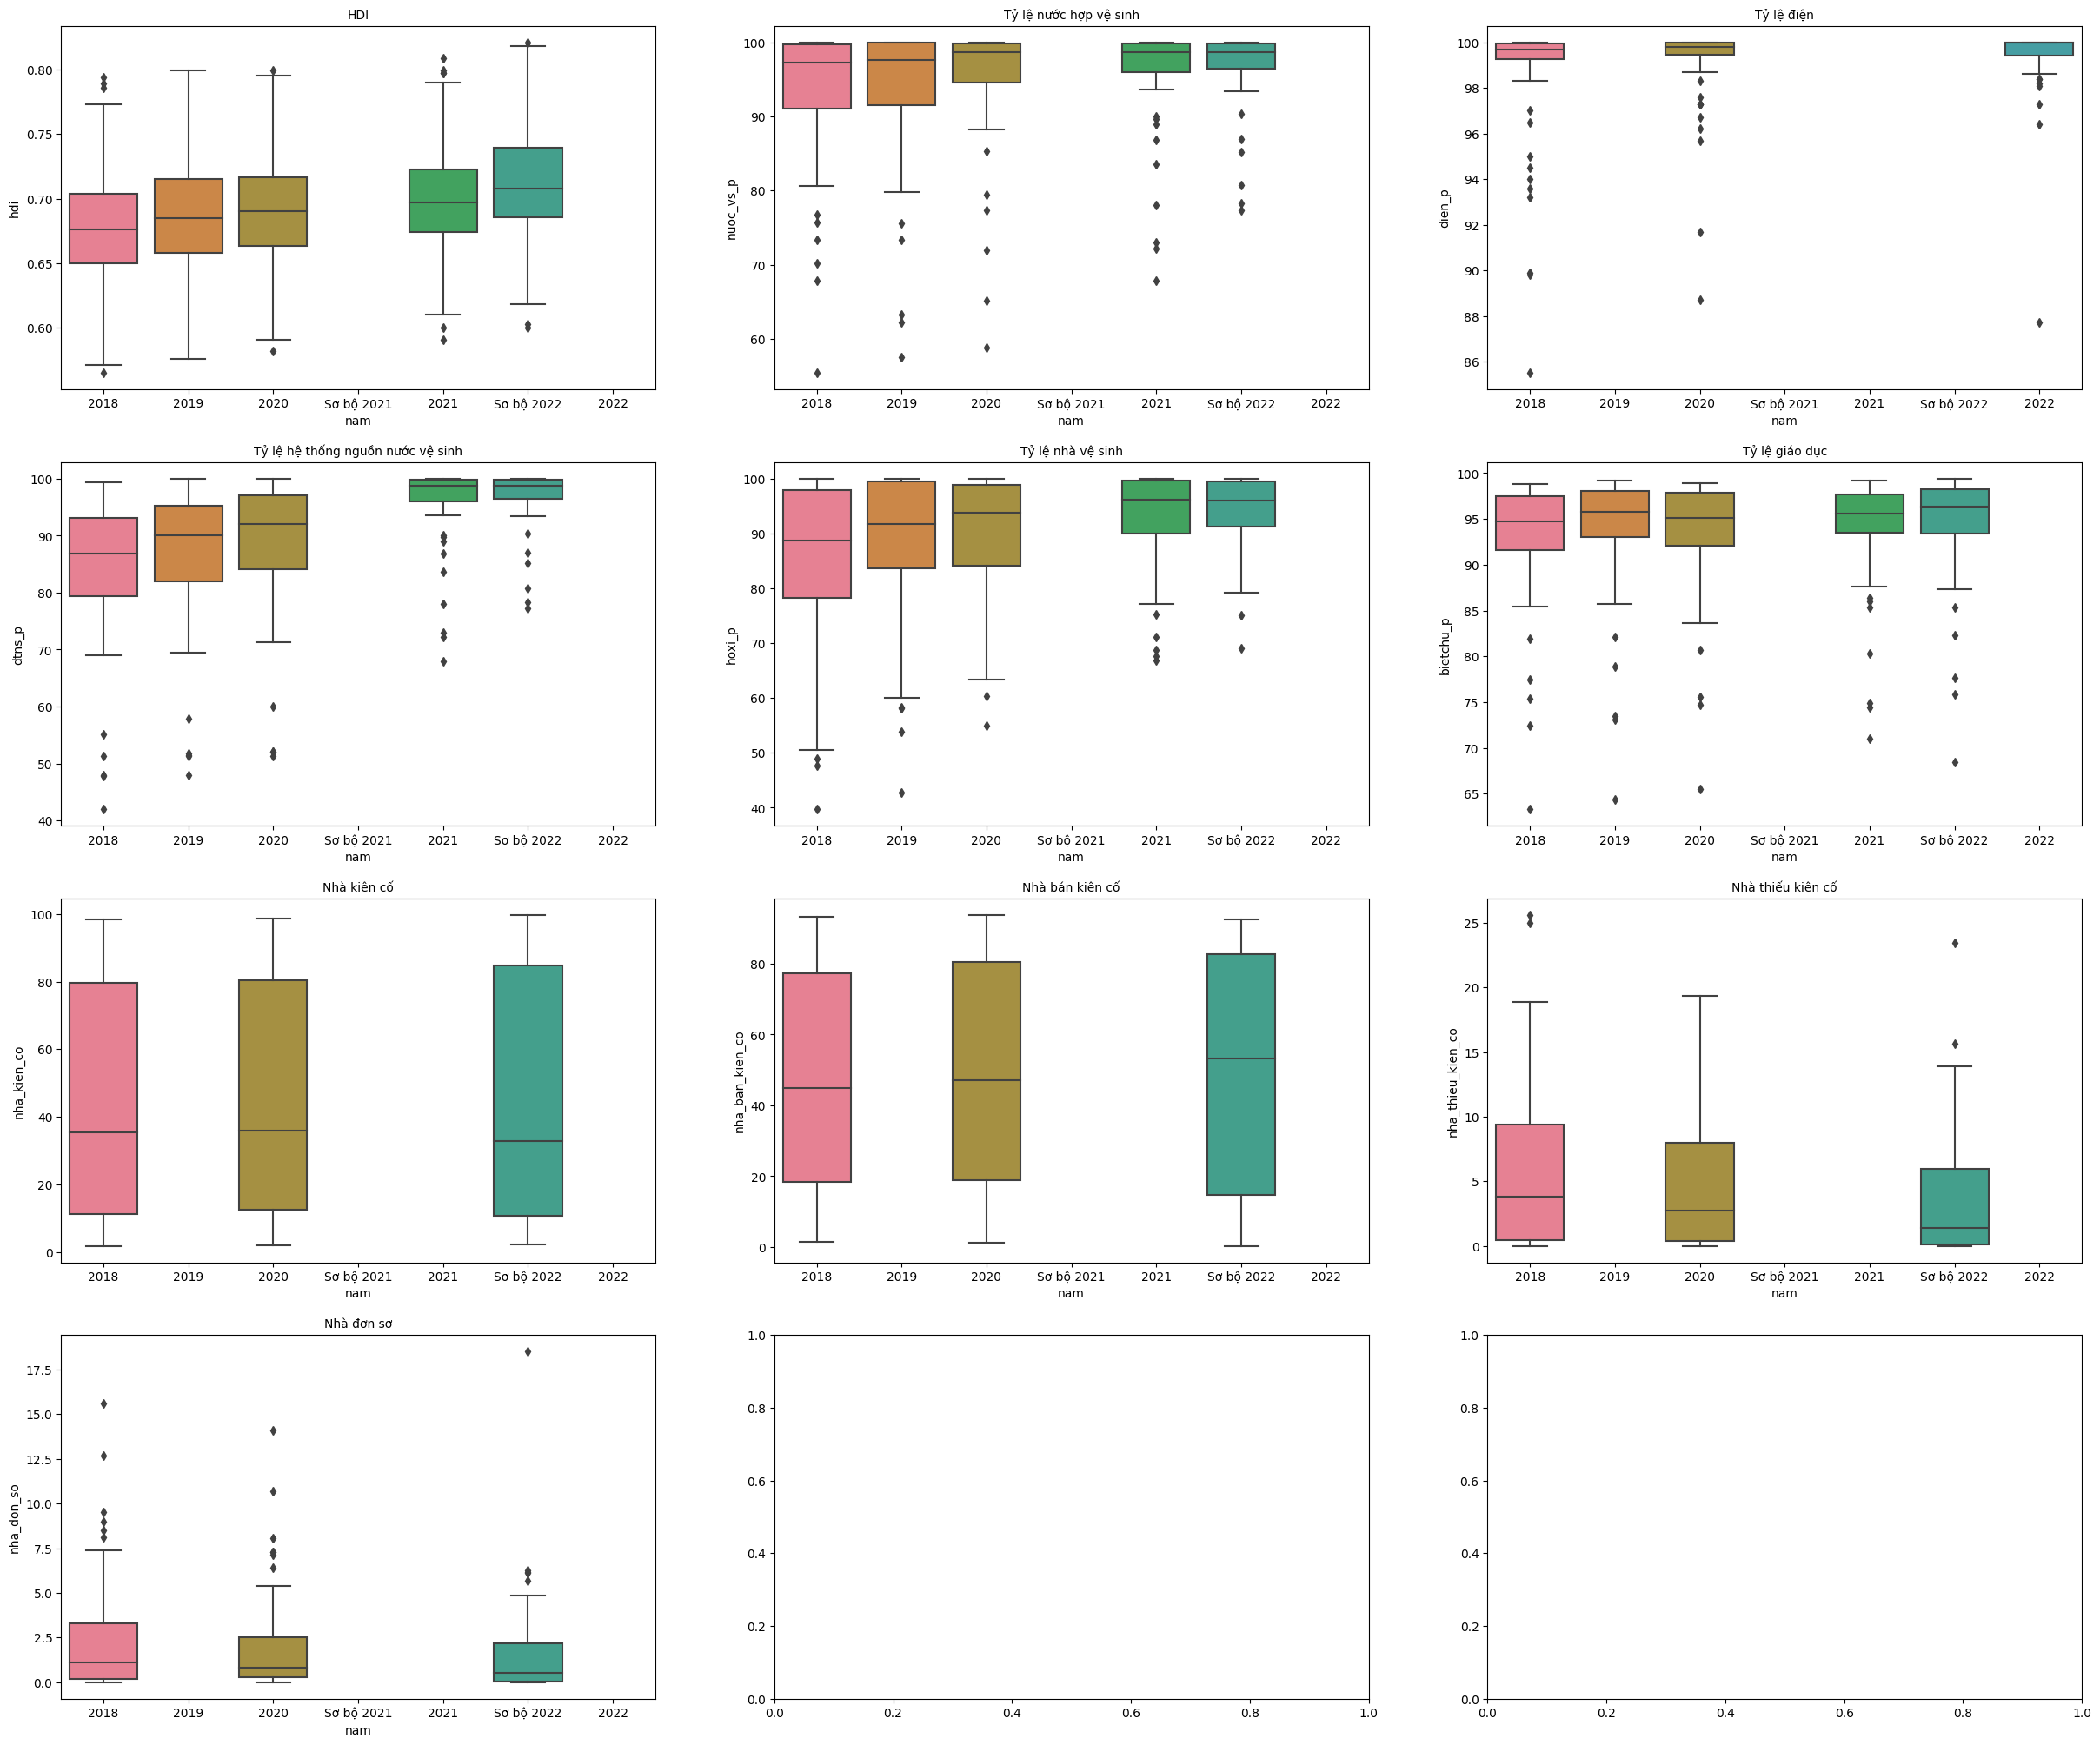

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming t is your DataFrame and col is the list of column names
col =['hdi', 'nuoc_vs_p', 'dien_p', 'dtns_p', 'hoxi_p', 'bietchu_p',
       'nha_kien_co', 'nha_ban_kien_co', 'nha_thieu_kien_co', 'nha_don_so',
       'tinh', 'nam']
col2 =['HDI', 'Tỷ lệ nước hợp vệ sinh', 'Tỷ lệ điện', 'Tỷ lệ hệ thống nguồn nước vệ sinh', 'Tỷ lệ nhà vệ sinh', 'Tỷ lệ giáo dục',
       'Nhà kiên cố', 'Nhà bán kiên cố', 'Nhà thiếu kiên cố', 'Nhà đơn sơ',
       'tinh', 'nam']

# Assuming t is your DataFrame
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 25))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(col) - 1)  # Using the 'husl' color space

for i, ax in enumerate(axes[:len(col) - 1]):  # Exclude 'Năm' column
    sns.boxplot(x='nam', y=col[i], data=t, ax=ax, palette=custom_palette)
    ax.set_title(col2[i], fontsize=10)
    ax.tick_params(axis='x', rotation=0)

# Tự động điều chỉnh layout của các subplot
plt.tight_layout()

plt.show()


In [ ]:
result.to_csv('clsc_train_data.csv', encoding='utf-8', index=False)

In [ ]:
r.rename(column_names)

TypeError: ignored

#### dataframe tổng

In [ ]:
r = pd.DataFrame()
for i in range(1,10):
  a = pd.DataFrame(f'f{i}')
  r = pd.concat([r,a], axis=0, ignore_index=True)

ValueError: ignored

#### Trung bình và hệ số tương quan

In [ ]:
clcc1 = nuoc_vs_p[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
clcc2 = dien_p[['2016', '2018', '2020','2022']].mean(axis=1).tolist()
clcc4 = dtns_p[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
clcc5 = hoxi_p[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
clcc3 = bietchu_p[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()
clcc6_1 = nha_p[nha_p.Sub_Feature == 'Nhà kiên cố'][['2018', '2020','Sơ bộ 2022']].mean(axis=1).tolist()
clcc6_2 = nha_p[nha_p.Sub_Feature == 'Nhà bán kiên cố'][['2018', '2020','Sơ bộ 2022']].mean(axis=1).tolist()
clcc6_3 = nha_p[nha_p.Sub_Feature == 'Nhà thiếu kiên cố'][['2018', '2020','Sơ bộ 2022']].mean(axis=1).tolist()
clcc6_4 = nha_p[nha_p.Sub_Feature == 'Nhà đơn sơ'][['2018', '2020','Sơ bộ 2022']].mean(axis=1).tolist()

In [ ]:
clcc0 = hdi[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()

In [ ]:
data = {
    'tinh': province_name_preprocessed,
    'hdi': clcc0,
    'nuoc_sach': clcc1,
    'dien': clcc2,
    'nsach_hethong': clcc3,
    'nha_vs_dat_chuan': clcc4,
    'biet_chu': clcc5,
    'nha_kien_co': clcc6_1,
    'nha_ban_kien_co': clcc6_2,
    'nha_thieu_kien_co': clcc6_3,
    'nha_don_so': clcc6_4,
}

df = pd.DataFrame(data)
df.to_csv('yes_hdi_clcs.csv', encoding='utf-8', index=False )

In [ ]:
clcc0 = hdi[['2018', '2019', '2020', '2021','Sơ bộ 2022']].mean(axis=1).tolist()

In [ ]:
df.corr()

nuoc_sach      dien  nsach_hethong  nha_vs_dat_chuan  \
nuoc_sach           1.000000  0.891460       0.752497          0.481208   
dien                0.891460  1.000000       0.756733          0.469441   
nsach_hethong       0.752497  0.756733       1.000000          0.382590   
nha_vs_dat_chuan    0.481208  0.469441       0.382590          1.000000   
biet_chu            0.747916  0.709037       0.839691          0.430761   
nha_kien_co         0.170386  0.188801       0.425387          0.133001   
nha_ban_kien_co    -0.027942 -0.068891      -0.308339         -0.082531   
nha_thieu_kien_co  -0.590883 -0.518562      -0.608428         -0.216558   
nha_don_so         -0.582837 -0.500929      -0.563912         -0.276235   

                   biet_chu  nha_kien_co  nha_ban_kien_co  nha_thieu_kien_co  \
nuoc_sach          0.747916     0.170386        -0.027942          -0.590883   
dien               0.709037     0.188801        -0.068891          -0.518562   
nsach_hethong      0.839691     0.425387        -0.308339          -0.608428   
nha_vs_dat_chuan   0.430761     0.133001        -0.082531          -0.216558   
biet_chu           1.000000     0.478765        -0.355631          -0.626355   
nha_kien_co        0.478765     1.000000        -0.974312          -0.516149   
nha_ban_kien_co   -0.355631    -0.974312         1.000000           0.315690   
nha_thieu_kien_co -0.626355    -0.516149         0.315690           1.000000   
nha_don_so        -0.656668    -0.410773         0.216812           0.804381   

                   nha_don_so  
nuoc_sach           -0.582837  
dien                -0.500929  
nsach_hethong       -0.563912  
nha_vs_dat_chuan    -0.276235  
biet_chu            -0.656668  
nha_kien_co         -0.410773  
nha_ban_kien_co      0.216812  
nha_thieu_kien_co    0.804381  
nha_don_so           1.000000

In [ ]:
df.drop('hdi',axis=1, inplace=True)

In [ ]:
df.to_csv('clcs_corr.csv', encoding='utf-8', index=False)

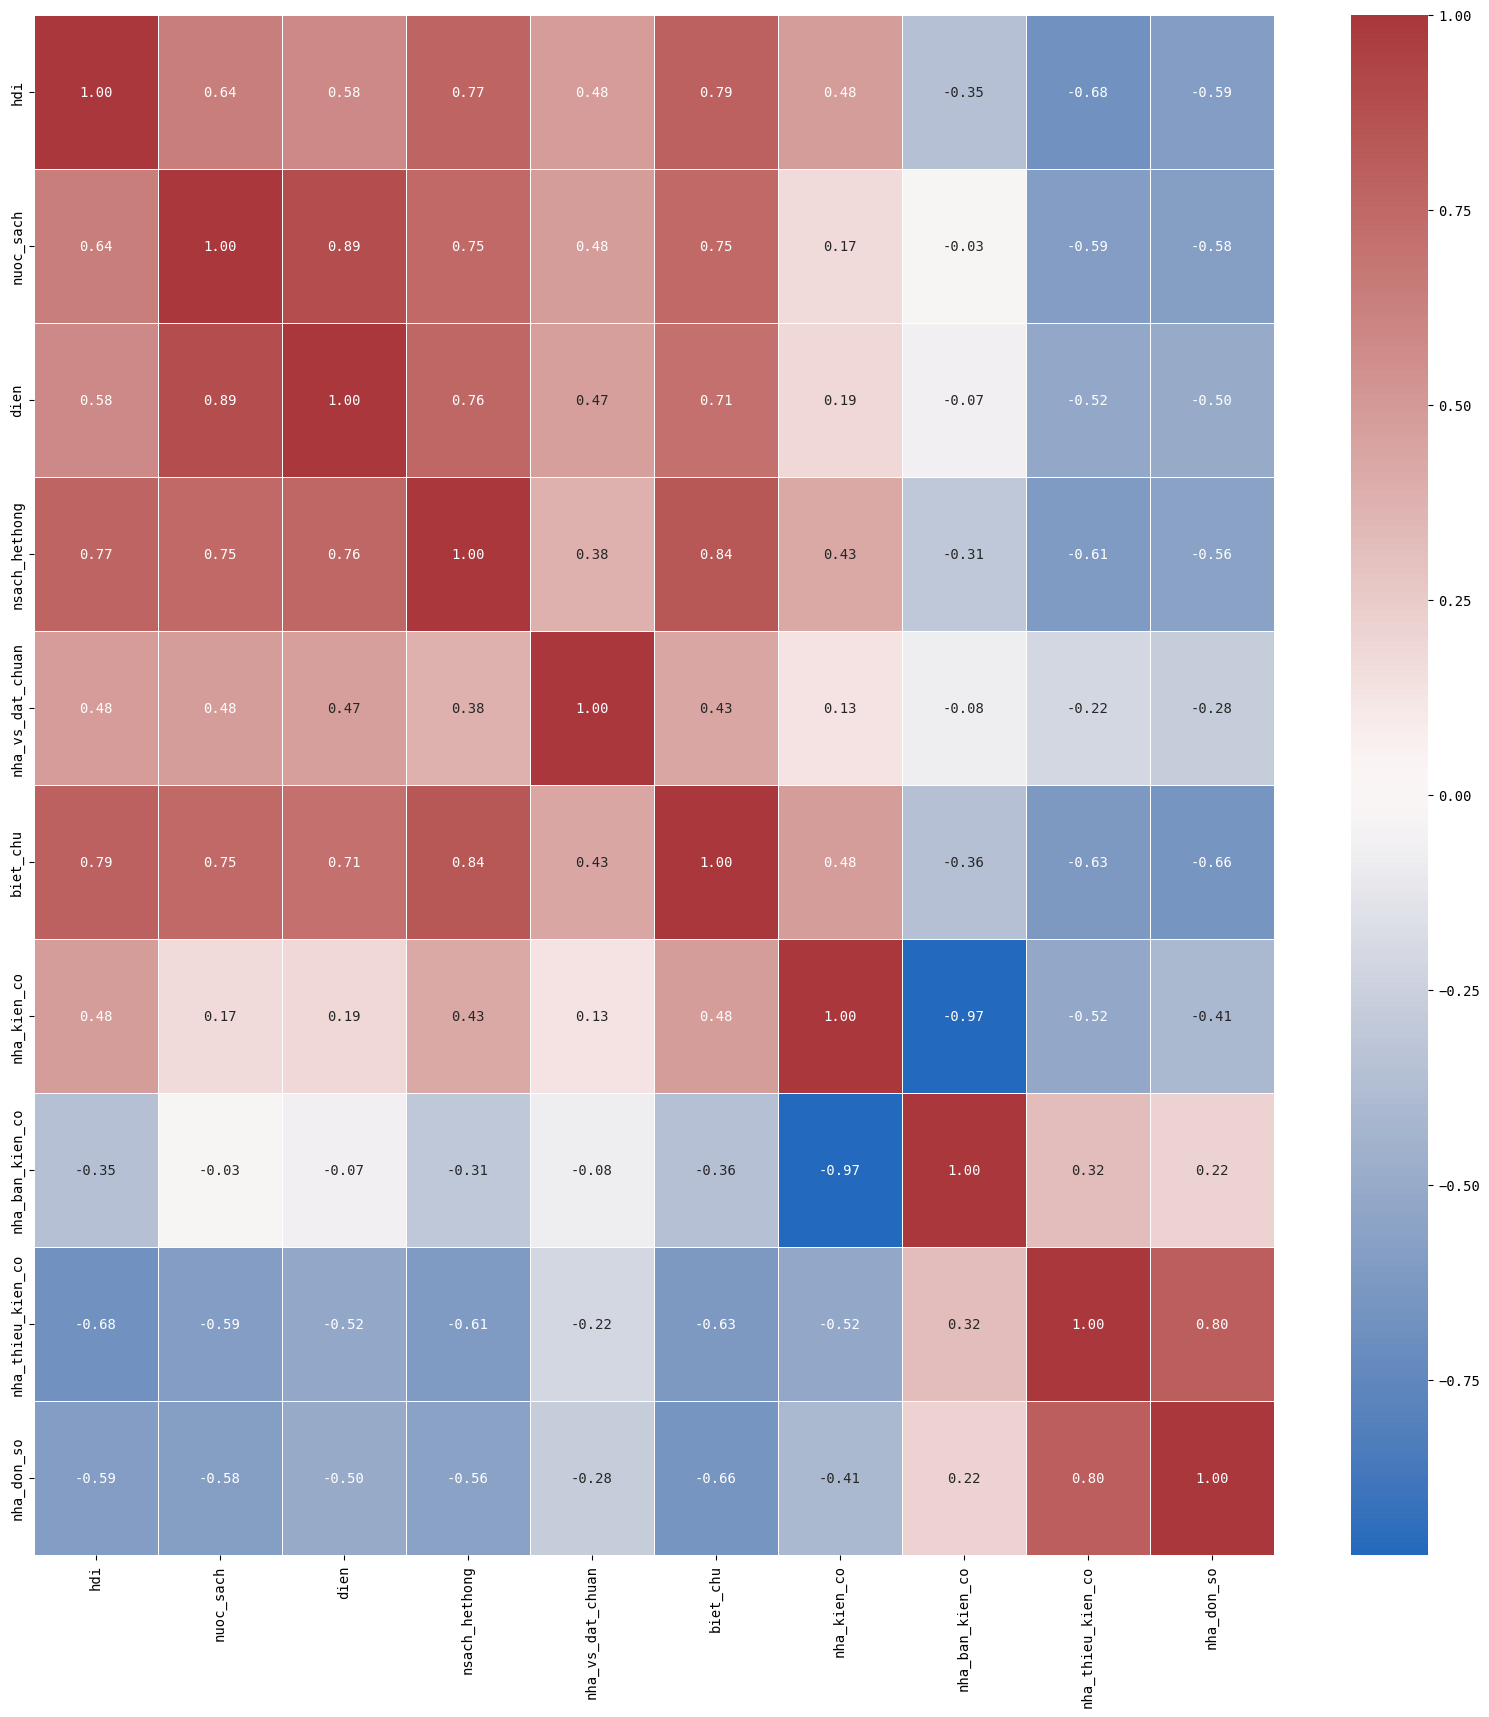

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap=sns.color_palette("vlag", as_cmap=True), annot=True, fmt='.2f', linewidths=.5)
plt.show()

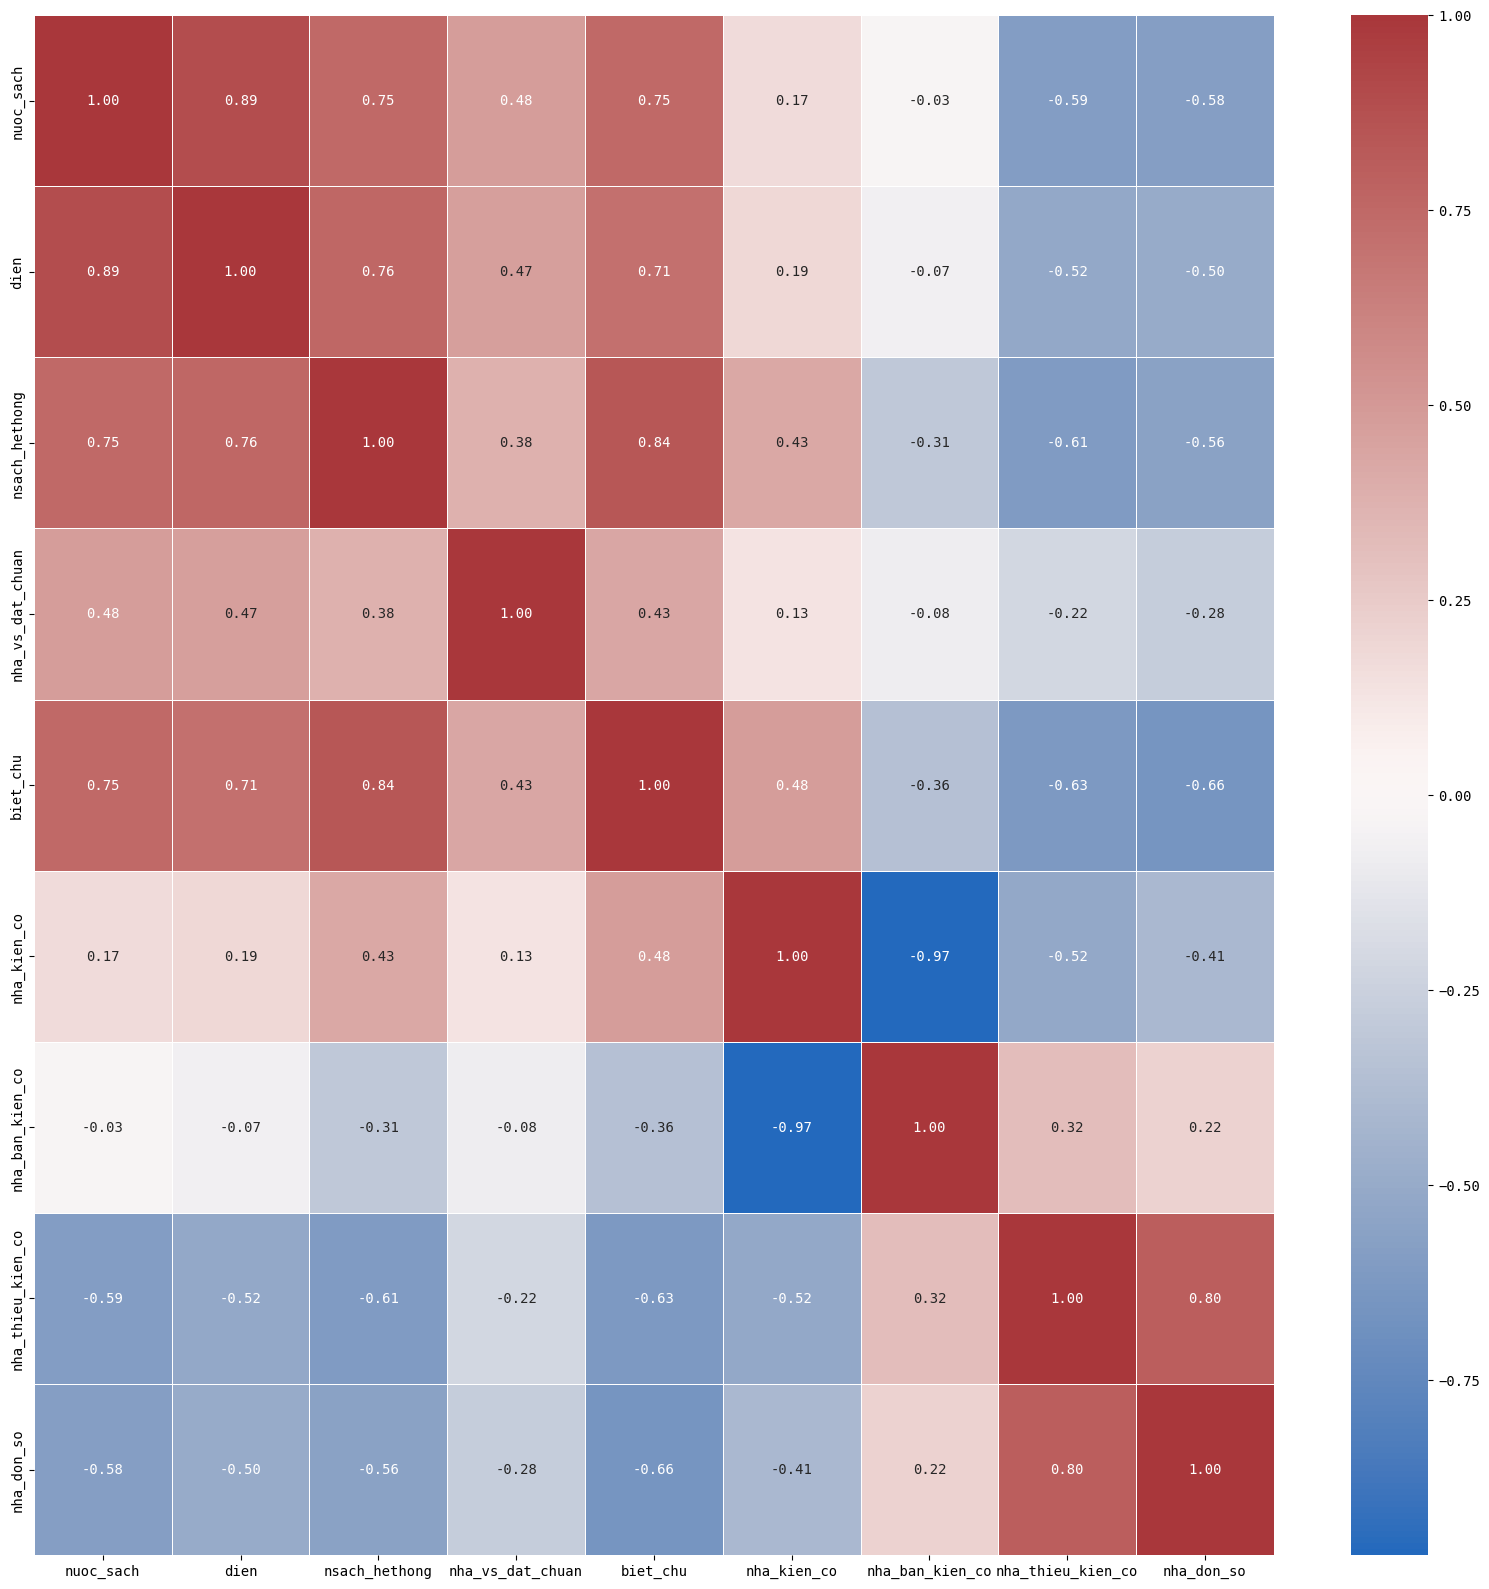

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), cmap=sns.color_palette("vlag", as_cmap=True), annot=True, fmt='.2f', linewidths=.5)
plt.show()

In [ ]:
data2 = {
    'tinh': province_name_preprocessed,
    'hdi': clcc0,
    'nuoc_sach': clcc1,
    'dien': clcc2,
    'nsach_hethong': clcc3,
    'nha_vs_dat_chuan': clcc4,
    'biet_chu': clcc5,
    'nha_kien_co': clcc6_1,
    'nha_ban_kien_co': clcc6_2,
    'nha_thieu_kien_co': clcc6_3,
    'nha_don_so': clcc6_4,
}

df2 = pd.DataFrame(data2)


In [ ]:
score = []
for i in range(1,6):
    var = 'clcc' + str(i)
    score.append(locals()[var])

In [ ]:
clcc_nha = np.column_stack((clcc6_1, clcc6_2, clcc6_3, clcc6_4))
clcc_nha = pd.DataFrame(clcc_nha, header)

NameError: ignored

#### pickle

In [ ]:
years = ['2018','2019','2020','Sơ bộ 2021','2021', 'Sơ bộ 2022','2022']
def init_df(df, feature, vung_mien_name,province_name):
    new_df = preprocess_df(df, feature, vung_mien_name, province_name)
    print(new_df.Province.nunique())
    print(new_df.Sub_Feature.unique())
    print(new_df[years].isnull().sum())
    return new_df

sc0 = init_df(clcc.copy(), features[0], vung_mien_name, province_name)
sc0

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']
63
[nan]
2018           0
2019           0


<ipython-input-312-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-312-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-312-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Main_Feature    Province Sub_Feature  \
1   Chỉ số phát triển con người phân the...      ha noi         NaN   
2   Chỉ số phát triển con người phân the...   vinh phuc         NaN   
3   Chỉ số phát triển con người phân the...    bac ninh         NaN   
4   Chỉ số phát triển con người phân the...  quang ninh         NaN   
5   Chỉ số phát triển con người phân the...   hai duong         NaN   
..                                                ...         ...         ...   
59  Chỉ số phát triển con người phân the...     can tho         NaN   
60  Chỉ số phát triển con người phân the...   hau giang         NaN   
61  Chỉ số phát triển con người phân the...   soc trang         NaN   
62  Chỉ số phát triển con người phân the...    bac lieu         NaN   
63  Chỉ số phát triển con người phân the...      ca mau         NaN   

    2002  2003  2004  2005  2006  2007  2008  ...  2015  2016  2017   2018  \
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.794   
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.736   
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.762   
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.757   
5    NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.723   
..   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...    ...   
59   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.704   
60   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.654   
61   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.638   
62   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.642   
63   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  0.659   

     2019   2020   2021  Sơ bộ 2021  2022  Sơ bộ 2022  
1   0.799  0.799  0.809         NaN   NaN       0.818  
2   0.749  0.751  0.765         NaN   NaN       0.778  
3   0.764  0.768  0.771         NaN   NaN       0.779  
4   0.769  0.769  0.778         NaN   NaN       0.784  
5   0.728  0.735  0.747         NaN   NaN       0.760  
..    ...    ...    ...         ...   ...         ...  
59  0.724  0.719  0.723         NaN   NaN       0.742  
60  0.664  0.674  0.686         NaN   NaN       0.693  
61  0.640  0.647  0.655         NaN   NaN       0.668  
62  0.648  0.652  0.659         NaN   NaN       0.670  
63  0.661  0.668  0.672         NaN   NaN       0.687  

[63 rows x 26 columns]

In [ ]:
features_model = []
for i in range(len(features)):
  feature_model = init_df(clcc.copy(), features[i], vung_mien_name, province_name)
  globals()[f"clcc_{i}_model"] = feature_model
  features_model.append(feature_model)

features_model

lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 'dong thap', 'an giang', 'kien giang', 'can tho', 'hau giang', 'soc trang', 'bac lieu', 'ca mau']


<ipython-input-312-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-312-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-312-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

63
[nan]
2018           0
2019           0
2020           0
Sơ bộ 2021    63
2021           0
Sơ bộ 2022     0
2022          63
dtype: int64
lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 

<ipython-input-312-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-312-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-312-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

69
[nan]
2018           0
2019           0
2020           0
Sơ bộ 2021    69
2021           0
Sơ bộ 2022     0
2022          69
dtype: int64
lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 

<ipython-input-312-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-312-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-312-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

69
['Chung' 'Nhà kiên cố' 'Nhà bán kiên cố' 'Nhà thiếu kiên cố' 'Nhà đơn sơ']
2018            0
2019          345
2020            0
Sơ bộ 2021    345
2021          345
Sơ bộ 2022      0
2022          345
dtype: int64
lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp

<ipython-input-312-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-312-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-312-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

69
[nan]
2018           0
2019           0
2020           0
Sơ bộ 2021    69
2021           0
Sơ bộ 2022     0
2022          69
dtype: int64
lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 

<ipython-input-312-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-312-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-312-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

69
[nan]
2018           0
2019           0
2020           0
Sơ bộ 2021    69
2021           0
Sơ bộ 2022     0
2022          69
dtype: int64
lst_vm_p = ['dong bang song hong', 'trung du va mien nui phia bac', 'bac trung bo va duyen hai mien trung', 'tay nguyen', 'dong nam bo', 'dong bang song cuu long', 'ha noi', 'vinh phuc', 'bac ninh', 'quang ninh', 'hai duong', 'hai phong', 'hung yen', 'thai binh', 'ha nam', 'nam dinh', 'ninh binh', 'ha giang', 'cao bang', 'bac kan', 'tuyen quang', 'lao cai', 'yen bai', 'thai nguyen', 'lang son', 'bac giang', 'phu tho', 'dien bien', 'lai chau', 'son la', 'hoa binh', 'thanh hoa', 'nghe an', 'ha tinh', 'quang binh', 'quang tri', 'thua thien hue', 'da nang', 'quang nam', 'quang ngai', 'binh dinh', 'phu yen', 'khanh hoa', 'ninh thuan', 'binh thuan', 'kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong', 'binh phuoc', 'tay ninh', 'binh duong', 'dong nai', 'ba ria vung tau', 'tp.ho chi minh', 'long an', 'tien giang', 'ben tre', 'tra vinh', 'vinh long', 

<ipython-input-312-88490f5199bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
<ipython-input-312-88490f5199bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
<ipython-input-312-88490f5199bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

69
[nan]
2018           0
2019           0
2020           0
Sơ bộ 2021    69
2021           0
Sơ bộ 2022     0
2022          69
dtype: int64


[                                         Main_Feature    Province Sub_Feature  \
 1   Chỉ số phát triển con người phân the...      ha noi         NaN   
 2   Chỉ số phát triển con người phân the...   vinh phuc         NaN   
 3   Chỉ số phát triển con người phân the...    bac ninh         NaN   
 4   Chỉ số phát triển con người phân the...  quang ninh         NaN   
 5   Chỉ số phát triển con người phân the...   hai duong         NaN   
 ..                                                ...         ...         ...   
 59  Chỉ số phát triển con người phân the...     can tho         NaN   
 60  Chỉ số phát triển con người phân the...   hau giang         NaN   
 61  Chỉ số phát triển con người phân the...   soc trang         NaN   
 62  Chỉ số phát triển con người phân the...    bac lieu         NaN   
 63  Chỉ số phát triển con người phân the...      ca mau         NaN   
 
     2002  200

In [ ]:
len(features_model)

7

In [ ]:
for i in range(7):
  sc = init_df(clcc.copy(), features[0], vung_mien_name, province_name)


In [ ]:
import pickle
with open('clcc_features.pkl', 'wb') as f:
    pickle.dump(features_model, f)

In [ ]:
years_model = ['2018', '2019', '2020', '2021']
def extract_feature(df, sub_feature, years):
    if sub_feature is not None:
        return df[(df.Province.isin(province_name_preprocessed)) & (df.Sub_Feature == sub_feature)][years].values
    else:
        return df[df.Province.isin(province_name_preprocessed)][years].values

In [ ]:
nuoc_vs_p = nuoc_vs[nuoc_vs.Province.isin(province_name_preprocessed)]
dien_p = dien[dien.Province.isin(province_name_preprocessed)]
dtns_p = do_thi_nuocsach[do_thi_nuocsach.Province.isin(province_name_preprocessed)]
hoxi_p = nhavs[nhavs.Province.isin(province_name_preprocessed)]
bietchu_p = tren15_gd[tren15_gd.Province.isin(province_name_preprocessed)]
nha_p = nha_province.copy()

In [ ]:


f = [nuoc_vs_p, dien_p, dtns_p, hoxi_p, bietchu_p]
features_model = []
for i, value in enumerate(f):
    # Tạo biến và thêm vào danh sách
    feature_model = extract_feature(value, None, years_model)
    globals()[f"clcc_{i}_model"] = feature_model
    features_model.append(feature_model)


In [ ]:
len(features_model)

In [ ]:
clcc_0_model

In [ ]:
sub = ['Nhà kiên cố', 'Nhà bán kiên cố', 'Nhà thiếu kiên cố', 'Nhà đơn sơ']
for i, value in enumerate(sub):
    # Tạo biến và thêm vào danh sách
    feature_model = extract_feature(nha_p, value, years_model)
    globals()[f"clcc_6_{i}_model"] = feature_model
    features_model.append(feature_model)

In [ ]:
len(features_model)

In [ ]:
import pickle
with open('clcs_features_dùng_init_model.pkl', 'wb') as f:
    pickle.dump(features_model, f)

In [ ]:
for i in range()